In [21]:
suppressPackageStartupMessages(library(EBSeq))
suppressPackageStartupMessages(library(EBSeqHMM))
library(Trendy)
suppressPackageStartupMessages(library(SummarizedExperiment))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(DESeq2))
library(RColorBrewer)
require(plyr)
source('../prj_helpers.R')
temp<-read.csv(file = "../05-sample_overview/full_tissue_color.csv",header = F)
color_ft<-temp$V2
names(color_ft)<-temp$V1
color_ft
library(Seurat)

Spleen              Kidney       Adrenal Gland      Brain:Brain-Gr 
          "#BC80BD"           "#BEBADA"           "#8DD3C7"           "#FB8072" 
     Brain:Brain-Wh               Liver                Lung  Lymph node:LN-AX-R 
          "#a34136"           "#fff265"           "#80B1D3"           "#FDB462" 
Lymph node:LN-ING-L   Lymph node:LN-MES       Lymph node:NA                PBMC 
          "#ed830c"           "#f5b771"           "#ff8700"           "#B3DE69" 
    Sex Organ:Ovary Sex Organ:Sex-Organ    Sex Organ:Testis       Skin:Non-Rash 
          "#e64e9b"           "#FCCDE5"           "#a82d6c"           "#6e6969" 
          Skin:Rash          SpinalCord         Whole blood 
          "#D9D9D9"           "#f93d28"           "#CCEBC5"

In [4]:
dds.qc.experimental.alltp<-readRDS(file="dds.qc.experimental.alltp")


In [5]:
dds.qc.experimental.alltp

class: DESeqDataSet 
dim: 35405 284 
metadata(1): version
assays(6): counts mu ... replaceCounts replaceCooks
rownames(35405): ENSMMUG00000023296.4 ENSMMUG00000036181.3 ... EBOV-L
  EBOV-3pTrailer
rowData names(39): Geneid Chr ... deviance.1 maxCooks.1
colnames(284): A0001_S121_L002 A0002_S124_L002 ... RA1779.Liver_S7
  RA1803_PBMC_D006_S13
colData names(70): file_identifiers A.identifier ... sizeFactor
  replaceable

In [6]:
table(dds.qc.experimental.alltp$full.tissue,dds.qc.experimental.alltp$dpi_time_factor)

                     
                      <0  0  3  4  5  6  7  8
  Adrenal Gland        0  3  1  2  0  1  2  1
  Brain:Brain-Gr       0  3  3  3  3  5  2  2
  Brain:Brain-Wh       0  1  1  1  3  1  1  1
  Kidney               0  3  3  2  3  5  2  2
  Liver                0  0  1  3  3  5  0  2
  Lung                 0  0  1  2  3  1  0  0
  Lymph node:LN-AX-R   0  3  3  3  3  5  2  2
  Lymph node:LN-ING-L  0  3  3  3  3  5  2  2
  Lymph node:LN-MES    0  3  2  2  3  5  2  2
  Lymph node:NA        0  0  0  0  0  0  0  0
  PBMC                 0  0  1  1  1  3  0  0
  Sex Organ:Ovary      0  1  2  0  2  3  2  0
  Sex Organ:Sex-Organ  0  2  1  3  0  3  0  0
  Sex Organ:Testis     0  0  1  2  0  1  0  1
  Skin:Non-Rash        0  3  3  0  3  3  2  1
  Skin:Rash            0  2  3  0  2  1  2  1
  SpinalCord           0  0  0  0  0  0  0  0
  Spleen               0  3  3  3  3  4  2  2
  Whole blood         34  9  6  6  2  5  2  2

In [7]:
dd<-dds.qc.experimental.alltp[,dds.qc.experimental.alltp$dpi_time_factor != '<0' & dds.qc.experimental.alltp$tissue %in% c('Adrenal Gland')]
dd$tissue
Data<- log10(counts(dd, normalized=TRUE)+1)
rownames(Data) <- rowData(dd)[rownames(Data),]$external_gene_name
Sizes <- sizeFactors(dd)
#Sizes <- MedianNorm(Data)
Conditions<-factor(x = dd$dpi_time_factor,levels=c(0,3,4,5,6,7,8))
names(Conditions)<-colnames(dd)
Conditions<-sort(Conditions)
Data<- Data[,names(sort(Conditions))]
Data<-Data[rownames(Data)[!is.na(rownames(Data)) & rownames(Data) != "" ],]
head(Data)



[1] Adrenal Gland Adrenal Gland Adrenal Gland Adrenal Gland Adrenal Gland
 [6] Adrenal Gland Adrenal Gland Adrenal Gland Adrenal Gland Adrenal Gland
14 Levels: Adrenal Gland Brain Kidney Liver Lung Lymph node Ovary ... Whole blood

A0242    A0256    A0270    A0088    A0018    A0172    A0284    A0046   
U6      0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
ZNF692  2.004684 2.906482 2.152269 1.740982 1.249331 1.890943 1.885028 1.928257
ZNF672  2.674702 0.000000 1.545138 1.491972 1.417191 1.387614 1.521806 1.179850
SH3BP5L 0.000000 0.000000 2.268054 1.740982 1.928278 2.075546 2.045115 2.218845
OR2T27  0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
Y_RNA   0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
        A0144 A0074_S61_L001
U6      0     0.000000      
ZNF692  0     2.352610      
ZNF672  0     1.789288      
SH3BP5L 0     2.585989      
OR2T27  0     0.000000      
Y_RNA   0     0.000000

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'metadata': object 'res' not found


List of 3
 $ firstup      : Named num [1:335] 2.02 2.07 2.11 2.17 2.3 ...
  ..- attr(*, "names")= chr [1:335] "GIMAP2" "STAT1" "TRIM22" "XAF1" ...
 $ firstdown    : Named num [1:773] 2 2 2.02 2.02 2.02 ...
  ..- attr(*, "names")= chr [1:773] "PLXNB3" "PRKG1" "CHST1" "EML5" ...
 $ firstnochange: Named num [1:397] 2 2.02 2.08 2.09 2.1 ...
  ..- attr(*, "names")= chr [1:397] "ADCK1" "NUFIP1" "EML3" "BCAM" ...


In [8]:
library(ImpulseDE2)

[1] 0 0 0 3 3 3 4 4 4 5 5 5 6 6 6 6 7 7 8 8

In [9]:
dd<-dds.qc.experimental.alltp[,dds.qc.experimental.alltp$dpi_time_factor != '<0' & dds.qc.experimental.alltp$tissue %in% c('Adrenal Gland')]
Data<- counts(dd, normalized=FALSE)
rownames(Data) <- rowData(dd)[rownames(Data),]$external_gene_name
Conditions<-dd$dpi_time_factor
names(Conditions)<-colnames(dd)
Conditions<-sort(Conditions)
Data<- Data[,names(sort(Conditions))]
Data<-Data[rownames(Data)[!is.na(rownames(Data)) & rownames(Data) != "" ],]
rownames(Data) = make.names(rownames(Data), unique=TRUE)
head(Data)
Annotation=data.frame(Sample=names(Conditions),Time=(Conditions %>% factor %>% str_replace(',', '') %>% as.numeric),Condition="case")
Annotation

A0242 A0256 A0270 A0088 A0018 A0172 A0284 A0046 A0144 A0074_S61_L001
U6       0      0     0   0      0      0     0     0   0        0          
ZNF692  14    276   182   9      2     82   155    83   0      722          
ZNF672  66      0    44   5      3     25    66    14   0      195          
SH3BP5L  0      0   238   9     10    126   225   163   0     1238          
OR2T27   0      0     0   0      0      0     0     0   0        0          
Y_RNA    0      0     0   0      0      0     0     0   0        0

Sample         Time Condition
1  A0242          0    case     
2  A0256          0    case     
3  A0270          0    case     
4  A0088          3    case     
5  A0018          4    case     
6  A0172          4    case     
7  A0284          6    case     
8  A0046          7    case     
9  A0144          7    case     
10 A0074_S61_L001 8    case

In [10]:
objectImpulseDE2 <- runImpulseDE2(
  matCountData    = Data, 
  dfAnnotation    = Annotation,
  boolCaseCtrl    = FALSE,
  vecConfounders  = NULL,
  scaNProc        = 25,
    boolIdentifyTransients = TRUE )

ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,3,4,6,7,8
Case: Found the samples at time point 0: A0242,A0256,A0270
Case: Found the samples at time point 3: A0088
Case: Found the samples at time point 4: A0018,A0172
Case: Found the samples at time point 6: A0284
Case: Found the samples at time point 7: A0046,A0144
Case: Found the samples at time point 8: A0074_S61_L001
Input contained 23521 genes/regions.
Selected 15988 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Consumed time: 0.07 min.

# Compute size factors

# Fitting null and alternative model to the genes

Timing stopped at: 0.037 0.138 1.113

Timing stopped at: 5.716 0.216 6.93



In [149]:
objectImpulseDE2@dfImpulseDE2Results %>% filter(padj < 0.1)

Gene p padj loglik_full loglik_red df_full df_red mean converge_impulse
     converge_const converge_sigmoid impulseTOsigmoid_p impulseTOsigmoid_padj
     sigmoidTOconst_p sigmoidTOconst_padj isTransient isMonotonous allZero

In [7]:
library(ComplexHeatmap)
lsHeatmaps <- plotHeatmap(
  objectImpulseDE2       = objectImpulseDE2,
  strCondition           = "case",
  boolIdentifyTransients = FALSE,
  scaQThres              = 0.01)
draw(lsHeatmaps$complexHeatmapRaw)

Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




ERROR: Error in plotHeatmap(objectImpulseDE2 = objectImpulseDE2, strCondition = "case", : could not find function "plotHeatmap"


In [90]:
genes.ImpulseDE2.tissue <- lapply(unique(dds.qc.experimental.alltp$tissue), function(curr_tissue) {
    print(paste("This is the current tissue:",curr_tissue))
    dd<-dds.qc.experimental.alltp[,dds.qc.experimental.alltp$dpi_time_factor != '<0' &
                      dds.qc.experimental.alltp$tissue %in% c(curr_tissue)]

    Data<- counts(dd, normalized=FALSE)
    #rownames(Data) <- rowData(dd)[rownames(Data),]$external_gene_name
    Conditions<-dd$dpi_time_factor
    names(Conditions)<-colnames(dd)
    Conditions<-sort(Conditions)
    Data<- Data[,names(sort(Conditions))]
    Data<-Data[rownames(Data)[!is.na(rownames(Data)) & rownames(Data) != "" ],]
    rownames(Data) = make.names(rownames(Data), unique=TRUE)
    Annotation=data.frame(Sample=names(Conditions),
              Time=(Conditions %>% factor %>% str_replace(',', '') %>%
                    as.numeric),Condition="case")
    objectImpulseDE2 <- runImpulseDE2(
    matCountData    = Data, 
    dfAnnotation    = Annotation,
    boolCaseCtrl    = FALSE,
    vecConfounders  = NULL,
    scaNProc        = 30,
    boolIdentifyTransients = TRUE )
    objectImpulseDE2$dfImpulseDE2Results
})
saveRDS(genes.ImpulseDE2.tissue,file="genes.ImpulseDE2.tissue.rds")

[1] "This is the current tissue: Spleen"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,3,4,5,6,7,8
Case: Found the samples at time point 0: A0239_S23_L001,A0253_S22_L001,A0267_S11_L001
Case: Found the samples at time point 3: A0057_S117_L002,A0085_S115_L002,A0099_S114_L002
Case: Found the samples at time point 4: A0015_S120_L002,A0029_S119_L002,A0169_S109_L002
Case: Found the samples at time point 5: A0113_S113_L002,A0127_S112_L002,A0211_S106_L002
Case: Found the samples at time point 6: A0001_S121_L002,A0183_S108_L002,A0225_S24_L001,A0281_S10_L001
Case: Found the samples at time point 7: A0043_S118_L002,A0141_S111_L002
Case: Found the samples at time point 8: A0071_S116_L002,A0197_S107_L002
Input contained 35405 genes/regions.
Selected 29290 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



[1] "Corrected 43 DESEq2 dispersion estimates which to avoid variance overestimation and loss of discriminatory power for model selection."


Consumed time: 0.16 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 9.21 min.

# Fitting sigmoid model to case condition

Consumed time: 3.93 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 13.38 min.



[1] "This is the current tissue: Kidney"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,3,4,5,6,7,8
Case: Found the samples at time point 0: A0240_S95_L002,A0254_S93_L002,A0268_S92_L002
Case: Found the samples at time point 3: A0058_S120_L002,A0086_S60_L001,A0100_S114_L002
Case: Found the samples at time point 4: A0016_S123_L002,A0030_S122_L002
Case: Found the samples at time point 5: A0114_S112_L002,A0128_S55_L001,A0212_S97_L002
Case: Found the samples at time point 6: A0002_S124_L002,A0156_S101_L002,A0184_S99_L002,A0226_S96_L002,A0282_S91_L002
Case: Found the samples at time point 7: A0044_S121_L002,A0142_S105_L002
Case: Found the samples at time point 8: A0072_S119_L002,A0198_S98_L002
Input contained 35405 genes/regions.
Selected 28380 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



[1] "Corrected 21 DESEq2 dispersion estimates which to avoid variance overestimation and loss of discriminatory power for model selection."


Consumed time: 0.16 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 10.62 min.

# Fitting sigmoid model to case condition

Consumed time: 4.25 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 15.1 min.



[1] "This is the current tissue: Liver"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 3,4,5,6,8
Case: Found the samples at time point 3: A0101
Case: Found the samples at time point 4: A0171,RA0717.Liver_S10,RA0850.Liver_S11
Case: Found the samples at time point 5: A0115,A0129,A0213_S52_L001
Case: Found the samples at time point 6: A0003,A0157_S56_L001,A0185_S54_L001,A0227_S51_L001,A0283
Case: Found the samples at time point 8: A0199_S53_L001,RA1779.Liver_S7
Input contained 35405 genes/regions.
Selected 24200 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Consumed time: 0.09 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 7.89 min.

# Fitting sigmoid model to case condition

Consumed time: 3.53 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 11.57 min.



[1] "This is the current tissue: Brain"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,3,4,5,6,7,8
Case: Found the samples at time point 0: A0243_S106_L002,A0244_S73_L002,A0258_S72_L002,A0272_S71_L002
Case: Found the samples at time point 3: A0062_S84_L002,A0090_S82_L002,A0103,A0104_S29_L001
Case: Found the samples at time point 4: A0020_S88_L002,A0034_S87_L002,A0173_S111_L002,A0174_S78_L002
Case: Found the samples at time point 5: A0117_S115_L002,A0118_S28_L001,A0131_S58_L001,A0132_S81_L002,A0215_S108_L002,A0216_S75_L002
Case: Found the samples at time point 6: A0006_S89_L002,A0160_S79_L002,A0188_S77_L002,A0229_S107_L002,A0230_S74_L002,A0286_S70_L002
Case: Found the samples at time point 7: A0048_S86_L002,A0145,A0146_S80_L002
Case: Found the samples at time point 8: A0076_S83_L002,A0201_S109_L002,A0202_S76_L002
Input contained 35405 genes/regions.
Selected 32025 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



[1] "Corrected 52 DESEq2 dispersion estimates which to avoid variance overestimation and loss of discriminatory power for model selection."


Consumed time: 0.22 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 11.68 min.

# Fitting sigmoid model to case condition

Consumed time: 4.69 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 16.67 min.



[1] "This is the current tissue: Sex Organ"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,3,4,5,6,7,8
Case: Found the samples at time point 0: A0259_S50_L001,A0264_S49_L001,A0278_S104_L002
Case: Found the samples at time point 3: A0063_S9_L001,A0091_S7_L001,A0096_S62_L001,A0105_S6_L001
Case: Found the samples at time point 4: A0021_S15_L001,A0026_S14_L001,A0040_S13_L001,A0175_S1_L001,A0180_S116_L002
Case: Found the samples at time point 5: A0119_S5_L001,A0133_S4_L001
Case: Found the samples at time point 6: A0007_S17_L001,A0012_S16_L001,A0161_S2_L001,A0166_S117_L002,A0189_S59_L001,A0287_S103_L002,A0292_S102_L002
Case: Found the samples at time point 7: A0049_S12_L001,A0147_S3_L001
Case: Found the samples at time point 8: A0077_S8_L001
Input contained 35405 genes/regions.
Selected 33749 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



[1] "Corrected 214 DESEq2 dispersion estimates which to avoid variance overestimation and loss of discriminatory power for model selection."


Consumed time: 0.19 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 14.75 min.

# Fitting sigmoid model to case condition

Consumed time: 4.99 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 20 min.



[1] "This is the current tissue: Lymph node"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,3,4,5,6,7,8
Case: Found the samples at time point 0: A0246_S135_L002,A0247_S134_L002,A0248_S133_L002,A0260_S132_L002,A0261_S131_L002,A0262_S130_L002,A0274_S129_L002,A0275_S128_L002,A0276_S127_L002
Case: Found the samples at time point 3: A0064_S176_L002,A0065_S175_L002,A0092_S170_L002,A0093_S169_L002,A0094_S168_L002,A0106_S167_L002,A0107_S166_L002,A0108_S165_L002
Case: Found the samples at time point 4: A0022_S185_L002,A0023_S184_L002,A0024_S183_L002,A0036_S182_L002,A0037_S181_L002,A0176_S152_L002,A0177_S151_L002,A0178_S150_L002
Case: Found the samples at time point 5: A0120_S164_L002,A0121_S163_L002,A0122_S162_L002,A0134_S161_L002,A0135_S160_L002,A0136_S159_L002,A0218_S143_L002,A0219_S142_L002,A0220_S141_L002
Case: Found the samples at time point 6: A0008_S140_L002,A0009_S139_L002,A0010_S19_L001,A0162_S155_L002,A0163_S154_L002,A0164_S153_L002,A0190_S149_L002,A0191_S148_L002,A0192_S147_L002,A0232_S138_L002,A023

# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



[1] "Corrected 109 DESEq2 dispersion estimates which to avoid variance overestimation and loss of discriminatory power for model selection."


Consumed time: 0.38 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 10.45 min.

# Fitting sigmoid model to case condition

Consumed time: 4.45 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 15.36 min.



[1] "This is the current tissue: Skin"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,3,5,6,7,8
Case: Found the samples at time point 0: A0252_S24_L001,A0265_S23_L001,A0266_S22_L001,A0279_S21_L001,A0280_S20_L001
Case: Found the samples at time point 3: A0069_S44_L001,A0070_S43_L001,A0097_S40_L001,A0098_S39_L001,A0111_S38_L001,A0112_S37_L001
Case: Found the samples at time point 5: A0125_S36_L001,A0126_S35_L001,A0139_S34_L001,A0140_S33_L001,A0224_S27_L001
Case: Found the samples at time point 6: A0013_S47_L001,A0014,A0238_S25_L001,A0294_S18_L001
Case: Found the samples at time point 7: A0055_S46_L001,A0056_S45_L001,A0153_S32_L001,A0154_S31_L001
Case: Found the samples at time point 8: A0083_S42_L001,A0084_S41_L001
Input contained 35405 genes/regions.
Selected 27317 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



[1] "Corrected 51 DESEq2 dispersion estimates which to avoid variance overestimation and loss of discriminatory power for model selection."


Consumed time: 0.17 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 7.23 min.

# Fitting sigmoid model to case condition

Consumed time: 3.64 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 11.12 min.



[1] "This is the current tissue: Adrenal Gland"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,3,4,6,7,8
Case: Found the samples at time point 0: A0242,A0256,A0270
Case: Found the samples at time point 3: A0088
Case: Found the samples at time point 4: A0018,A0172
Case: Found the samples at time point 6: A0284
Case: Found the samples at time point 7: A0046,A0144
Case: Found the samples at time point 8: A0074_S61_L001
Input contained 35405 genes/regions.
Selected 25991 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Consumed time: 0.09 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 7.5 min.

# Fitting sigmoid model to case condition

Consumed time: 3.36 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 11.01 min.



[1] "This is the current tissue: Lung"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 3,4,5,6
Case: Found the samples at time point 3: A0095
Case: Found the samples at time point 4: A0025,A0179
Case: Found the samples at time point 5: A0123_L2,A0137,A0221_A
Case: Found the samples at time point 6: A0235
Input contained 35405 genes/regions.
Selected 20182 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Consumed time: 0.06 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 9.16 min.

# Fitting sigmoid model to case condition

Consumed time: 3.12 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 12.39 min.



[1] "This is the current tissue: Whole blood"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,3,4,5,6,7,8
Case: Found the samples at time point 0: A0297_S14_L001,A0300_S190_L002,A0303_S187_L002,A0323_S33_L001,A0327_S29_L001,A0331_S96_L001,A0335_S92_L001,A0340_S87_L001,A0345_S82_L001
Case: Found the samples at time point 3: A0325_S31_L001,A0329_S27_L001,A0333_S94_L001,A0337_S90_L001,A0342_S85_L001,A0347_S80_L001
Case: Found the samples at time point 4: A0352_S75_L001,A0356_S69_L001,A0360_S65_L001,A0364_S61_L001,A0369_S56_L001,A0374_S51_L001
Case: Found the samples at time point 5: A0338_S89_L001,A0348_S79_L001
Case: Found the samples at time point 6: A0309_S10_L001,A0318_S38_L001,A0365_S60_L001,A0370_S55_L001,A0375_S50_L001
Case: Found the samples at time point 7: A0306_S11_L001,A0315_S41_L001
Case: Found the samples at time point 8: A0312_S44_L001,A0321_S35_L001
Input contained 35405 genes/regions.
Selected 27415 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



[1] "Corrected 37 DESEq2 dispersion estimates which to avoid variance overestimation and loss of discriminatory power for model selection."


Consumed time: 0.2 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 9.11 min.

# Fitting sigmoid model to case condition

Consumed time: 4.28 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 13.67 min.



[1] "This is the current tissue: PBMC"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 3,4,5,6
Case: Found the samples at time point 3: RA0449.D003_S105_L002
Case: Found the samples at time point 4: RA0717_PBMC_D004_S9
Case: Found the samples at time point 5: RA0452_PBMC_D005_S10
Case: Found the samples at time point 6: RA1074_PBMC_D006_S11,RA1325_PBMC_D006_S12,RA1803_PBMC_D006_S13
Input contained 35405 genes/regions.
Selected 22205 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Consumed time: 0.06 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 5.21 min.

# Fitting sigmoid model to case condition

Consumed time: 3.07 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 8.39 min.



In [92]:
genes.ImpulseDE2.fulltissue <- lapply(unique(dds.qc.experimental.alltp$full.tissue), function(curr_tissue) {
    print(paste("This is the current tissue:",curr_tissue))
    dd<-dds.qc.experimental.alltp[,dds.qc.experimental.alltp$dpi_time_factor != '<0' &
                      dds.qc.experimental.alltp$full.tissue %in% c(curr_tissue)]

    Data<- counts(dd, normalized=FALSE)
    #rownames(Data) <- rowData(dd)[rownames(Data),]$external_gene_name
    Conditions<-dd$dpi_time_factor
    names(Conditions)<-colnames(dd)
    Conditions<-sort(Conditions)
    Data<- Data[,names(sort(Conditions))]
    Data<-Data[rownames(Data)[!is.na(rownames(Data)) & rownames(Data) != "" ],]
    rownames(Data) = make.names(rownames(Data), unique=TRUE)
    Annotation=data.frame(Sample=names(Conditions),
              Time=(Conditions %>% factor %>% str_replace(',', '') %>%
                    as.numeric),Condition="case")
    objectImpulseDE2 <- runImpulseDE2(
    matCountData    = Data, 
    dfAnnotation    = Annotation,
    boolCaseCtrl    = FALSE,
    vecConfounders  = NULL,
    scaNProc        = 30,
    boolIdentifyTransients = TRUE )
    objectImpulseDE2$dfImpulseDE2Results
})
saveRDS(genes.ImpulseDE2.fulltissue,file="genes.ImpulseDE2.fulltissue.rds")

[1] "This is the current tissue: Spleen"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,3,4,5,6,7,8
Case: Found the samples at time point 0: A0239_S23_L001,A0253_S22_L001,A0267_S11_L001
Case: Found the samples at time point 3: A0057_S117_L002,A0085_S115_L002,A0099_S114_L002
Case: Found the samples at time point 4: A0015_S120_L002,A0029_S119_L002,A0169_S109_L002
Case: Found the samples at time point 5: A0113_S113_L002,A0127_S112_L002,A0211_S106_L002
Case: Found the samples at time point 6: A0001_S121_L002,A0183_S108_L002,A0225_S24_L001,A0281_S10_L001
Case: Found the samples at time point 7: A0043_S118_L002,A0141_S111_L002
Case: Found the samples at time point 8: A0071_S116_L002,A0197_S107_L002
Input contained 35405 genes/regions.
Selected 29290 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



[1] "Corrected 43 DESEq2 dispersion estimates which to avoid variance overestimation and loss of discriminatory power for model selection."


Consumed time: 0.16 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 10.99 min.

# Fitting sigmoid model to case condition

Consumed time: 4.51 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 15.74 min.



[1] "This is the current tissue: Kidney"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,3,4,5,6,7,8
Case: Found the samples at time point 0: A0240_S95_L002,A0254_S93_L002,A0268_S92_L002
Case: Found the samples at time point 3: A0058_S120_L002,A0086_S60_L001,A0100_S114_L002
Case: Found the samples at time point 4: A0016_S123_L002,A0030_S122_L002
Case: Found the samples at time point 5: A0114_S112_L002,A0128_S55_L001,A0212_S97_L002
Case: Found the samples at time point 6: A0002_S124_L002,A0156_S101_L002,A0184_S99_L002,A0226_S96_L002,A0282_S91_L002
Case: Found the samples at time point 7: A0044_S121_L002,A0142_S105_L002
Case: Found the samples at time point 8: A0072_S119_L002,A0198_S98_L002
Input contained 35405 genes/regions.
Selected 28380 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



[1] "Corrected 21 DESEq2 dispersion estimates which to avoid variance overestimation and loss of discriminatory power for model selection."


Consumed time: 0.15 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 9.98 min.

# Fitting sigmoid model to case condition

Consumed time: 4.57 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 14.78 min.



[1] "This is the current tissue: Liver"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 3,4,5,6,8
Case: Found the samples at time point 3: A0101
Case: Found the samples at time point 4: A0171,RA0717.Liver_S10,RA0850.Liver_S11
Case: Found the samples at time point 5: A0115,A0129,A0213_S52_L001
Case: Found the samples at time point 6: A0003,A0157_S56_L001,A0185_S54_L001,A0227_S51_L001,A0283
Case: Found the samples at time point 8: A0199_S53_L001,RA1779.Liver_S7
Input contained 35405 genes/regions.
Selected 24200 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Consumed time: 0.09 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 8.68 min.

# Fitting sigmoid model to case condition

Consumed time: 4.15 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 12.98 min.



[1] "This is the current tissue: Brain:Brain-Gr"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,3,4,5,6,7,8
Case: Found the samples at time point 0: A0244_S73_L002,A0258_S72_L002,A0272_S71_L002
Case: Found the samples at time point 3: A0062_S84_L002,A0090_S82_L002,A0104_S29_L001
Case: Found the samples at time point 4: A0020_S88_L002,A0034_S87_L002,A0174_S78_L002
Case: Found the samples at time point 5: A0118_S28_L001,A0132_S81_L002,A0216_S75_L002
Case: Found the samples at time point 6: A0006_S89_L002,A0160_S79_L002,A0188_S77_L002,A0230_S74_L002,A0286_S70_L002
Case: Found the samples at time point 7: A0048_S86_L002,A0146_S80_L002
Case: Found the samples at time point 8: A0076_S83_L002,A0202_S76_L002
Input contained 35405 genes/regions.
Selected 31623 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



[1] "Corrected 45 DESEq2 dispersion estimates which to avoid variance overestimation and loss of discriminatory power for model selection."


Consumed time: 0.17 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 11.08 min.

# Fitting sigmoid model to case condition

Consumed time: 4.57 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 15.89 min.



[1] "This is the current tissue: Sex Organ:Ovary"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,3,5,6,7
Case: Found the samples at time point 0: A0259_S50_L001
Case: Found the samples at time point 3: A0091_S7_L001,A0105_S6_L001
Case: Found the samples at time point 5: A0119_S5_L001,A0133_S4_L001
Case: Found the samples at time point 6: A0007_S17_L001,A0161_S2_L001,A0287_S103_L002
Case: Found the samples at time point 7: A0049_S12_L001,A0147_S3_L001
Input contained 35405 genes/regions.
Selected 30278 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Consumed time: 0.1 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 8.24 min.

# Fitting sigmoid model to case condition

Consumed time: 3.68 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 12.08 min.



[1] "This is the current tissue: Lymph node:LN-AX-R"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,3,4,5,6,7,8
Case: Found the samples at time point 0: A0246_S135_L002,A0260_S132_L002,A0274_S129_L002
Case: Found the samples at time point 3: A0064_S176_L002,A0092_S170_L002,A0106_S167_L002
Case: Found the samples at time point 4: A0022_S185_L002,A0036_S182_L002,A0176_S152_L002
Case: Found the samples at time point 5: A0120_S164_L002,A0134_S161_L002,A0218_S143_L002
Case: Found the samples at time point 6: A0008_S140_L002,A0162_S155_L002,A0190_S149_L002,A0232_S138_L002,A0288_S126_L002
Case: Found the samples at time point 7: A0050_S179_L002,A0148_S158_L002
Case: Found the samples at time point 8: A0078_S173_L002,A0204_S146_L002
Input contained 35405 genes/regions.
Selected 29576 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



[1] "Corrected 21 DESEq2 dispersion estimates which to avoid variance overestimation and loss of discriminatory power for model selection."


Consumed time: 0.16 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 10.56 min.

# Fitting sigmoid model to case condition

Consumed time: 4.07 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 14.86 min.



[1] "This is the current tissue: Lymph node:LN-ING-L"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,3,4,5,6,7,8
Case: Found the samples at time point 0: A0247_S134_L002,A0261_S131_L002,A0275_S128_L002
Case: Found the samples at time point 3: A0065_S175_L002,A0093_S169_L002,A0107_S166_L002
Case: Found the samples at time point 4: A0023_S184_L002,A0037_S181_L002,A0177_S151_L002
Case: Found the samples at time point 5: A0121_S163_L002,A0135_S160_L002,A0219_S142_L002
Case: Found the samples at time point 6: A0009_S139_L002,A0163_S154_L002,A0191_S148_L002,A0233_S137_L002,A0289_S125_L002
Case: Found the samples at time point 7: A0051_S178_L002,A0149_S157_L002
Case: Found the samples at time point 8: A0079_S172_L002,A0205_S145_L002
Input contained 35405 genes/regions.
Selected 29608 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



[1] "Corrected 25 DESEq2 dispersion estimates which to avoid variance overestimation and loss of discriminatory power for model selection."


Consumed time: 0.16 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 11.96 min.

# Fitting sigmoid model to case condition

Consumed time: 4.02 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 16.22 min.



[1] "This is the current tissue: Lymph node:LN-MES"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,3,4,5,6,7,8
Case: Found the samples at time point 0: A0248_S133_L002,A0262_S130_L002,A0276_S127_L002
Case: Found the samples at time point 3: A0094_S168_L002,A0108_S165_L002
Case: Found the samples at time point 4: A0024_S183_L002,A0178_S150_L002
Case: Found the samples at time point 5: A0122_S162_L002,A0136_S159_L002,A0220_S141_L002
Case: Found the samples at time point 6: A0010_S19_L001,A0164_S153_L002,A0192_S147_L002,A0234_S136_L002,A0290_S124_L002
Case: Found the samples at time point 7: A0052_S177_L002,A0150_S156_L002
Case: Found the samples at time point 8: A0080_S171_L002,A0206_S144_L002
Input contained 35405 genes/regions.
Selected 28707 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Consumed time: 0.15 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 10.64 min.

# Fitting sigmoid model to case condition

Consumed time: 4.29 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 15.14 min.



[1] "This is the current tissue: Sex Organ:Sex-Organ"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,3,4,6
Case: Found the samples at time point 0: A0264_S49_L001,A0278_S104_L002
Case: Found the samples at time point 3: A0096_S62_L001
Case: Found the samples at time point 4: A0026_S14_L001,A0040_S13_L001,A0180_S116_L002
Case: Found the samples at time point 6: A0012_S16_L001,A0166_S117_L002,A0292_S102_L002
Input contained 35405 genes/regions.
Selected 25632 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Consumed time: 0.07 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 5.47 min.

# Fitting sigmoid model to case condition

Consumed time: 3.78 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 9.37 min.



[1] "This is the current tissue: Skin:Rash"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,3,5,6,7,8
Case: Found the samples at time point 0: A0265_S23_L001,A0279_S21_L001
Case: Found the samples at time point 3: A0069_S44_L001,A0097_S40_L001,A0111_S38_L001
Case: Found the samples at time point 5: A0125_S36_L001,A0139_S34_L001
Case: Found the samples at time point 6: A0013_S47_L001
Case: Found the samples at time point 7: A0055_S46_L001,A0153_S32_L001
Case: Found the samples at time point 8: A0083_S42_L001
Input contained 35405 genes/regions.
Selected 25031 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Consumed time: 0.09 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 7.22 min.

# Fitting sigmoid model to case condition

Consumed time: 3.55 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 10.92 min.



[1] "This is the current tissue: Skin:Non-Rash"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,3,5,6,7,8
Case: Found the samples at time point 0: A0252_S24_L001,A0266_S22_L001,A0280_S20_L001
Case: Found the samples at time point 3: A0070_S43_L001,A0098_S39_L001,A0112_S37_L001
Case: Found the samples at time point 5: A0126_S35_L001,A0140_S33_L001,A0224_S27_L001
Case: Found the samples at time point 6: A0014,A0238_S25_L001,A0294_S18_L001
Case: Found the samples at time point 7: A0056_S45_L001,A0154_S31_L001
Case: Found the samples at time point 8: A0084_S41_L001
Input contained 35405 genes/regions.
Selected 26197 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Consumed time: 0.12 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 6.67 min.

# Fitting sigmoid model to case condition

Consumed time: 3.69 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 10.54 min.



[1] "This is the current tissue: Adrenal Gland"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,3,4,6,7,8
Case: Found the samples at time point 0: A0242,A0256,A0270
Case: Found the samples at time point 3: A0088
Case: Found the samples at time point 4: A0018,A0172
Case: Found the samples at time point 6: A0284
Case: Found the samples at time point 7: A0046,A0144
Case: Found the samples at time point 8: A0074_S61_L001
Input contained 35405 genes/regions.
Selected 25991 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Consumed time: 0.09 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 6.94 min.

# Fitting sigmoid model to case condition

Consumed time: 3.57 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 10.66 min.



[1] "This is the current tissue: Sex Organ:Testis"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 3,4,6,8
Case: Found the samples at time point 3: A0063_S9_L001
Case: Found the samples at time point 4: A0021_S15_L001,A0175_S1_L001
Case: Found the samples at time point 6: A0189_S59_L001
Case: Found the samples at time point 8: A0077_S8_L001
Input contained 35405 genes/regions.
Selected 32983 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Consumed time: 0.06 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 5.28 min.

# Fitting sigmoid model to case condition

Consumed time: 4.55 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 9.95 min.



[1] "This is the current tissue: Lung"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 3,4,5,6
Case: Found the samples at time point 3: A0095
Case: Found the samples at time point 4: A0025,A0179
Case: Found the samples at time point 5: A0123_L2,A0137,A0221_A
Case: Found the samples at time point 6: A0235
Input contained 35405 genes/regions.
Selected 20182 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Consumed time: 0.06 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 9.95 min.

# Fitting sigmoid model to case condition

Consumed time: 3.77 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 13.83 min.



[1] "This is the current tissue: Brain:Brain-Wh"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,3,4,5,6,7,8
Case: Found the samples at time point 0: A0243_S106_L002
Case: Found the samples at time point 3: A0103
Case: Found the samples at time point 4: A0173_S111_L002
Case: Found the samples at time point 5: A0117_S115_L002,A0131_S58_L001,A0215_S108_L002
Case: Found the samples at time point 6: A0229_S107_L002
Case: Found the samples at time point 7: A0145
Case: Found the samples at time point 8: A0201_S109_L002
Input contained 35405 genes/regions.
Selected 29389 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Consumed time: 0.11 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 10.31 min.

# Fitting sigmoid model to case condition

Consumed time: 5.17 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 15.67 min.



[1] "This is the current tissue: Whole blood"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 0,3,4,5,6,7,8
Case: Found the samples at time point 0: A0297_S14_L001,A0300_S190_L002,A0303_S187_L002,A0323_S33_L001,A0327_S29_L001,A0331_S96_L001,A0335_S92_L001,A0340_S87_L001,A0345_S82_L001
Case: Found the samples at time point 3: A0325_S31_L001,A0329_S27_L001,A0333_S94_L001,A0337_S90_L001,A0342_S85_L001,A0347_S80_L001
Case: Found the samples at time point 4: A0352_S75_L001,A0356_S69_L001,A0360_S65_L001,A0364_S61_L001,A0369_S56_L001,A0374_S51_L001
Case: Found the samples at time point 5: A0338_S89_L001,A0348_S79_L001
Case: Found the samples at time point 6: A0309_S10_L001,A0318_S38_L001,A0365_S60_L001,A0370_S55_L001,A0375_S50_L001
Case: Found the samples at time point 7: A0306_S11_L001,A0315_S41_L001
Case: Found the samples at time point 8: A0312_S44_L001,A0321_S35_L001
Input contained 35405 genes/regions.
Selected 27415 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



[1] "Corrected 37 DESEq2 dispersion estimates which to avoid variance overestimation and loss of discriminatory power for model selection."


Consumed time: 0.2 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 8.8 min.

# Fitting sigmoid model to case condition

Consumed time: 4.84 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 13.92 min.



[1] "This is the current tissue: PBMC"


ImpulseDE2 for count data, v0.99.10

# Process input

Warning message in if (class(matCountData) == "SummarizedExperiment") {:
“the condition has length > 1 and only the first element will be used”


Processing Details:
ImpulseDE2 runs in case-only mode.
Found time points: 3,4,5,6
Case: Found the samples at time point 3: RA0449.D003_S105_L002
Case: Found the samples at time point 4: RA0717_PBMC_D004_S9
Case: Found the samples at time point 5: RA0452_PBMC_D005_S10
Case: Found the samples at time point 6: RA1074_PBMC_D006_S11,RA1325_PBMC_D006_S12,RA1803_PBMC_D006_S13
Input contained 35405 genes/regions.
Selected 22205 genes/regions for analysis.


# Run DESeq2: Using dispersion factorscomputed by DESeq2.

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Consumed time: 0.06 min.

# Compute size factors

# Fitting null and alternative model to the genes

Consumed time: 8.71 min.

# Fitting sigmoid model to case condition

Consumed time: 3.58 min.

# Differentially expression analysis based on model fits

Finished running ImpulseDE2.

TOTAL consumed time: 12.42 min.



In [9]:
unique((dds.qc.experimental.alltp$full.tissue))

[1] Spleen              Kidney              Liver              
 [4] Brain:Brain-Gr      Sex Organ:Ovary     Lymph node:LN-AX-R 
 [7] Lymph node:LN-ING-L Lymph node:LN-MES   Sex Organ:Sex-Organ
[10] Skin:Rash           Skin:Non-Rash       Adrenal Gland      
[13] Sex Organ:Testis    Lung                Brain:Brain-Wh     
[16] Whole blood         PBMC               
19 Levels: Adrenal Gland Brain:Brain-Gr Brain:Brain-Wh Kidney Liver ... Whole blood

In [101]:
names(genes.ImpulseDE2.fulltissue)<-unique((dds.qc.experimental.alltp$full.tissue))

In [154]:
marker.genes <- lapply(unique(as.character(dds.qc.experimental.alltp$full.tissue)), function(curr_tissue) {
    print(paste("This is the current tissue:",curr_tissue))
    dd<-dds.qc.experimental.alltp[,dds.qc.experimental.alltp$dpi_time_factor != '<0' &
                      dds.qc.experimental.alltp$full.tissue %in% c(curr_tissue)]


    # Subset to samples of interest

    se.qc.tissue <-dd
    # remove viral genes
    se.qc.tissue <- se.qc.tissue[!rowData(se.qc.tissue)$viralGene,]
    th<-ifelse(0 %in% unique(se.qc.tissue$dpi_time_2),5, 5)
    se.qc.tissue$infected <- factor(ifelse(se.qc.tissue$dpi_time_2 > th,"infected","noninfected"))
    se.qc.tissue$infected <- relevel(se.qc.tissue$infected, ref="noninfected")
    dds_simple <- DESeqDataSet(se.qc.tissue, ~infected)
    dds_simple <- DESeq(dds_simple)
    res.wb <- results(dds_simple)
    res.wb
})
saveRDS(marker.genes,file="marker.genes_EL.rds")



[1] "This is the current tissue: Spleen"


using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

found already estimated gene-wise dispersions, removing these

mean-dispersion relationship

final dispersion estimates

found already estimated dispersions, removing these

fitting model and testing

-- replacing outliers and refitting for 195 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "This is the current tissue: Kidney"


using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

found already estimated gene-wise dispersions, removing these

mean-dispersion relationship

final dispersion estimates

found already estimated dispersions, removing these

fitting model and testing

-- replacing outliers and refitting for 169 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "This is the current tissue: Liver"


using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

found already estimated gene-wise dispersions, removing these

mean-dispersion relationship

final dispersion estimates

found already estimated dispersions, removing these

fitting model and testing

-- replacing outliers and refitting for 15 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "This is the current tissue: Brain:Brain-Gr"


using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

found already estimated gene-wise dispersions, removing these

mean-dispersion relationship

final dispersion estimates

found already estimated dispersions, removing these

fitting model and testing

-- replacing outliers and refitting for 184 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "This is the current tissue: Sex Organ:Ovary"


using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

found already estimated gene-wise dispersions, removing these

mean-dispersion relationship

final dispersion estimates

found already estimated dispersions, removing these

fitting model and testing



[1] "This is the current tissue: Lymph node:LN-AX-R"


using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

found already estimated gene-wise dispersions, removing these

mean-dispersion relationship

final dispersion estimates

found already estimated dispersions, removing these

fitting model and testing

-- replacing outliers and refitting for 329 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "This is the current tissue: Lymph node:LN-ING-L"


using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

found already estimated gene-wise dispersions, removing these

mean-dispersion relationship

final dispersion estimates

found already estimated dispersions, removing these

fitting model and testing

-- replacing outliers and refitting for 260 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "This is the current tissue: Lymph node:LN-MES"


using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

found already estimated gene-wise dispersions, removing these

mean-dispersion relationship

final dispersion estimates

found already estimated dispersions, removing these

fitting model and testing

-- replacing outliers and refitting for 618 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "This is the current tissue: Sex Organ:Sex-Organ"


using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

found already estimated gene-wise dispersions, removing these

mean-dispersion relationship

final dispersion estimates

found already estimated dispersions, removing these

fitting model and testing



[1] "This is the current tissue: Skin:Rash"


using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

found already estimated gene-wise dispersions, removing these

mean-dispersion relationship

final dispersion estimates

found already estimated dispersions, removing these

fitting model and testing

-- replacing outliers and refitting for 55 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "This is the current tissue: Skin:Non-Rash"


using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

found already estimated gene-wise dispersions, removing these

mean-dispersion relationship

final dispersion estimates

found already estimated dispersions, removing these

fitting model and testing

-- replacing outliers and refitting for 62 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "This is the current tissue: Adrenal Gland"


using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

found already estimated gene-wise dispersions, removing these

mean-dispersion relationship

final dispersion estimates

found already estimated dispersions, removing these

fitting model and testing



[1] "This is the current tissue: Sex Organ:Testis"


using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

found already estimated gene-wise dispersions, removing these

mean-dispersion relationship

final dispersion estimates

found already estimated dispersions, removing these

fitting model and testing



[1] "This is the current tissue: Lung"


using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

found already estimated gene-wise dispersions, removing these

mean-dispersion relationship

final dispersion estimates

found already estimated dispersions, removing these

fitting model and testing



[1] "This is the current tissue: Brain:Brain-Wh"


using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

found already estimated gene-wise dispersions, removing these

mean-dispersion relationship

final dispersion estimates

found already estimated dispersions, removing these

fitting model and testing



[1] "This is the current tissue: Whole blood"


using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

found already estimated gene-wise dispersions, removing these

mean-dispersion relationship

final dispersion estimates

found already estimated dispersions, removing these

fitting model and testing

-- replacing outliers and refitting for 120 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "This is the current tissue: PBMC"


using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

found already estimated gene-wise dispersions, removing these

mean-dispersion relationship

final dispersion estimates

found already estimated dispersions, removing these

fitting model and testing



In [132]:
genes.ImpulseDE2.fulltissue<-readRDS(file = "genes.ImpulseDE2.fulltissue.rds")
#marker.genes<-readRDS(file = "marker.genes.rds")

In [155]:
names(marker.genes)<-unique(as.character(dds.qc.experimental.alltp$full.tissue))
names(genes.ImpulseDE2.fulltissue)<-unique((dds.qc.experimental.alltp$full.tissue))

In [151]:
curr_tissue<-"Lymph node:LN-AX-R"
    dd<-dds.qc.experimental.alltp[,dds.qc.experimental.alltp$dpi_time_factor != '<0' &
                      dds.qc.experimental.alltp$full.tissue %in% c(curr_tissue)]


    # Subset to samples of interest

    se.qc.tissue <-dd
    # remove viral genes
    se.qc.tissue <- se.qc.tissue[!rowData(se.qc.tissue)$viralGene,]
    th<-ifelse(0 %in% unique(se.qc.tissue$dpi_time_2), 5, 5)
    se.qc.tissue$infected <- factor(ifelse(se.qc.tissue$dpi_time_2 > th,"infected","noninfected"))
    se.qc.tissue$infected <- relevel(se.qc.tissue$infected, ref="noninfected")
    dds_simple <- DESeqDataSet(se.qc.tissue, ~infected)
    dds_simple <- DESeq(dds_simple)
    res.wb <- results(dds_simple)
    res.wb

LN<-as.data.frame(res.wb)
#LN<-as.data.frame(marker.genes$`Lymph node:LN-AX-R`)
LN %>% filter(rownames(LN) =="ENSMMUG00000009659.4")

using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

found already estimated gene-wise dispersions, removing these

mean-dispersion relationship

final dispersion estimates

found already estimated dispersions, removing these

fitting model and testing

-- replacing outliers and refitting for 329 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



log2 fold change (MLE): infected infected vs noninfected 
Wald test p-value: infected infected vs noninfected 
DataFrame with 35395 rows and 6 columns
                       baseMean log2FoldChange     lfcSE       stat    pvalue
                      <numeric>      <numeric> <numeric>  <numeric> <numeric>
ENSMMUG00000023296.4   7.264372      -0.133028  0.258329  -0.514955 0.6065847
ENSMMUG00000036181.3   0.299824       0.315564  1.213286   0.260090 0.7947941
ENSMMUG00000000634.4 247.691549      -0.436709  0.232253  -1.880317 0.0600649
ENSMMUG00000037875.2  52.649776       0.266895  0.206030   1.295421 0.1951749
ENSMMUG00000000632.4 175.777823      -0.138088  0.163574  -0.844190 0.3985635
...                         ...            ...       ...        ...       ...
ENSMMUG00000065243.1  0.0283932      -0.457112  3.050924 -0.1498275 0.8809007
ENSMMUG00000042754.2  0.4580220      -0.263176  0.935346 -0.2813678 0.7784283
ENSMMUG00000057512.1  0.0161773      -0.216666  3.050924 -0.0710166 0

baseMean log2FoldChange lfcSE     stat      pvalue      
ENSMMUG00000009659.4 43.19662 -3.292015      0.3192451 -10.31187 6.227491e-25
                     padj        
ENSMMUG00000009659.4 6.556303e-21

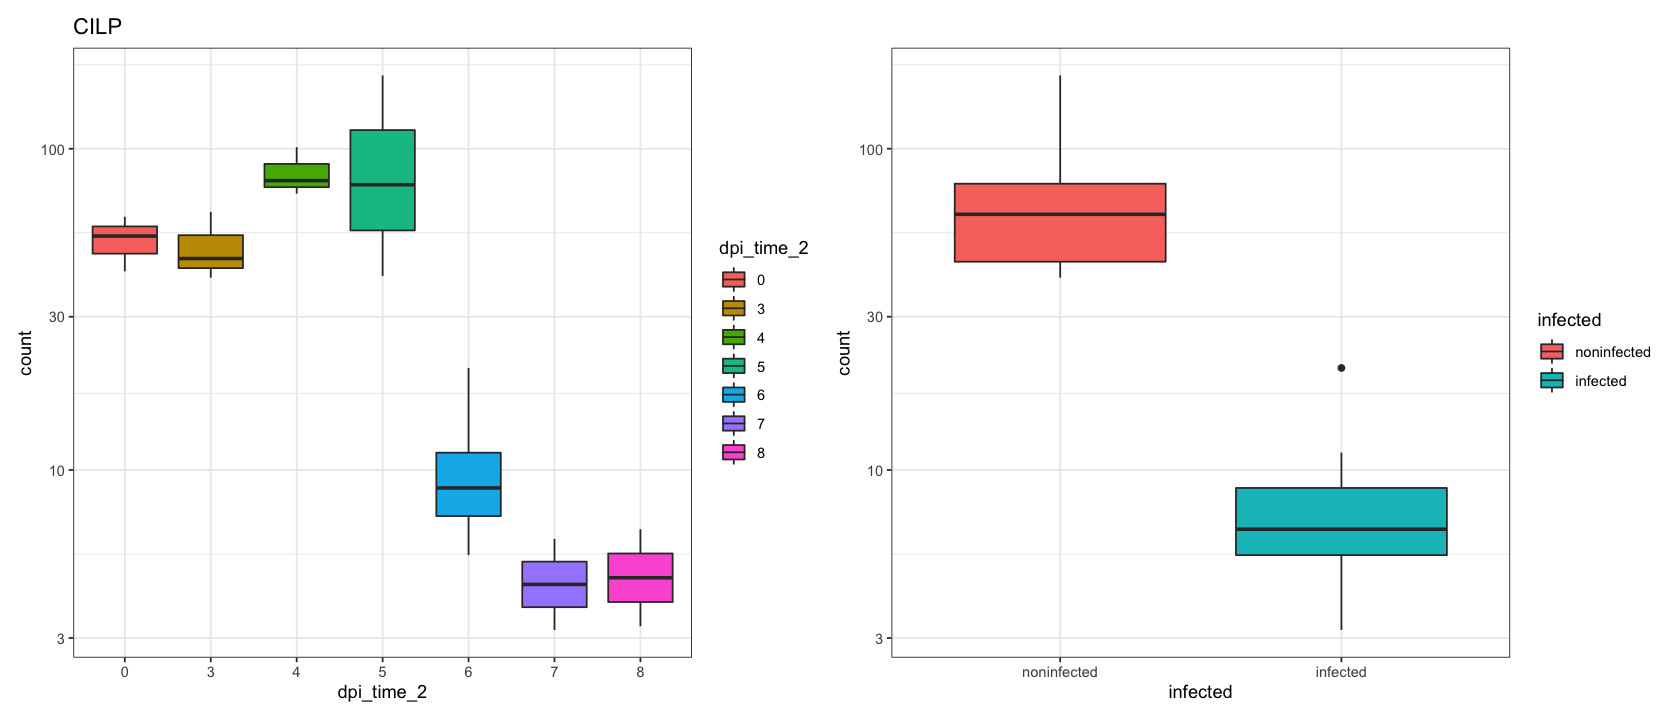

In [153]:
options(repr.plot.width=14, repr.plot.height=6)
plotCounts(dds_simple, gene="ENSMMUG00000009659.4", intgroup = "dpi_time_2", returnData = TRUE) %>%
  ggplot() + aes(dpi_time_2, count) + geom_boxplot(aes(fill=dpi_time_2)) + scale_y_log10() + theme_bw() + ggtitle("CILP")| plotCounts(dds_simple, gene="ENSMMUG00000009659.4", intgroup = "infected", returnData = TRUE) %>%
  ggplot() + aes(infected, count) + geom_boxplot(aes(fill=infected)) + scale_y_log10() + theme_bw()

tissue              n.genes
Spleen              Spleen              551    
Kidney              Kidney               82    
Liver               Liver                21    
Brain:Brain-Gr      Brain:Brain-Gr       28    
Sex Organ:Ovary     Sex Organ:Ovary      68    
Lymph node:LN-AX-R  Lymph node:LN-AX-R  104    
Lymph node:LN-ING-L Lymph node:LN-ING-L  78    
Lymph node:LN-MES   Lymph node:LN-MES   108    
Sex Organ:Sex-Organ Sex Organ:Sex-Organ 169    
Skin:Rash           Skin:Rash           117    
Skin:Non-Rash       Skin:Non-Rash        53    
Adrenal Gland       Adrenal Gland         1    
Sex Organ:Testis    Sex Organ:Testis    291    
Lung                Lung                  4    
Brain:Brain-Wh      Brain:Brain-Wh       49    
Whole blood         Whole blood         317    
PBMC                PBMC                  6

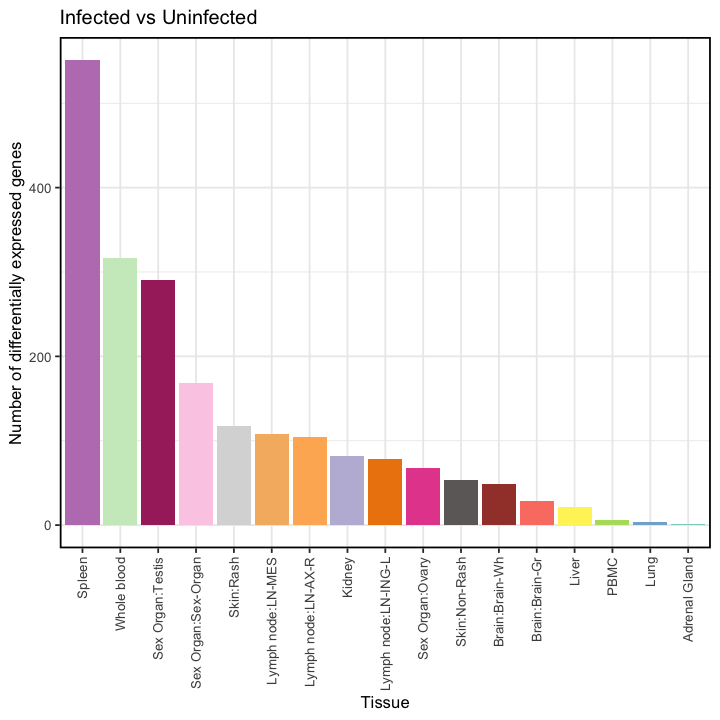

In [208]:
de.genes.all.tissues <- lapply(marker.genes, function(x) {
    xp <- x[NA2FALSE(x$padj < 0.05),]
   xp <- xp[NA2FALSE(xp$log2FoldChange > 2),]
    

    unique(rownames(xp))
    
})

n.de.per.tissue <- unlist(lapply(de.genes.all.tissues, length))
n.de.df.plot <- data.frame(
    tissue = names(n.de.per.tissue),
    n.genes = n.de.per.tissue
)

n.de.df.plot

#n.de.df.plot<-n.de.df.plot[!rownames(n.de.df.plot) %in% c("Lung","Sex Organ:Testis","Liver","PBMC"),]
options(repr.plot.width=6, repr.plot.height=6)
P1<-ggplot(n.de.df.plot, aes(x=fct_reorder(tissue, desc(n.genes)),y=n.genes,fill=tissue)) +
    geom_bar(stat='identity') + scale_fill_manual(values = color_ft)+
    theme_bw() + ylab("Number of differentially expressed genes")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
    scale_x_discrete("Tissue") + ggtitle("Infected vs Uninfected")+
 theme(text=element_text(size=10,color='black'),panel.border = element_rect(colour = "black", fill=NA, size=1))
barp<-P1+NoLegend()
ggsave("../Barplot.pdf",width=14,height=15)
barp

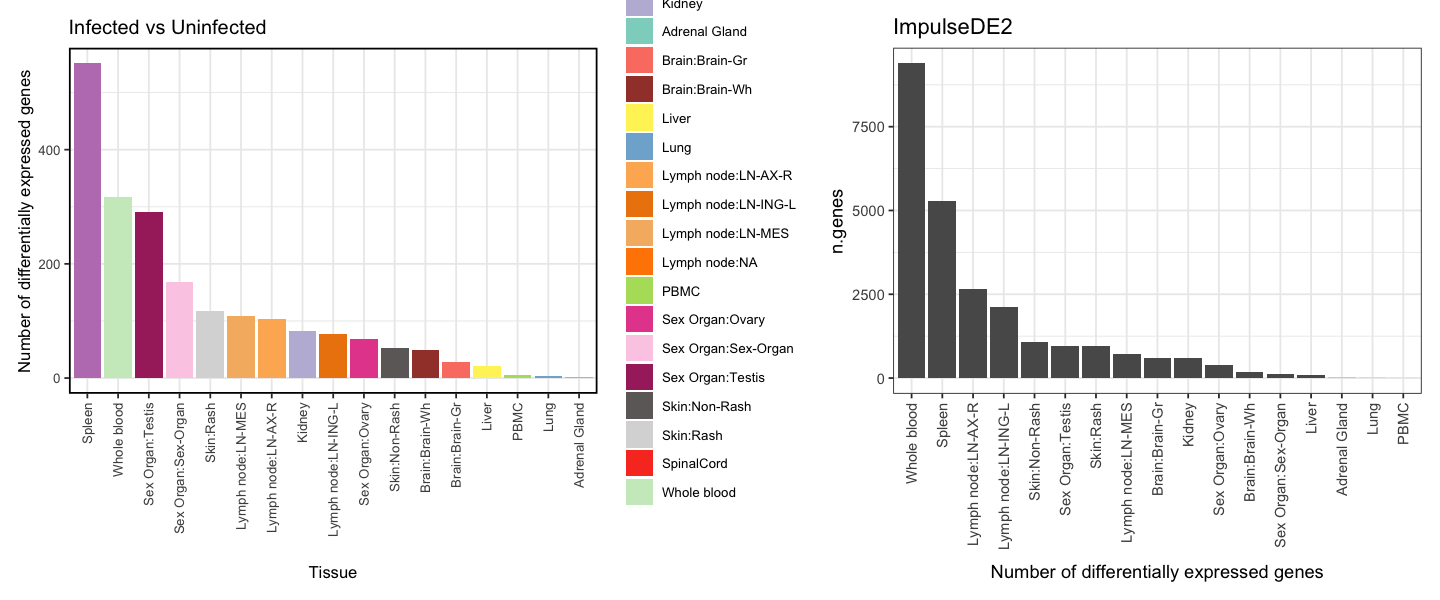

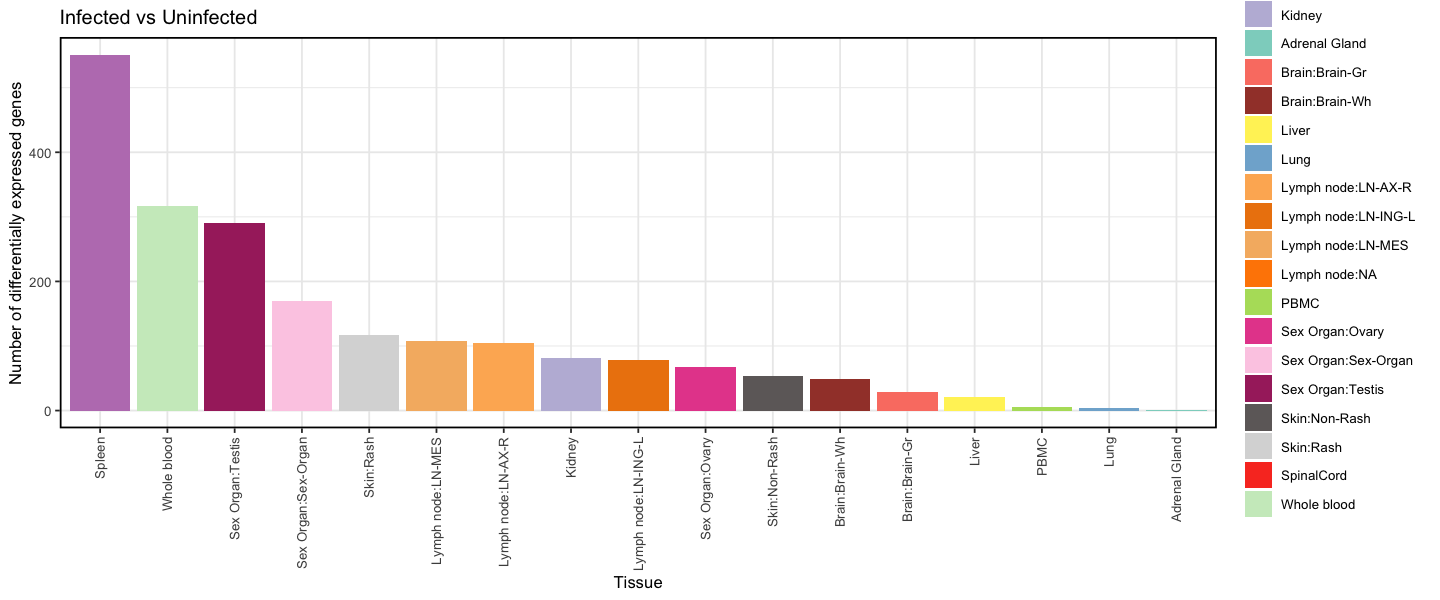

In [209]:
de.genes.all.tissues <- lapply(genes.ImpulseDE2.fulltissue, function(x) {
    xp <- x[NA2FALSE(x$padj < 0.05),]
     
    unique(rownames(xp))
})

n.de.per.tissue <- unlist(lapply(de.genes.all.tissues, length))
n.de.df.plot <- data.frame(
    tissue = names(n.de.per.tissue),
    n.genes = n.de.per.tissue
)
options(repr.plot.width=6, repr.plot.height=6)
P2<-ggplot(n.de.df.plot, aes(x=fct_reorder(tissue, desc(n.genes)),y=n.genes)) +
    geom_bar(stat='identity') + 
    theme_bw() + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
    scale_x_discrete("Number of differentially expressed genes")+ ggtitle("ImpulseDE2")
library(patchwork)
options(repr.plot.width=12,repr.plot.height=5)
P1+P2
P1

In [158]:
tissue.marker.full<-readRDS("../06-tissue-specific-markers/marker.genes.full.bind.rds")
tissue.marker <- tissue.marker.full %>% group_by(tissue) %>% top_n(30, log2FoldChange)
as.data.frame(marker.genes[["Spleen"]])
head(tissue.marker %>% filter(tissue=="Liver"))

baseMean     log2FoldChange lfcSE     stat       
ENSMMUG00000023296.4   6.96244769 -0.05378883    0.3147794 -0.1708778 
ENSMMUG00000036181.3   0.39238514 -0.85253119    0.9963708 -0.8556365 
ENSMMUG00000000634.4 235.80602174 -1.18498625    0.2382626 -4.9734462 
ENSMMUG00000037875.2  49.68141677 -0.12201832    0.2011761 -0.6065251 
ENSMMUG00000000632.4 175.21339964 -0.60798553    0.2144016 -2.8357327 
ENSMMUG00000064799.1   0.21748407 -1.20794697    1.4724769 -0.8203504 
ENSMMUG00000057389.1   8.64287594 -0.87435362    0.7164670 -1.2203684 
ENSMMUG00000031200.3  42.41470824 -0.37653306    0.6691885 -0.5626712 
ENSMMUG00000052613.1  27.37281491  1.42319504    0.6162445  2.3094648 
ENSMMUG00000031199.3   0.03622218  0.56640352    3.0883181  0.1834019 
ENSMMUG00000053841.1   0.05827923  0.56640332    3.0883181  0.1834019 
ENSMMUG00000017095.4   0.02018906  1.05385355    3.0885914  0.3412085 
ENSMMUG00000025700.3   0.00000000          NA           NA         NA 
ENSMMUG00000049101.2   0.00000000          NA           NA         NA 
ENSMMUG00000048289.2   0.00000000          NA           NA         NA 
ENSMMUG00000017368.4   0.00000000          NA           NA         NA 
ENSMMUG00000055842.1   0.00000000          NA           NA         NA 
ENSMMUG00000031198.3   0.00000000          NA           NA         NA 
ENSMMUG00000062331.1   0.00000000          NA           NA         NA 
ENSMMUG00000049901.1   0.00000000          NA           NA         NA 
ENSMMUG00000064657.1   0.01207406  1.05385355    3.0885914  0.3412085 
ENSMMUG00000005566.4   0.00000000          NA           NA         NA 
ENSMMUG00000064874.1   0.00000000          NA           NA         NA 
ENSMMUG00000039595.2   0.00000000          NA           NA         NA 
ENSMMUG00000038524.2   0.56038917 -2.60643643    2.3766212 -1.0966983 
ENSMMUG00000049432.1   1.59498982 -4.10794015    2.2367018 -1.8366061 
ENSMMUG00000050812.1   0.89916420  1.01154293    0.7560969  1.3378482 
ENSMMUG00000059065.1   0.39235623 -1.24253014    1.5110649 -0.8222877 
ENSMMUG00000064763.1   1.61681409 -3.75536248    1.4443611 -2.6000164 
ENSMMUG00000053957.1   0.95269909 -2.97963374    1.7244830 -1.7278417 
⋮                    ⋮            ⋮              ⋮         ⋮          
ENSMMUG00000061317.1   0.00000000          NA           NA          NA
ENSMMUG00000035418.3   0.01890719  1.05385355    3.0885914  0.34120847
ENSMMUG00000058819.1   0.02035653  1.05385355    3.0885914  0.34120847
ENSMMUG00000032007.3   0.00000000          NA           NA          NA
ENSMMUG00000064678.1   0.14475876 -0.62860181    2.2911337 -0.27436278
ENSMMUG00000053315.1   0.00000000          NA           NA          NA
ENSMMUG00000064027.1   0.27207633  0.15958784    1.2473768  0.12793876
ENSMMUG00000059394.1   0.00000000          NA           NA          NA
ENSMMUG00000045208.2 481.87632412 -0.01697119    0.5708420 -0.02973009
ENSMMUG00000051421.1   0.08666932  1.32494088    2.0662867  0.64121831
ENSMMUG00000052034.1   0.00000000          NA           NA          NA
ENSMMUG00000051083.1   0.00000000          NA           NA          NA
ENSMMUG00000053226.1   0.00000000          NA           NA          NA
ENSMMUG00000050029.1   0.03933454  0.58743589    3.0883834  0.19020821
ENSMMUG00000063640.1   1.53166650 -0.51697337    0.6649195 -0.77749767
ENSMMUG00000064166.1   0.00000000          NA           NA          NA
ENSMMUG00000063841.1   0.72118284 -1.15566248    0.8928264 -1.29438654
ENSMMUG00000054492.1   1.33870973 -0.56751135    0.6144840 -0.92355750
ENSMMUG00000053676.1  10.29624147 -0.52458017    0.2750873 -1.90695882
ENSMMUG00000061620.1   0.00000000          NA           NA          NA
ENSMMUG00000056295.1   0.01890719  1.05385355    3.0885914  0.34120847
ENSMMUG00000053892.1   0.92998940 -1.16072400    0.6793474 -1.70858675
ENSMMUG00000063065.1   0.07444238  0.69221192    3.0830839  0.22451933
ENSMMUG00000050721.1   0.00000000          NA           NA          NA
ENSMMUG00000061489.1   0.00000000          NA

tissue baseMean  log2FoldChange lfcSE     stat     pvalue       
1 Liver  1364.1683 13.72607       0.6033570 22.74951 1.451284e-114
2 Liver  2284.2652 16.46040       0.7836854 21.00383  6.050336e-98
3 Liver   683.9034 15.25008       0.7335644 20.78901  5.442351e-96
4 Liver   382.6140 13.38500       0.6993493 19.13922  1.190446e-81
5 Liver  1341.3604 15.88314       0.9014606 17.61934  1.750222e-69
6 Liver   475.2723 14.93822       0.8892721 16.79826  2.513271e-63
  padj          Geneid              
1 1.347457e-111 ENSMMUG00000008015.4
2  4.085444e-95 ENSMMUG00000060306.1
3  3.368664e-93 ENSMMUG00000007725.3
4  4.653810e-79 ENSMMUG00000018634.4
5  4.382045e-67 ENSMMUG00000011218.4
6  4.869844e-61 ENSMMUG00000008559.4
  Chr                                                                                                                                                                          
1 chr15;chr15;chr15;chr15;chr15;chr15                                                                                                                                          
2 chr14;chr14;chr14;chr14                                                                                                                                                      
3 chr14;chr14;chr14;chr14;chr14;chr14;chr14;chr14;chr14;chr14                                                                                                                  
4 chr9;chr9;chr9;chr9;chr9;chr9;chr9;chr9;chr9;chr9;chr9;chr9;chr9;chr9;chr9;chr9;chr9;chr9                                                                                    
5 chr7;chr7;chr7;chr7;chr7                                                                                                                                                     
6 chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr15;chr15
  Start                                                                                                                                                                                                                                                               
1 28519326;28520054;28520365;28521176;28521444;28522005                                                                                                                                                                                                               
2 47325962;47326494;47328777;47329311                                                                                                                                                                                                                                 
3 59500676;59500909;59501081;59501333;59503094;59503954;59504429;59509545;59509759;59510061                                                                                                                                                                           
4 57871413;57871687;57875608;57875608;57877127;57877127;57880435;57880435;57880925;57880925;57884603;57884603;57885988;57885988;57886533;57886533;57887298;57910837                                                                                                   
5 156782245;156784252;156789405;156792486;156793873                                                                                                                                                                                                                   
6 28775366;28775366;28777021;28777703;28777703;28777703;28779395;28779395;28779395;28780287;28780287;28780287;28781417;28781417;28781417;28784565;28784565;28784565;28791460;28791460;28791460;28792629;28792629;28792629;28793121;28793121;28793121;28793939;28793939
  ⋯ dispMAP   Intercept SE_Intercept WaldStatistic_Intercept
1 ⋯  8.537413 7.669956  0.2403563    31.91077               
2 ⋯ 12.024412 8.611767  0.2851282    30.20315               
3 ⋯ 12.952799 7.30

In [210]:
genes.ImpulseDE2<- lapply(genes.ImpulseDE2.fulltissue, function(x) {
    a<-as.data.frame(x)
    a$Gene<-rownames(a)
    a
})

genes.Infection<- lapply(names(marker.genes), function(tissue) {
    x<-marker.genes[[tissue]]
    a<-as.data.frame(x)
    a$Gene<-rownames(a)
    marker<-tissue.marker %>% filter(tissue==tissue)
    a$Marker<-ifelse(a$Gene %in% unique(marker$Geneid),TRUE,FALSE)
    a
})

names(genes.Infection)<-names(marker.genes)

de.genes.Impulse<-bind_rows(genes.ImpulseDE2, .id = "tissue")
de.genes.Infection<-bind_rows(genes.Infection, .id = "tissue")
head(de.genes.Impulse)
head(de.genes.Infection)

tissue Gene                 p          padj       
ENSMMUG00000023296.4...1 Spleen ENSMMUG00000023296.4 0.97155590 0.999999999
ENSMMUG00000036181.3...2 Spleen ENSMMUG00000036181.3 0.61583879 0.999999999
ENSMMUG00000000634.4...3 Spleen ENSMMUG00000000634.4 0.00025774 0.002891308
ENSMMUG00000037875.2...4 Spleen ENSMMUG00000037875.2 0.52533284 0.980625760
ENSMMUG00000000632.4...5 Spleen ENSMMUG00000000632.4 0.05136080 0.194512263
ENSMMUG00000064799.1...6 Spleen ENSMMUG00000064799.1 0.58702700 0.999999999
                         loglik_full loglik_red df_full df_red mean       
ENSMMUG00000023296.4...1  -64.40096   -64.84164 7       2       14.8310277
ENSMMUG00000036181.3...2  -26.23131   -28.00630 7       2        0.9154542
ENSMMUG00000000634.4...3 -128.57967  -140.38564 7       2      486.7697685
ENSMMUG00000037875.2...4  -93.15043   -95.23499 7       2      102.3669930
ENSMMUG00000000632.4...5 -120.95887  -126.45935 7       2      359.8970535
ENSMMUG00000064799.1...6  -20.53467   -22.40601 7       2        0.4898855
                         converge_impulse converge_const converge_sigmoid
ENSMMUG00000023296.4...1 0                0              0               
ENSMMUG00000036181.3...2 0                0              0               
ENSMMUG00000000634.4...3 0                0              0               
ENSMMUG00000037875.2...4 0                0              0               
ENSMMUG00000000632.4...5 0                0              0               
ENSMMUG00000064799.1...6 0                0              0               
                         impulseTOsigmoid_p impulseTOsigmoid_padj
ENSMMUG00000023296.4...1 0.8266847          1                    
ENSMMUG00000036181.3...2 0.4015873          1                    
ENSMMUG00000000634.4...3 0.8632546          1                    
ENSMMUG00000037875.2...4 0.7747125          1                    
ENSMMUG00000000632.4...5 0.7674755          1                    
ENSMMUG00000064799.1...6 0.8703869          1                    
                         sigmoidTOconst_p sigmoidTOconst_padj isTransient
ENSMMUG00000023296.4...1 9.187369e-01     1.0000000000        FALSE      
ENSMMUG00000036181.3...2 6.313193e-01     0.9754428096        FALSE      
ENSMMUG00000000634.4...3 3.466792e-05     0.0004651504        FALSE      
ENSMMUG00000037875.2...4 3.007681e-01     0.6510603570        FALSE      
ENSMMUG00000000632.4...5 1.495431e-02     0.0649098601        FALSE      
ENSMMUG00000064799.1...6 3.253253e-01     0.6860717248        FALSE      
                         isMonotonous allZero
ENSMMUG00000023296.4...1 FALSE        FALSE  
ENSMMUG00000036181.3...2 FALSE        FALSE  
ENSMMUG00000000634.4...3  TRUE        FALSE  
ENSMMUG00000037875.2...4 FALSE        FALSE  
ENSMMUG00000000632.4...5 FALSE        FALSE  
ENSMMUG00000064799.1...6 FALSE        FALSE

tissue baseMean    log2FoldChange lfcSE     stat      
ENSMMUG00000023296.4...1 Spleen   6.9624477 -0.05378883    0.3147794 -0.1708778
ENSMMUG00000036181.3...2 Spleen   0.3923851 -0.85253119    0.9963708 -0.8556365
ENSMMUG00000000634.4...3 Spleen 235.8060217 -1.18498625    0.2382626 -4.9734462
ENSMMUG00000037875.2...4 Spleen  49.6814168 -0.12201832    0.2011761 -0.6065251
ENSMMUG00000000632.4...5 Spleen 175.2133996 -0.60798553    0.2144016 -2.8357327
ENSMMUG00000064799.1...6 Spleen   0.2174841 -1.20794697    1.4724769 -0.8203504
                         pvalue       padj         Gene                 Marker
ENSMMUG00000023296.4...1 8.643198e-01 9.121704e-01 ENSMMUG00000023296.4 FALSE 
ENSMMUG00000036181.3...2 3.921989e-01           NA ENSMMUG00000036181.3 FALSE 
ENSMMUG00000000634.4...3 6.577303e-07 1.187907e-05 ENSMMUG00000000634.4 FALSE 
ENSMMUG00000037875.2...4 5.441661e-01 6.763790e-01 ENSMMUG00000037875.2 FALSE 
ENSMMUG00000000632.4...5 4.572070e-03 1.630870e-02 ENSMMUG00000000632.4 FALSE 
ENSMMUG00000064799.1...6 4.120164e-01           NA ENSMMUG00000064799.1 FALSE

In [204]:
LN<-as.data.frame(genes.Infection$`Lymph node:LN-AX-R`)
LN %>% filter(rownames(LN) =="ENSMMUG00000009659.4")

baseMean log2FoldChange lfcSE     stat      pvalue      
ENSMMUG00000009659.4 43.19662 -3.292015      0.3192451 -10.31187 6.227491e-25
                     padj         Gene                 Marker
ENSMMUG00000009659.4 6.556303e-21 ENSMMUG00000009659.4 FALSE

In [211]:
table(de.genes.Infection$tissue)
dim(de.genes.Infection)
table(de.genes.Impulse$tissue)
dim(de.genes.Impulse)
colnames(de.genes.Infection)<-c(colnames(de.genes.Infection)[1],
                                paste0("Infection.",colnames(de.genes.Infection)[2:7]),"Gene","Marker")

head(de.genes.Impulse$Gene)
head(de.genes.Infection$Gene)
table(de.genes.Impulse$Gene %in% de.genes.Infection$Gene)

de.genes.Infection<-de.genes.Infection %>% filter(!is.na(de.genes.Infection$Gene))
de.genes.Impulse<-de.genes.Impulse %>% filter(!is.na(de.genes.Impulse$Gene) & (de.genes.Impulse$Gene %in% unique(de.genes.Infection$Gene)))

table(de.genes.Infection$tissue)
dim(de.genes.Infection)
table(de.genes.Impulse$tissue)
dim(de.genes.Impulse)


      Adrenal Gland      Brain:Brain-Gr      Brain:Brain-Wh              Kidney 
              35395               35395               35395               35395 
              Liver                Lung  Lymph node:LN-AX-R Lymph node:LN-ING-L 
              35395               35395               35395               35395 
  Lymph node:LN-MES                PBMC     Sex Organ:Ovary Sex Organ:Sex-Organ 
              35395               35395               35395               35395 
   Sex Organ:Testis       Skin:Non-Rash           Skin:Rash              Spleen 
              35395               35395               35395               35395 
        Whole blood 
              35395 

[1] 601715      9


      Adrenal Gland      Brain:Brain-Gr      Brain:Brain-Wh              Kidney 
              35405               35405               35405               35405 
              Liver                Lung  Lymph node:LN-AX-R Lymph node:LN-ING-L 
              35405               35405               35405               35405 
  Lymph node:LN-MES                PBMC     Sex Organ:Ovary Sex Organ:Sex-Organ 
              35405               35405               35405               35405 
   Sex Organ:Testis       Skin:Non-Rash           Skin:Rash              Spleen 
              35405               35405               35405               35405 
        Whole blood 
              35405 

[1] 601885     19

[1] "ENSMMUG00000023296.4" "ENSMMUG00000036181.3" "ENSMMUG00000000634.4"
[4] "ENSMMUG00000037875.2" "ENSMMUG00000000632.4" "ENSMMUG00000064799.1"

[1] "ENSMMUG00000023296.4" "ENSMMUG00000036181.3" "ENSMMUG00000000634.4"
[4] "ENSMMUG00000037875.2" "ENSMMUG00000000632.4" "ENSMMUG00000064799.1"


 FALSE   TRUE 
   170 601715 


      Adrenal Gland      Brain:Brain-Gr      Brain:Brain-Wh              Kidney 
              35395               35395               35395               35395 
              Liver                Lung  Lymph node:LN-AX-R Lymph node:LN-ING-L 
              35395               35395               35395               35395 
  Lymph node:LN-MES                PBMC     Sex Organ:Ovary Sex Organ:Sex-Organ 
              35395               35395               35395               35395 
   Sex Organ:Testis       Skin:Non-Rash           Skin:Rash              Spleen 
              35395               35395               35395               35395 
        Whole blood 
              35395 

[1] 601715      9


      Adrenal Gland      Brain:Brain-Gr      Brain:Brain-Wh              Kidney 
              35395               35395               35395               35395 
              Liver                Lung  Lymph node:LN-AX-R Lymph node:LN-ING-L 
              35395               35395               35395               35395 
  Lymph node:LN-MES                PBMC     Sex Organ:Ovary Sex Organ:Sex-Organ 
              35395               35395               35395               35395 
   Sex Organ:Testis       Skin:Non-Rash           Skin:Rash              Spleen 
              35395               35395               35395               35395 
        Whole blood 
              35395 

[1] 601715     19

In [176]:
colnames(de.genes.Impulse)
colnames(de.genes.Infection)

[1] "tissue"                "Gene"                  "p"                    
 [4] "padj"                  "loglik_full"           "loglik_red"           
 [7] "df_full"               "df_red"                "mean"                 
[10] "converge_impulse"      "converge_const"        "converge_sigmoid"     
[13] "impulseTOsigmoid_p"    "impulseTOsigmoid_padj" "sigmoidTOconst_p"     
[16] "sigmoidTOconst_padj"   "isTransient"           "isMonotonous"         
[19] "allZero"

[1] "tissue"                   "Infection.baseMean"      
[3] "Infection.log2FoldChange" "Infection.lfcSE"         
[5] "Infection.stat"           "Infection.pvalue"        
[7] "Infection.padj"           "Gene"                    
[9] "Marker"

In [212]:
rownames(de.genes.Infection)<-paste0(de.genes.Infection$Gene,".",de.genes.Infection$tissue)
rownames(de.genes.Impulse)<-paste0(de.genes.Impulse$Gene,".",de.genes.Impulse$tissue)
head(de.genes.Infection)
DE.Compiled<-cbind(de.genes.Impulse,de.genes.Infection)
head(DE.Compiled)

tissue Infection.baseMean Infection.log2FoldChange
ENSMMUG00000023296.4.Spleen Spleen   6.9624477        -0.05378883             
ENSMMUG00000036181.3.Spleen Spleen   0.3923851        -0.85253119             
ENSMMUG00000000634.4.Spleen Spleen 235.8060217        -1.18498625             
ENSMMUG00000037875.2.Spleen Spleen  49.6814168        -0.12201832             
ENSMMUG00000000632.4.Spleen Spleen 175.2133996        -0.60798553             
ENSMMUG00000064799.1.Spleen Spleen   0.2174841        -1.20794697             
                            Infection.lfcSE Infection.stat Infection.pvalue
ENSMMUG00000023296.4.Spleen 0.3147794       -0.1708778     8.643198e-01    
ENSMMUG00000036181.3.Spleen 0.9963708       -0.8556365     3.921989e-01    
ENSMMUG00000000634.4.Spleen 0.2382626       -4.9734462     6.577303e-07    
ENSMMUG00000037875.2.Spleen 0.2011761       -0.6065251     5.441661e-01    
ENSMMUG00000000632.4.Spleen 0.2144016       -2.8357327     4.572070e-03    
ENSMMUG00000064799.1.Spleen 1.4724769       -0.8203504     4.120164e-01    
                            Infection.padj Gene                 Marker
ENSMMUG00000023296.4.Spleen 9.121704e-01   ENSMMUG00000023296.4 FALSE 
ENSMMUG00000036181.3.Spleen           NA   ENSMMUG00000036181.3 FALSE 
ENSMMUG00000000634.4.Spleen 1.187907e-05   ENSMMUG00000000634.4 FALSE 
ENSMMUG00000037875.2.Spleen 6.763790e-01   ENSMMUG00000037875.2 FALSE 
ENSMMUG00000000632.4.Spleen 1.630870e-02   ENSMMUG00000000632.4 FALSE 
ENSMMUG00000064799.1.Spleen           NA   ENSMMUG00000064799.1 FALSE

tissue Gene                 p          padj       
ENSMMUG00000023296.4.Spleen Spleen ENSMMUG00000023296.4 0.97155590 0.999999999
ENSMMUG00000036181.3.Spleen Spleen ENSMMUG00000036181.3 0.61583879 0.999999999
ENSMMUG00000000634.4.Spleen Spleen ENSMMUG00000000634.4 0.00025774 0.002891308
ENSMMUG00000037875.2.Spleen Spleen ENSMMUG00000037875.2 0.52533284 0.980625760
ENSMMUG00000000632.4.Spleen Spleen ENSMMUG00000000632.4 0.05136080 0.194512263
ENSMMUG00000064799.1.Spleen Spleen ENSMMUG00000064799.1 0.58702700 0.999999999
                            loglik_full loglik_red df_full df_red mean       
ENSMMUG00000023296.4.Spleen  -64.40096   -64.84164 7       2       14.8310277
ENSMMUG00000036181.3.Spleen  -26.23131   -28.00630 7       2        0.9154542
ENSMMUG00000000634.4.Spleen -128.57967  -140.38564 7       2      486.7697685
ENSMMUG00000037875.2.Spleen  -93.15043   -95.23499 7       2      102.3669930
ENSMMUG00000000632.4.Spleen -120.95887  -126.45935 7       2      359.8970535
ENSMMUG00000064799.1.Spleen  -20.53467   -22.40601 7       2        0.4898855
                            converge_impulse ⋯ allZero tissue
ENSMMUG00000023296.4.Spleen 0                ⋯ FALSE   Spleen
ENSMMUG00000036181.3.Spleen 0                ⋯ FALSE   Spleen
ENSMMUG00000000634.4.Spleen 0                ⋯ FALSE   Spleen
ENSMMUG00000037875.2.Spleen 0                ⋯ FALSE   Spleen
ENSMMUG00000000632.4.Spleen 0                ⋯ FALSE   Spleen
ENSMMUG00000064799.1.Spleen 0                ⋯ FALSE   Spleen
                            Infection.baseMean Infection.log2FoldChange
ENSMMUG00000023296.4.Spleen   6.9624477        -0.05378883             
ENSMMUG00000036181.3.Spleen   0.3923851        -0.85253119             
ENSMMUG00000000634.4.Spleen 235.8060217        -1.18498625             
ENSMMUG00000037875.2.Spleen  49.6814168        -0.12201832             
ENSMMUG00000000632.4.Spleen 175.2133996        -0.60798553             
ENSMMUG00000064799.1.Spleen   0.2174841        -1.20794697             
                            Infection.lfcSE Infection.stat Infection.pvalue
ENSMMUG00000023296.4.Spleen 0.3147794       -0.1708778     8.643198e-01    
ENSMMUG00000036181.3.Spleen 0.9963708       -0.8556365     3.921989e-01    
ENSMMUG00000000634.4.Spleen 0.2382626       -4.9734462     6.577303e-07    
ENSMMUG00000037875.2.Spleen 0.2011761       -0.6065251     5.441661e-01    
ENSMMUG00000000632.4.Spleen 0.2144016       -2.8357327     4.572070e-03    
ENSMMUG00000064799.1.Spleen 1.4724769       -0.8203504     4.120164e-01    
                            Infection.padj Gene                 Marker
ENSMMUG00000023296.4.Spleen 9.121704e-01   ENSMMUG00000023296.4 FALSE 
ENSMMUG00000036181.3.Spleen           NA   ENSMMUG00000036181.3 FALSE 
ENSMMUG00000000634.4.Spleen 1.187907e-05   ENSMMUG00000000634.4 FALSE 
ENSMMUG00000037875.2.Spleen 6.763790e-01   ENSMMUG00000037875.2 FALSE 
ENSMMUG00000000632.4.Spleen 1.630870e-02   ENSMMUG00000000632.4 FALSE 
ENSMMUG00000064799.1.Spleen           NA   ENSMMUG00000064799.1 FALSE

In [24]:
tmp1

ERROR: Error in eval(expr, envir, enclos): object 'tmp1' not found


In [19]:
#write.csv(DE.Compiled,"DE_Compiled.csv")

In [20]:
rowData(dd)

DataFrame with 35405 rows and 39 columns
                                   Geneid                    Chr
                              <character>            <character>
ENSMMUG00000023296.4 ENSMMUG00000023296.4         chr1;chr1;chr1
ENSMMUG00000036181.3 ENSMMUG00000036181.3                   chr1
ENSMMUG00000000634.4 ENSMMUG00000000634.4 chr1;chr1;chr1;chr1;..
ENSMMUG00000037875.2 ENSMMUG00000037875.2 chr1;chr1;chr1;chr1;..
ENSMMUG00000000632.4 ENSMMUG00000000632.4 chr1;chr1;chr1;chr1;..
...                                   ...                    ...
EBOV-VP30                       EBOV-VP30             KU182905.1
EBOV-MidReg                   EBOV-MidReg             KU182905.1
EBOV-VP24                       EBOV-VP24             KU182905.1
EBOV-L                             EBOV-L             KU182905.1
EBOV-3pTrailer             EBOV-3pTrailer             KU182905.1
                                      Start                    End
                                <character>    

In [213]:
dd<-dds.qc.experimental.alltp
suppressPackageStartupMessages(library(org.Mmu.eg.db))
suppressPackageStartupMessages(library(GO.db))
suppressPackageStartupMessages(library(AnnotationDbi))
go.db.df <- select(GO.db,keys=keys(GO.db),columns = columns(GO.db))
terms <- go.db.df$TERM
term_sel <- grepl("cytokine",terms) & !(grepl("cytokinesis",terms))

cytokine.go.pathways <- go.db.df[term_sel,]
cytokine_go_id <- cytokine.go.pathways$GOID
getGenesInGOpathways <- function(goids) {
    unique(AnnotationDbi::select(org.Mmu.eg.db, keytype='GOALL', keys=goids, columns=c("ENSEMBL"))$ENSEMBL)
}
cytokine.genes <- getGenesInGOpathways(cytokine_go_id)


length(cytokine.genes)
transcript.gene<-rowData(dd)$Geneid
names(transcript.gene) <- nbHelpers::strpart(rownames(rowData(dd)),'.',fixed=T,1)
head(transcript.gene)
cytokine.genes<-transcript.gene[cytokine.genes]
names(cytokine.genes)<-NULL

go.db.df <- select(GO.db,keys=keys(GO.db),columns = columns(GO.db))
apoptosis.go.pathways <- go.db.df[grep("apoptosis",go.db.df$TERM),]
apotosis_go_id <- apoptosis.go.pathways$GOID
apoptosis.genes <- select(org.Mmu.eg.db, keytype='GOALL', keys=apotosis_go_id, columns=c("ENSEMBL"))$ENSEMBL
length(apoptosis.genes)
transcript.gene<-rowData(dd)$Geneid
names(transcript.gene) <- nbHelpers::strpart(rownames(rowData(dd)),'.',fixed=T,1)
head(transcript.gene)
apoptosis.genes<-transcript.gene[apoptosis.genes]
names(apoptosis.genes)<-NULL


go.db.df <- select(GO.db,keys=keys(GO.db),columns = columns(GO.db))
apoptosis.go.pathways <- go.db.df[grep("inflammatory response",go.db.df$TERM),]
inflam_go_id <- apoptosis.go.pathways$GOID
inflam.genes <- select(org.Mmu.eg.db, keytype='GOALL', keys=inflam_go_id, columns=c("ENSEMBL"))$ENSEMBL
length(inflam.genes)
transcript.gene<-rowData(dd)$Geneid
names(transcript.gene) <- nbHelpers::strpart(rownames(rowData(dd)),'.',fixed=T,1)
head(transcript.gene)
inflam.genes<-transcript.gene[inflam.genes]
names(inflam.genes)<-NULL



go.db.df <- select(GO.db,keys=keys(GO.db),columns = columns(GO.db))
apoptosis.go.pathways <- go.db.df[grep("extracellular matrix",go.db.df$TERM),]
extraecllular_go_id <- apoptosis.go.pathways$GOID
extraecllular.genes <- select(org.Mmu.eg.db, keytype='GOALL', keys=extraecllular_go_id, columns=c("ENSEMBL"))$ENSEMBL
length(extraecllular.genes)
transcript.gene<-rowData(dd)$Geneid
names(transcript.gene) <- nbHelpers::strpart(rownames(rowData(dd)),'.',fixed=T,1)
head(transcript.gene)
extraecllular.genes<-transcript.gene[extraecllular.genes]
names(extraecllular.genes)<-NULL



parp.names <- c("PARP14", "PARP9", "PARP12", "PARP3", "PARP2", "PARP15", "PARP1", 
"PARP8", "PARP6", "PARP11", "PARP16", "ZC3HAV1")

parp.genes <- rowData(dd)$Geneid[rowData(dd)$external_gene_name %in% parp.names]


# this is the list of isg genes from the single-cell paper
isg.set.for.scoring.fromSC <- c("ADAR","APOBEC3G","APOL6","B2M","BANK1","CASP1","DDX58",
                                "DDX60","DDX60L","DHX58","EIF2AK2","EPSTI1","FAS","GBP2",
                                "HERC5","HERC6","HIF1A","IFI16","IFI27","IFI35","IFI44",
                                "IFI6","IFIH1","IFIT3","IRF7","IRF9","ISG15","ISG20",
                                "LGALS3BP","MX1","MX2","NFKBIA","NMI","OAS2","OAS3","PARP14",
                                "PARP9","PML","PSMB8","PSMB9","PSME2","PTPN1","RARRES3","RSAD2",
                                "SAMD9","SAMD9L","SAMHD1","SP100","STAT1","STAT3","TRIM22","TRIM25",
                                "TRIM5","UBE2L6","VAMP5","WARS","XAF1","ZNFX1")

Isg<-read.csv(file = "ISG.csv",header = FALSE)[,1]
isg.names<-unique(c(Isg,isg.set.for.scoring.fromSC))
isg.genes <- rowData(dd)$Geneid[rowData(dd)$external_gene_name %in% isg.names]
isg.genes
cytokine.genes
apoptosis.genes
inflam.genes
extraecllular.genes

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:many mapping between keys and columns



[1] 625

ENSMMUG00000023296     ENSMMUG00000036181     ENSMMUG00000000634 
"ENSMMUG00000023296.4" "ENSMMUG00000036181.3" "ENSMMUG00000000634.4" 
    ENSMMUG00000037875     ENSMMUG00000000632     ENSMMUG00000064799 
"ENSMMUG00000037875.2" "ENSMMUG00000000632.4" "ENSMMUG00000064799.1"

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:many mapping between keys and columns



[1] 67

ENSMMUG00000023296     ENSMMUG00000036181     ENSMMUG00000000634 
"ENSMMUG00000023296.4" "ENSMMUG00000036181.3" "ENSMMUG00000000634.4" 
    ENSMMUG00000037875     ENSMMUG00000000632     ENSMMUG00000064799 
"ENSMMUG00000037875.2" "ENSMMUG00000000632.4" "ENSMMUG00000064799.1"

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:many mapping between keys and columns



[1] 726

ENSMMUG00000023296     ENSMMUG00000036181     ENSMMUG00000000634 
"ENSMMUG00000023296.4" "ENSMMUG00000036181.3" "ENSMMUG00000000634.4" 
    ENSMMUG00000037875     ENSMMUG00000000632     ENSMMUG00000064799 
"ENSMMUG00000037875.2" "ENSMMUG00000000632.4" "ENSMMUG00000064799.1"

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:many mapping between keys and columns



[1] 466

ENSMMUG00000023296     ENSMMUG00000036181     ENSMMUG00000000634 
"ENSMMUG00000023296.4" "ENSMMUG00000036181.3" "ENSMMUG00000000634.4" 
    ENSMMUG00000037875     ENSMMUG00000000632     ENSMMUG00000064799 
"ENSMMUG00000037875.2" "ENSMMUG00000000632.4" "ENSMMUG00000064799.1"

[1] "ENSMMUG00000023569.4" "ENSMMUG00000008922.4" "ENSMMUG00000004490.4"
  [4] "ENSMMUG00000016093.4" "ENSMMUG00000002350.4" "ENSMMUG00000018566.4"
  [7] "ENSMMUG00000011454.4" "ENSMMUG00000018911.4" "ENSMMUG00000050757.1"
 [10] "ENSMMUG00000019302.4" "ENSMMUG00000000995.4" "ENSMMUG00000012263.4"
 [13] "ENSMMUG00000022569.4" "ENSMMUG00000016381.4" "ENSMMUG00000000912.4"
 [16] "ENSMMUG00000016367.4" "ENSMMUG00000020903.3" "ENSMMUG00000010314.4"
 [19] "ENSMMUG00000010316.4" "ENSMMUG00000008441.4" "ENSMMUG00000019092.4"
 [22] "ENSMMUG00000001880.4" "ENSMMUG00000003634.4" "ENSMMUG00000015087.4"
 [25] "ENSMMUG00000021762.4" "ENSMMUG00000015329.4" "ENSMMUG00000044257.2"
 [28] "ENSMMUG00000003961.4" "ENSMMUG00000003956.4" "ENSMMUG00000019983.3"
 [31] "ENSMMUG00000020803.4" "ENSMMUG00000000170.4" "ENSMMUG00000014122.4"
 [34] "ENSMMUG00000006779.4" "ENSMMUG00000018478.4" "ENSMMUG00000008100.4"
 [37] "ENSMMUG00000004577.4" "ENSMMUG00000011304.4" "ENSMMUG00000011301.4"
 [40] "ENSMMUG00000050761.1" "ENSMMUG00000060797.1" "ENSMMUG00000002569.4"
 [43] "ENSMMUG00000007669.4" "ENSMMUG00000012473.4" "ENSMMUG00000040817.2"
 [46] "ENSMMUG00000020374.4" "ENSMMUG00000021002.4" "ENSMMUG00000023780.4"
 [49] "ENSMMUG00000011752.4" "ENSMMUG00000014254.4" "ENSMMUG00000014255.4"
 [52] "ENSMMUG00000011426.4" "ENSMMUG00000007585.4" "ENSMMUG00000008303.4"
 [55] "ENSMMUG00000061761.1" "ENSMMUG00000005001.4" "ENSMMUG00000017533.4"
 [58] "ENSMMUG00000000798.4" "ENSMMUG00000050457.1" "ENSMMUG00000000803.4"
 [61] "ENSMMUG00000012782.4" "ENSMMUG00000046639.2" "ENSMMUG00000008505.4"
 [64] "ENSMMUG00000017781.4" "ENSMMUG00000005613.4" "ENSMMUG00000016575.4"
 [67] "ENSMMUG00000049915.1" "ENSMMUG00000004014.4" "ENSMMUG00000001332.4"
 [70] "ENSMMUG00000000338.4" "ENSMMUG00000000335.4" "ENSMMUG00000009852.4"
 [73] "ENSMMUG00000008670.4" "ENSMMUG00000012442.4" "ENSMMUG00000058193.1"
 [76] "ENSMMUG00000019067.4" "ENSMMUG00000014558.4" "ENSMMUG00000001936.4"
 [79] "ENSMMUG00000058122.1" "ENSMMUG00000037522.2" "ENSMMUG00000015969.3"
 [82] "ENSMMUG00000039346.2" "ENSMMUG00000001050.4" "ENSMMUG00000002091.4"
 [85] "ENSMMUG00000023623.4" "ENSMMUG00000007878.4" "ENSMMUG00000014926.4"
 [88] "ENSMMUG00000009602.4" "ENSMMUG00000010083.4" "ENSMMUG00000000288.4"
 [91] "ENSMMUG00000054796.1" "ENSMMUG00000005790.4" "ENSMMUG00000014755.4"
 [94] "ENSMMUG00000010707.4" "ENSMMUG00000015999.3" "ENSMMUG00000019662.4"
 [97] "ENSMMUG00000007777.4" "ENSMMUG00000010956.3" "ENSMMUG00000014163.4"
[100] "ENSMMUG00000011042.4" "ENSMMUG00000003110.4" "ENSMMUG00000005829.4"
[103] "ENSMMUG00000051543.1" "ENSMMUG00000022735.4"

[1] "ENSMMUG00000001711.4" "ENSMMUG00000062394.1" "ENSMMUG00000013773.4"
  [4] "ENSMMUG00000002684.4" "ENSMMUG00000022577.4" "ENSMMUG00000003133.4"
  [7] "ENSMMUG00000056408.1" "ENSMMUG00000016754.4" "ENSMMUG00000015847.4"
 [10] "ENSMMUG00000014254.4" "ENSMMUG00000014255.4" "ENSMMUG00000042946.2"
 [13] "ENSMMUG00000008624.4" "ENSMMUG00000000870.4" "ENSMMUG00000002418.4"
 [16] "ENSMMUG00000018679.4" "ENSMMUG00000002192.4" "ENSMMUG00000019304.4"
 [19] "ENSMMUG00000016915.4" "ENSMMUG00000021762.4" "ENSMMUG00000012263.4"
 [22] "ENSMMUG00000047685.2" "ENSMMUG00000015689.4" "ENSMMUG00000012321.4"
 [25] "ENSMMUG00000062832.1" "ENSMMUG00000052649.1" "ENSMMUG00000011752.4"
 [28] "ENSMMUG00000012048.4" "ENSMMUG00000017781.4" "ENSMMUG00000004194.3"
 [31] "ENSMMUG00000023569.4" "ENSMMUG00000016167.4" "ENSMMUG00000018972.3"
 [34] "ENSMMUG00000017204.4" "ENSMMUG00000015348.4" "ENSMMUG00000016723.4"
 [37] "ENSMMUG00000020725.4" "ENSMMUG00000003571.4" "ENSMMUG00000030531.3"
 [40] "ENSMMUG00000041307.2" "ENSMMUG00000023256.4" "ENSMMUG00000052851.1"
 [43] "ENSMMUG00000021628.4" "ENSMMUG00000014141.4" "ENSMMUG00000050712.1"
 [46] "ENSMMUG00000010173.4" "ENSMMUG00000014235.4" "ENSMMUG00000059267.1"
 [49] "ENSMMUG00000001649.4" "ENSMMUG00000003018.4" "ENSMMUG00000012746.3"
 [52] "ENSMMUG00000007969.4" "ENSMMUG00000011852.3" "ENSMMUG00000017745.4"
 [55] "ENSMMUG00000003187.4" "ENSMMUG00000010866.4" "ENSMMUG00000004503.4"
 [58] "ENSMMUG00000016982.4" "ENSMMUG00000061872.1" "ENSMMUG00000022403.4"
 [61] "ENSMMUG00000010007.4" "ENSMMUG00000010199.4" "ENSMMUG00000058889.1"
 [64] "ENSMMUG00000003373.4" "ENSMMUG00000023437.4" "ENSMMUG00000059191.1"
 [67] "ENSMMUG00000022523.4" "ENSMMUG00000005322.4" "ENSMMUG00000021659.3"
 [70] "ENSMMUG00000003947.4" "ENSMMUG00000007490.4" "ENSMMUG00000000156.4"
 [73] "ENSMMUG00000004014.4" "ENSMMUG00000019092.4" "ENSMMUG00000009869.4"
 [76] "ENSMMUG00000005448.4" "ENSMMUG00000050757.1" "ENSMMUG00000020025.4"
 [79] "ENSMMUG00000002569.4" "ENSMMUG00000007683.4" "ENSMMUG00000002678.4"
 [82] "ENSMMUG00000023008.4" "ENSMMUG00000013875.4" "ENSMMUG00000021478.4"
 [85] "ENSMMUG00000011308.4" "ENSMMUG00000021412.4" "ENSMMUG00000043913.2"
 [88] "ENSMMUG00000013359.4" "ENSMMUG00000006071.4" "ENSMMUG00000047198.2"
 [91] NA                     "ENSMMUG00000005946.4" "ENSMMUG00000000857.4"
 [94] "ENSMMUG00000015168.4" "ENSMMUG00000023491.4" "ENSMMUG00000018334.3"
 [97] "ENSMMUG00000020289.4" "ENSMMUG00000017969.4" "ENSMMUG00000019591.4"
[100] "ENSMMUG00000021825.4" "ENSMMUG00000010402.4" "ENSMMUG00000016890.4"
[103] "ENSMMUG00000006994.4" "ENSMMUG00000058506.1" "ENSMMUG00000013107.4"
[106] "ENSMMUG00000055561.1" "ENSMMUG00000005208.4" "ENSMMUG00000012667.4"
[109] "ENSMMUG00000019573.4" "ENSMMUG00000012069.4" "ENSMMUG00000004489.4"
[112] "ENSMMUG00000008693.4" "ENSMMUG00000004211.4" "ENSMMUG00000004250.4"
[115] "ENSMMUG00000052693.1" "ENSMMUG00000001748.4" "ENSMMUG00000008869.4"
[118] "ENSMMUG00000062413.1" "ENSMMUG00000019635.4" "ENSMMUG00000021002.4"
[121] "ENSMMUG00000061716.1" "ENSMMUG00000041425.2" "ENSMMUG00000012762.4"
[124] "ENSMMUG00000011905.4" "ENSMMUG00000017952.3" "ENSMMUG00000057214.1"
[127] "ENSMMUG00000006035.4" "ENSMMUG00000051774.1" "ENSMMUG00000023274.4"
[130] "ENSMMUG00000007244.4" "ENSMMUG00000000108.4" "ENSMMUG00000052003.1"
[133] "ENSMMUG00000014756.4" "ENSMMUG00000015961.4" "ENSMMUG00000010095.4"
[136] "ENSMMUG00000061368.1" "ENSMMUG00000003533.4" "ENSMMUG00000009852.4"
[139] "ENSMMUG00000059512.1" "ENSMMUG00000015371.4" "ENSMMUG00000004191.4"
[142] "ENSMMUG00000060389.1" "ENSMMUG00000010578.4" "ENSMMUG00000063599.1"
[145] "ENSMMUG00000004071.4" "ENSMMUG00000003683.4" "ENSMMUG00000008100.4"
[148] "ENSMMUG00000023226.4" "ENSMMUG00000013434.4" "ENSMMUG00000021093.4"
[151] "ENSMMUG00000058656.1" "ENSMMUG00000007403.4" "ENSMMUG00000049383.1"
[154] "ENSMMUG00000006691.4" "ENSMMUG00000038181.2" "ENSMMUG00000054990.1"
[157] "ENSMMUG00000062200.1" "ENSMMUG00000015969.3" "ENSMMUG00000016195.4"
[160] "ENSMMUG00000023378.4

[1] "ENSMMUG00000004760.4" "ENSMMUG00000007209.3" "ENSMMUG00000003707.4"
 [4] "ENSMMUG00000008941.4" "ENSMMUG00000056380.1" "ENSMMUG00000023305.4"
 [7] "ENSMMUG00000004954.4" "ENSMMUG00000041041.2" "ENSMMUG00000044552.2"
[10] "ENSMMUG00000000406.4" "ENSMMUG00000012979.4" "ENSMMUG00000007152.4"
[13] "ENSMMUG00000032254.3" NA                     "ENSMMUG00000065134.1"
[16] "ENSMMUG00000004760.4" "ENSMMUG00000007209.3" "ENSMMUG00000001044.4"
[19] "ENSMMUG00000003707.4" "ENSMMUG00000009173.4" "ENSMMUG00000021563.4"
[22] "ENSMMUG00000008941.4" "ENSMMUG00000056380.1" "ENSMMUG00000023305.4"
[25] "ENSMMUG00000004954.4" "ENSMMUG00000011146.4" "ENSMMUG00000050348.1"
[28] "ENSMMUG00000041041.2" "ENSMMUG00000010424.4" "ENSMMUG00000044552.2"
[31] "ENSMMUG00000000406.4" "ENSMMUG00000012033.4" "ENSMMUG00000019667.4"
[34] "ENSMMUG00000012979.4" "ENSMMUG00000007152.4" "ENSMMUG00000032254.3"
[37] "ENSMMUG00000010323.4" "ENSMMUG00000007486.4" "ENSMMUG00000054886.1"
[40] "ENSMMUG00000016548.4" "ENSMMUG00000023640.4" "ENSMMUG00000043809.2"
[43] "ENSMMUG00000053457.1" NA                     "ENSMMUG00000021563.4"
[46] "ENSMMUG00000056380.1" "ENSMMUG00000011146.4" "ENSMMUG00000050348.1"
[49] "ENSMMUG00000012033.4" "ENSMMUG00000032254.3" "ENSMMUG00000010323.4"
[52] "ENSMMUG00000007486.4" "ENSMMUG00000023640.4" "ENSMMUG00000021563.4"
[55] "ENSMMUG00000050348.1" "ENSMMUG00000012033.4" "ENSMMUG00000032254.3"
[58] "ENSMMUG00000007486.4" "ENSMMUG00000056380.1" "ENSMMUG00000011146.4"
[61] "ENSMMUG00000010323.4" "ENSMMUG00000023640.4" "ENSMMUG00000021563.4"
[64] "ENSMMUG00000012033.4" "ENSMMUG00000021563.4" "ENSMMUG00000012033.4"
[67] NA

[1] "ENSMMUG00000013434.4" "ENSMMUG00000038138.2" "ENSMMUG00000011426.4"
  [4] "ENSMMUG00000021002.4" NA                     "ENSMMUG00000011426.4"
  [7] "ENSMMUG00000021002.4" NA                     "ENSMMUG00000030785.3"
 [10] "ENSMMUG00000011106.4" "ENSMMUG00000001748.4" NA                    
 [13] NA                     "ENSMMUG00000015828.4" "ENSMMUG00000023569.4"
 [16] "ENSMMUG00000003187.4" "ENSMMUG00000004180.4" "ENSMMUG00000008635.4"
 [19] "ENSMMUG00000008693.4" "ENSMMUG00000045550.2" "ENSMMUG00000016218.3"
 [22] "ENSMMUG00000000988.4" "ENSMMUG00000057214.1" "ENSMMUG00000013387.4"
 [25] "ENSMMUG00000038181.2" "ENSMMUG00000017022.4" "ENSMMUG00000020924.4"
 [28] "ENSMMUG00000018375.4" "ENSMMUG00000008843.4" "ENSMMUG00000045654.2"
 [31] "ENSMMUG00000003637.4" "ENSMMUG00000049532.1" "ENSMMUG00000008635.4"
 [34] "ENSMMUG00000008693.4" "ENSMMUG00000045550.2" "ENSMMUG00000016218.3"
 [37] "ENSMMUG00000038181.2" "ENSMMUG00000003637.4" "ENSMMUG00000023569.4"
 [40] "ENSMMUG00000008843.4" "ENSMMUG00000045654.2" "ENSMMUG00000030785.3"
 [43] "ENSMMUG00000011106.4" "ENSMMUG00000001748.4" "ENSMMUG00000013434.4"
 [46] "ENSMMUG00000038138.2" "ENSMMUG00000006868.4" "ENSMMUG00000044778.2"
 [49] NA                     "ENSMMUG00000003133.4" "ENSMMUG00000012321.4"
 [52] "ENSMMUG00000003674.4" "ENSMMUG00000017960.4" "ENSMMUG00000018497.4"
 [55] "ENSMMUG00000017876.4" "ENSMMUG00000052787.1" "ENSMMUG00000008635.4"
 [58] "ENSMMUG00000064987.1" "ENSMMUG00000008693.4" "ENSMMUG00000061716.1"
 [61] "ENSMMUG00000045550.2" "ENSMMUG00000016218.3" "ENSMMUG00000019983.3"
 [64] "ENSMMUG00000023312.4" "ENSMMUG00000038181.2" "ENSMMUG00000019674.4"
 [67] "ENSMMUG00000056548.1" "ENSMMUG00000021373.4" "ENSMMUG00000045654.2"
 [70] "ENSMMUG00000003637.4" NA                     NA                    
 [73] "ENSMMUG00000002192.4" "ENSMMUG00000017204.4" "ENSMMUG00000030785.3"
 [76] "ENSMMUG00000012746.3" "ENSMMUG00000016982.4" "ENSMMUG00000005322.4"
 [79] "ENSMMUG00000006071.4" "ENSMMUG00000017969.4" "ENSMMUG00000004211.4"
 [82] "ENSMMUG00000001748.4" "ENSMMUG00000021002.4" "ENSMMUG00000004379.4"
 [85] "ENSMMUG00000010578.4" "ENSMMUG00000013434.4" "ENSMMUG00000007403.4"
 [88] "ENSMMUG00000006691.4" "ENSMMUG00000063008.1" "ENSMMUG00000051859.1"
 [91] "ENSMMUG00000010323.4" "ENSMMUG00000045654.2" "ENSMMUG00000011106.4"
 [94] "ENSMMUG00000054410.1" "ENSMMUG00000008444.4" NA                    
 [97] "ENSMMUG00000002192.4" "ENSMMUG00000017204.4" "ENSMMUG00000012746.3"
[100] "ENSMMUG00000016982.4" "ENSMMUG00000005322.4" "ENSMMUG00000006071.4"
[103] "ENSMMUG00000017969.4" "ENSMMUG00000004211.4" "ENSMMUG00000021002.4"
[106] "ENSMMUG00000010578.4" "ENSMMUG00000013434.4" "ENSMMUG00000007403.4"
[109] "ENSMMUG00000006691.4" "ENSMMUG00000063008.1" "ENSMMUG00000051859.1"
[112] "ENSMMUG00000010323.4" "ENSMMUG00000045654.2" "ENSMMUG00000054410.1"
[115] "ENSMMUG00000008444.4" "ENSMMUG00000004379.4" NA                    
[118] "ENSMMUG00000013434.4" NA                     "ENSMMUG00000013434.4"
[121] "ENSMMUG00000056548.1" "ENSMMUG00000003133.4" "ENSMMUG00000008624.4"
[124] "ENSMMUG00000019304.4" "ENSMMUG00000023569.4" "ENSMMUG00000008869.4"
[127] "ENSMMUG00000006035.4" "ENSMMUG00000006868.4" "ENSMMUG00000008843.4"
[130] "ENSMMUG00000045654.2" NA                     "ENSMMUG00000003133.4"
[133] "ENSMMUG00000017876.4" "ENSMMUG00000008693.4" "ENSMMUG00000045550.2"
[136] "ENSMMUG00000038181.2" "ENSMMUG00000021373.4" "ENSMMUG00000045654.2"
[139] "ENSMMUG00000003637.4" "ENSMMUG00000003133.4" "ENSMMUG00000017876.4"
[142] "ENSMMUG00000008693.4" "ENSMMUG00000038181.2" "ENSMMUG00000045654.2"
[145] "ENSMMUG00000003637.4" "ENSMMUG00000003133.4" "ENSMMUG00000008624.4"
[148] "ENSMMUG00000019304.4" "ENSMMUG00000023569.4" "ENSMMUG00000008869.4"
[151] "ENSMMUG00000008843.4" "ENSMMUG00000045654.2" "ENSMMUG00000003133.4"
[154] "ENSMMUG00000008624.4" "ENSMMUG00000023569.4" "ENSMMUG00000008869.4"
[157] "ENSMMUG00000019304.4" "ENSMMUG00000008843.4" "ENSMMUG00000045654.2"
[160] "ENSMMUG00000023569.4

[1] "ENSMMUG00000004347.4" "ENSMMUG00000017022.4" "ENSMMUG00000064170.1"
  [4] "ENSMMUG00000064170.1" "ENSMMUG00000004347.4" "ENSMMUG00000017022.4"
  [7] "ENSMMUG00000021286.4" "ENSMMUG00000001467.4" "ENSMMUG00000003548.4"
 [10] "ENSMMUG00000016046.3" "ENSMMUG00000039654.2" "ENSMMUG00000011362.4"
 [13] "ENSMMUG00000021641.4" "ENSMMUG00000054963.1" "ENSMMUG00000011444.4"
 [16] "ENSMMUG00000010682.4" "ENSMMUG00000016997.4" "ENSMMUG00000008256.4"
 [19] "ENSMMUG00000004103.4" "ENSMMUG00000021290.4" "ENSMMUG00000004239.4"
 [22] "ENSMMUG00000015084.4" "ENSMMUG00000003637.4" "ENSMMUG00000016200.4"
 [25] "ENSMMUG00000022282.4" "ENSMMUG00000050596.1" "ENSMMUG00000008387.4"
 [28] "ENSMMUG00000007499.4" "ENSMMUG00000004282.4" "ENSMMUG00000050596.1"
 [31] "ENSMMUG00000008387.4" NA                     NA                    
 [34] "ENSMMUG00000050596.1" "ENSMMUG00000008387.4" "ENSMMUG00000007953.4"
 [37] "ENSMMUG00000007499.4" "ENSMMUG00000004253.4" "ENSMMUG00000004844.4"
 [40] "ENSMMUG00000005243.4" "ENSMMUG00000015084.4" "ENSMMUG00000003301.4"
 [43] "ENSMMUG00000004282.4" NA                     "ENSMMUG00000016997.4"
 [46] "ENSMMUG00000008256.4" "ENSMMUG00000016046.3" NA                    
 [49] "ENSMMUG00000021286.4" "ENSMMUG00000001467.4" "ENSMMUG00000001066.4"
 [52] "ENSMMUG00000050596.1" "ENSMMUG00000008387.4" "ENSMMUG00000022613.4"
 [55] "ENSMMUG00000007953.4" "ENSMMUG00000008197.4" "ENSMMUG00000013193.4"
 [58] "ENSMMUG00000007675.4" "ENSMMUG00000050712.1" "ENSMMUG00000007499.4"
 [61] "ENSMMUG00000008447.4" "ENSMMUG00000011669.4" "ENSMMUG00000016046.3"
 [64] "ENSMMUG00000000265.4" "ENSMMUG00000009097.4" "ENSMMUG00000004347.4"
 [67] "ENSMMUG00000015851.4" "ENSMMUG00000056626.1" "ENSMMUG00000002932.4"
 [70] "ENSMMUG00000039654.2" "ENSMMUG00000009483.4" "ENSMMUG00000020818.4"
 [73] "ENSMMUG00000008635.4" "ENSMMUG00000010660.4" "ENSMMUG00000021642.4"
 [76] "ENSMMUG00000003405.4" "ENSMMUG00000045043.2" "ENSMMUG00000019496.4"
 [79] "ENSMMUG00000064987.1" "ENSMMUG00000002037.4" "ENSMMUG00000004249.4"
 [82] "ENSMMUG00000004250.4" "ENSMMUG00000004253.4" "ENSMMUG00000000785.4"
 [85] "ENSMMUG00000010922.4" "ENSMMUG00000011444.4" "ENSMMUG00000007891.4"
 [88] "ENSMMUG00000000130.4" "ENSMMUG00000023274.4" "ENSMMUG00000009010.4"
 [91] "ENSMMUG00000004683.4" "ENSMMUG00000003638.4" "ENSMMUG00000004844.4"
 [94] "ENSMMUG00000004071.4" "ENSMMUG00000013054.4" "ENSMMUG00000002952.4"
 [97] "ENSMMUG00000001929.4" "ENSMMUG00000003061.4" "ENSMMUG00000002122.4"
[100] "ENSMMUG00000058999.1" "ENSMMUG00000000694.4" "ENSMMUG00000016995.4"
[103] "ENSMMUG00000002138.4" "ENSMMUG00000017022.4" "ENSMMUG00000016880.4"
[106] "ENSMMUG00000012330.4" "ENSMMUG00000015455.4" "ENSMMUG00000017668.4"
[109] "ENSMMUG00000019415.4" "ENSMMUG00000013665.4" "ENSMMUG00000000332.4"
[112] "ENSMMUG00000004103.4" "ENSMMUG00000021290.4" "ENSMMUG00000055187.1"
[115] "ENSMMUG00000005243.4" "ENSMMUG00000002424.4" "ENSMMUG00000006187.4"
[118] "ENSMMUG00000002158.4" "ENSMMUG00000013197.4" "ENSMMUG00000015084.4"
[121] "ENSMMUG00000045654.2" "ENSMMUG00000014419.4" "ENSMMUG00000003301.4"
[124] "ENSMMUG00000002672.4" "ENSMMUG00000017196.4" "ENSMMUG00000056387.1"
[127] "ENSMMUG00000064170.1" "ENSMMUG00000050419.1" "ENSMMUG00000019012.4"
[130] "ENSMMUG00000014474.4" "ENSMMUG00000057952.1" "ENSMMUG00000016200.4"
[133] "ENSMMUG00000014384.4" "ENSMMUG00000004282.4" "ENSMMUG00000008142.4"
[136] "ENSMMUG00000047247.2" "ENSMMUG00000021286.4" "ENSMMUG00000001467.4"
[139] "ENSMMUG00000001066.4" "ENSMMUG00000022229.4" "ENSMMUG00000003143.4"
[142] "ENSMMUG00000011426.4" "ENSMMUG00000062825.1" "ENSMMUG00000012321.4"
[145] "ENSMMUG00000018445.4" "ENSMMUG00000008197.4" "ENSMMUG00000001475.4"
[148] "ENSMMUG00000055568.1" "ENSMMUG00000013193.4" "ENSMMUG00000012432.4"
[151] "ENSMMUG00000046449.2" "ENSMMUG00000052785.1" "ENSMMUG00000003283.4"
[154] "ENSMMUG00000016046.3" "ENSMMUG00000022521.4" "ENSMMUG00000056083.1"
[157] "ENSMMUG00000000265.4" "ENSMMUG00000021304.4" "ENSMMUG00000004475.4"
[160] "ENSMMUG00000021302.4

In [ ]:
gene_map <- as.data.frame(rowData(dd)[,c('Geneid','external_gene_name')])
head(gene_map)


In [219]:
types.genes<-bind_rows(list(isg=data.frame(Gene.id=isg.genes),
parp=data.frame(Gene.id=parp.genes),
cytokine=data.frame(Gene.id=cytokine.genes),
                            apoptosis=data.frame(Gene.id=apoptosis.genes),
                           inflammation=data.frame(Gene.id=inflam.genes),
                           extracellular=data.frame(Gene.id=extraecllular.genes)), .id = "type")
types.genes


new.names <- sapply(types.genes$Gene.id, function(x) { 
    new.name <- gene_map[match(x, gene_map$Geneid),'external_gene_name']
    ifelse(new.name == "", x,new.name)
})

types.genes$Gene<-new.names
types.genes


new.names <- sapply(de.genes.Infection$Gene, function(x) { 
    new.name <- types.genes[match(x, types.genes$Gene.id),'type']
    ifelse(is.na(new.name),"Other",new.name)
})

de.genes.Infection$type<-new.names
head(de.genes.Infection)
top.genes<-de.genes.Infection %>% group_by(tissue,type) %>% filter(Infection.padj <0.05 & !Marker) %>% top_n(4,abs(Infection.log2FoldChange))
de.genes.Infection<-de.genes.Infection %>% filter(!tissue == "PBMC")
#top.genes<-top.genes %>%  group_by(type) %>% top_n(10,abs(Infection.log2FoldChange))
#top.genes<-top.genes %>% group_by(type) %>% top_n(20,abs(Infection.log2FoldChange))
head(top.genes)
tmp1<-(de.genes.Infection %>% filter(Gene %in% unique(top.genes$Gene)))[c("tissue","Gene","Infection.log2FoldChange")] 
library(reshape)
head(tmp1)
tmp2<-cast(tmp1, Gene ~ tissue)

sign2<-(de.genes.Infection %>% filter(Gene %in% unique(top.genes$Gene)))[c("tissue","Gene","Infection.padj")] 

sign<-cast(sign2, Gene ~ tissue)

head(sign)

type          Gene.id             
1    isg           ENSMMUG00000023569.4
2    isg           ENSMMUG00000008922.4
3    isg           ENSMMUG00000004490.4
4    isg           ENSMMUG00000016093.4
5    isg           ENSMMUG00000002350.4
6    isg           ENSMMUG00000018566.4
7    isg           ENSMMUG00000011454.4
8    isg           ENSMMUG00000018911.4
9    isg           ENSMMUG00000050757.1
10   isg           ENSMMUG00000019302.4
11   isg           ENSMMUG00000000995.4
12   isg           ENSMMUG00000012263.4
13   isg           ENSMMUG00000022569.4
14   isg           ENSMMUG00000016381.4
15   isg           ENSMMUG00000000912.4
16   isg           ENSMMUG00000016367.4
17   isg           ENSMMUG00000020903.3
18   isg           ENSMMUG00000010314.4
19   isg           ENSMMUG00000010316.4
20   isg           ENSMMUG00000008441.4
21   isg           ENSMMUG00000019092.4
22   isg           ENSMMUG00000001880.4
23   isg           ENSMMUG00000003634.4
24   isg           ENSMMUG00000015087.4
25   isg           ENSMMUG00000021762.4
26   isg           ENSMMUG00000015329.4
27   isg           ENSMMUG00000044257.2
28   isg           ENSMMUG00000003961.4
29   isg           ENSMMUG00000003956.4
30   isg           ENSMMUG00000019983.3
⋮    ⋮             ⋮                   
1971 extracellular ENSMMUG00000008387.4
1972 extracellular ENSMMUG00000007499.4
1973 extracellular ENSMMUG00000016046.3
1974 extracellular ENSMMUG00000004347.4
1975 extracellular ENSMMUG00000010660.4
1976 extracellular ENSMMUG00000007891.4
1977 extracellular ENSMMUG00000004683.4
1978 extracellular ENSMMUG00000000694.4
1979 extracellular ENSMMUG00000017022.4
1980 extracellular ENSMMUG00000015455.4
1981 extracellular ENSMMUG00000006187.4
1982 extracellular ENSMMUG00000056387.1
1983 extracellular ENSMMUG00000064170.1
1984 extracellular ENSMMUG00000004282.4
1985 extracellular ENSMMUG00000050596.1
1986 extracellular ENSMMUG00000008387.4
1987 extracellular ENSMMUG00000016046.3
1988 extracellular ENSMMUG00000004347.4
1989 extracellular ENSMMUG00000017022.4
1990 extracellular ENSMMUG00000007499.4
1991 extracellular ENSMMUG00000016046.3
1992 extracellular ENSMMUG00000007891.4
1993 extracellular ENSMMUG00000004683.4
1994 extracellular ENSMMUG00000000694.4
1995 extracellular ENSMMUG00000015455.4
1996 extracellular ENSMMUG00000064170.1
1997 extracellular ENSMMUG00000004282.4
1998 extracellular NA                  
1999 extracellular ENSMMUG00000011110.4
2000 extracellular ENSMMUG00000015986.4

type          Gene.id              Gene   
1    isg           ENSMMUG00000023569.4 IL10   
2    isg           ENSMMUG00000008922.4 CRP    
3    isg           ENSMMUG00000004490.4 IFI16  
4    isg           ENSMMUG00000016093.4 ADAR   
5    isg           ENSMMUG00000002350.4 IFI44  
6    isg           ENSMMUG00000018566.4 JAK1   
7    isg           ENSMMUG00000011454.4 IFI6   
8    isg           ENSMMUG00000018911.4 PRKCZ  
9    isg           ENSMMUG00000050757.1 ISG15  
10   isg           ENSMMUG00000019302.4 TNFSF10
11   isg           ENSMMUG00000000995.4 MYD88  
12   isg           ENSMMUG00000012263.4 TLR9   
13   isg           ENSMMUG00000022569.4 PARP14 
14   isg           ENSMMUG00000016381.4 PARP9  
15   isg           ENSMMUG00000000912.4 CD86   
16   isg           ENSMMUG00000016367.4 CD80   
17   isg           ENSMMUG00000020903.3 CXCL10 
18   isg           ENSMMUG00000010314.4 HERC6  
19   isg           ENSMMUG00000010316.4 HERC5  
20   isg           ENSMMUG00000008441.4 BANK1  
21   isg           ENSMMUG00000019092.4 IL15   
22   isg           ENSMMUG00000001880.4 DDX60  
23   isg           ENSMMUG00000003634.4 DDX60L 
24   isg           ENSMMUG00000015087.4 IRF2   
25   isg           ENSMMUG00000021762.4 TLR3   
26   isg           ENSMMUG00000015329.4 MX1    
27   isg           ENSMMUG00000044257.2 MX2    
28   isg           ENSMMUG00000003961.4 IFNAR1 
29   isg           ENSMMUG00000003956.4 IFNAR2 
30   isg           ENSMMUG00000019983.3 IL6    
⋮    ⋮             ⋮                    ⋮      
1971 extracellular ENSMMUG00000008387.4 DPP4   
1972 extracellular ENSMMUG00000007499.4 CLASP1 
1973 extracellular ENSMMUG00000016046.3 EMILIN1
1974 extracellular ENSMMUG00000004347.4 ADTRP  
1975 extracellular ENSMMUG00000010660.4 TIE1   
1976 extracellular ENSMMUG00000007891.4 RB1    
1977 extracellular ENSMMUG00000004683.4 DAG1   
1978 extracellular ENSMMUG00000000694.4 PHLDB2 
1979 extracellular ENSMMUG00000017022.4 NOTCH1 
1980 extracellular ENSMMUG00000015455.4 SMAD3  
1981 extracellular ENSMMUG00000006187.4 ANGPTL7
1982 extracellular ENSMMUG00000056387.1 TCF15  
1983 extracellular ENSMMUG00000064170.1 BMP2   
1984 extracellular ENSMMUG00000004282.4 FSCN1  
1985 extracellular ENSMMUG00000050596.1 CST3   
1986 extracellular ENSMMUG00000008387.4 DPP4   
1987 extracellular ENSMMUG00000016046.3 EMILIN1
1988 extracellular ENSMMUG00000004347.4 ADTRP  
1989 extracellular ENSMMUG00000017022.4 NOTCH1 
1990 extracellular ENSMMUG00000007499.4 CLASP1 
1991 extracellular ENSMMUG00000016046.3 EMILIN1
1992 extracellular ENSMMUG00000007891.4 RB1    
1993 extracellular ENSMMUG00000004683.4 DAG1   
1994 extracellular ENSMMUG00000000694.4 PHLDB2 
1995 extracellular ENSMMUG00000015455.4 SMAD3  
1996 extracellular ENSMMUG00000064170.1 BMP2   
1997 extracellular ENSMMUG00000004282.4 FSCN1  
1998 extracellular NA                   NA     
1999 extracellular ENSMMUG00000011110.4 MEPE   
2000 extracellular ENSMMUG00000015986.4 CD248

tissue Infection.baseMean Infection.log2FoldChange
ENSMMUG00000023296.4.Spleen Spleen   6.9624477        -0.05378883             
ENSMMUG00000036181.3.Spleen Spleen   0.3923851        -0.85253119             
ENSMMUG00000000634.4.Spleen Spleen 235.8060217        -1.18498625             
ENSMMUG00000037875.2.Spleen Spleen  49.6814168        -0.12201832             
ENSMMUG00000000632.4.Spleen Spleen 175.2133996        -0.60798553             
ENSMMUG00000064799.1.Spleen Spleen   0.2174841        -1.20794697             
                            Infection.lfcSE Infection.stat Infection.pvalue
ENSMMUG00000023296.4.Spleen 0.3147794       -0.1708778     8.643198e-01    
ENSMMUG00000036181.3.Spleen 0.9963708       -0.8556365     3.921989e-01    
ENSMMUG00000000634.4.Spleen 0.2382626       -4.9734462     6.577303e-07    
ENSMMUG00000037875.2.Spleen 0.2011761       -0.6065251     5.441661e-01    
ENSMMUG00000000632.4.Spleen 0.2144016       -2.8357327     4.572070e-03    
ENSMMUG00000064799.1.Spleen 1.4724769       -0.8203504     4.120164e-01    
                            Infection.padj Gene                 Marker type 
ENSMMUG00000023296.4.Spleen 9.121704e-01   ENSMMUG00000023296.4 FALSE  Other
ENSMMUG00000036181.3.Spleen           NA   ENSMMUG00000036181.3 FALSE  Other
ENSMMUG00000000634.4.Spleen 1.187907e-05   ENSMMUG00000000634.4 FALSE  Other
ENSMMUG00000037875.2.Spleen 6.763790e-01   ENSMMUG00000037875.2 FALSE  Other
ENSMMUG00000000632.4.Spleen 1.630870e-02   ENSMMUG00000000632.4 FALSE  Other
ENSMMUG00000064799.1.Spleen           NA   ENSMMUG00000064799.1 FALSE  Other

tissue Infection.baseMean Infection.log2FoldChange Infection.lfcSE
1 Spleen   2.961833          3.932477                0.8454948      
2 Spleen 160.055842          1.689398                0.5804542      
3 Spleen 251.439598          1.047619                0.2289176      
4 Spleen 514.223842          1.239421                0.2738608      
5 Spleen   5.708366         -2.697417                0.6225099      
6 Spleen  20.041039          1.428703                0.4556398      
  Infection.stat Infection.pvalue Infection.padj Gene                 Marker
1  4.651095      3.301766e-06     4.301936e-05   ENSMMUG00000016188.4 FALSE 
2  2.910475      3.608798e-03     1.340625e-02   ENSMMUG00000008711.4 FALSE 
3  4.576405      4.730338e-06     5.701961e-05   ENSMMUG00000011146.4 FALSE 
4  4.525734      6.018619e-06     6.901436e-05   ENSMMUG00000012033.4 FALSE 
5 -4.333131      1.470038e-05     1.430633e-04   ENSMMUG00000060958.1 FALSE 
6  3.135597      1.715044e-03     7.247662e-03   ENSMMUG00000060077.1 FALSE 
  type         
1 cytokine     
2 inflammation 
3 apoptosis    
4 apoptosis    
5 extracellular
6 inflammation

tissue Gene                
ENSMMUG00000015723.4.Spleen Spleen ENSMMUG00000015723.4
ENSMMUG00000020320.4.Spleen Spleen ENSMMUG00000020320.4
ENSMMUG00000017553.4.Spleen Spleen ENSMMUG00000017553.4
ENSMMUG00000016857.3.Spleen Spleen ENSMMUG00000016857.3
ENSMMUG00000016188.4.Spleen Spleen ENSMMUG00000016188.4
ENSMMUG00000001929.4.Spleen Spleen ENSMMUG00000001929.4
                            Infection.log2FoldChange
ENSMMUG00000015723.4.Spleen -1.0468627              
ENSMMUG00000020320.4.Spleen -0.4304959              
ENSMMUG00000017553.4.Spleen  0.4727752              
ENSMMUG00000016857.3.Spleen  1.1029618              
ENSMMUG00000016188.4.Spleen  3.9324772              
ENSMMUG00000001929.4.Spleen -1.1299314

Using Infection.log2FoldChange as value column.  Use the value argument to cast to override this choice

Using Infection.padj as value column.  Use the value argument to cast to override this choice



Gene                 Adrenal Gland Brain:Brain-Gr Brain:Brain-Wh Kidney     
1 ENSMMUG00000000115.4        NA               NA             NA            NA
2 ENSMMUG00000000265.4 0.9999001     8.041720e-01   9.456476e-01   0.961207845
3 ENSMMUG00000000288.4 0.9999001     8.042788e-02   1.183532e-01   0.935462645
4 ENSMMUG00000000912.4 0.9999001     1.324533e-01   4.274437e-04   0.008716993
5 ENSMMUG00000001119.3        NA               NA             NA            NA
6 ENSMMUG00000001442.4 0.9999001     4.929306e-09   2.763341e-05   0.263582521
  Liver     Lung      Lymph node:LN-AX-R Lymph node:LN-ING-L Lymph node:LN-MES
1        NA        NA 5.628848e-06       1.062397e-06                NA       
2 0.6349941 0.9843436 9.245375e-03       3.563148e-03        0.01111125       
3 0.6023455 0.9843436 2.774965e-03       3.110080e-01        0.04816473       
4        NA 0.9927409 9.438306e-03       1.054980e-04        0.77229767       
5        NA        NA           NA                 NA                NA       
6 0.2764306 0.9843436 6.193448e-01       4.729366e-01        0.91388404       
  Sex Organ:Ovary Sex Organ:Sex-Organ Sex Organ:Testis Skin:Non-Rash
1         NA                NA                  NA               NA 
2 0.87001562      0.9966302013        3.681947e-03     7.804439e-01 
3 0.03351061      0.0001899583        6.731027e-06     5.200550e-01 
4 0.02390147      0.4321153369                  NA     5.084599e-01 
5         NA                NA                  NA     2.839958e-05 
6 0.84260535      0.8537625543        7.476086e-01     8.990796e-01 
  Skin:Rash    Spleen       Whole blood 
1           NA           NA           NA
2 4.238900e-02 0.0009860013 1.586414e-12
3 2.439541e-01 0.0035023869 1.450990e-01
4 5.152085e-01 0.0340267751 3.199480e-04
5 7.852152e-03           NA           NA
6 1.385727e-07 0.0917084492 3.499928e-07

In [220]:
de.genes.Infection %>% filter(de.genes.Infection$Gene =="ENSMMUG00000009659.4")

tissue              Infection.baseMean
ENSMMUG00000009659.4.Spleen              Spleen                8.4825261       
ENSMMUG00000009659.4.Kidney              Kidney               18.6467580       
ENSMMUG00000009659.4.Liver               Liver                 1.1244264       
ENSMMUG00000009659.4.Brain:Brain-Gr      Brain:Brain-Gr        2.5602730       
ENSMMUG00000009659.4.Sex Organ:Ovary     Sex Organ:Ovary      56.4749842       
ENSMMUG00000009659.4.Lymph node:LN-AX-R  Lymph node:LN-AX-R   43.1966205       
ENSMMUG00000009659.4.Lymph node:LN-ING-L Lymph node:LN-ING-L  37.6798629       
ENSMMUG00000009659.4.Lymph node:LN-MES   Lymph node:LN-MES    54.8830226       
ENSMMUG00000009659.4.Sex Organ:Sex-Organ Sex Organ:Sex-Organ  70.7685317       
ENSMMUG00000009659.4.Skin:Rash           Skin:Rash           503.3795238       
ENSMMUG00000009659.4.Skin:Non-Rash       Skin:Non-Rash       278.8324284       
ENSMMUG00000009659.4.Adrenal Gland       Adrenal Gland        10.8583396       
ENSMMUG00000009659.4.Sex Organ:Testis    Sex Organ:Testis    110.0747556       
ENSMMUG00000009659.4.Lung                Lung                  0.0000000       
ENSMMUG00000009659.4.Brain:Brain-Wh      Brain:Brain-Wh        0.6513934       
ENSMMUG00000009659.4.Whole blood         Whole blood           0.1285946       
                                         Infection.log2FoldChange
ENSMMUG00000009659.4.Spleen              -3.5282994              
ENSMMUG00000009659.4.Kidney              -2.1858701              
ENSMMUG00000009659.4.Liver               -0.3785398              
ENSMMUG00000009659.4.Brain:Brain-Gr      -1.2883279              
ENSMMUG00000009659.4.Sex Organ:Ovary     -1.5737922              
ENSMMUG00000009659.4.Lymph node:LN-AX-R  -3.2920153              
ENSMMUG00000009659.4.Lymph node:LN-ING-L -2.9041409              
ENSMMUG00000009659.4.Lymph node:LN-MES   -2.9923709              
ENSMMUG00000009659.4.Sex Organ:Sex-Organ -0.7570206              
ENSMMUG00000009659.4.Skin:Rash           -3.9090515              
ENSMMUG00000009659.4.Skin:Non-Rash       -2.5450760              
ENSMMUG00000009659.4.Adrenal Gland       -2.6164102              
ENSMMUG00000009659.4.Sex Organ:Testis     0.5023570              
ENSMMUG00000009659.4.Lung                 0.0000000              
ENSMMUG00000009659.4.Brain:Brain-Wh      -0.1859182              
ENSMMUG00000009659.4.Whole blood         -0.1592571              
                                         Infection.lfcSE Infection.stat
ENSMMUG00000009659.4.Spleen              0.6628790        -5.3226899   
ENSMMUG00000009659.4.Kidney              0.8007709        -2.7297071   
ENSMMUG00000009659.4.Liver               1.6862149        -0.2244908   
ENSMMUG00000009659.4.Brain:Brain-Gr      0.7171360        -1.7964903   
ENSMMUG00000009659.4.Sex Organ:Ovary     0.4737909        -3.3217021   
ENSMMUG00000009659.4.Lymph node:LN-AX-R  0.3192451       -10.3118741   
ENSMMUG00000009659.4.Lymph node:LN-ING-L 0.3317936        -8.7528548   
ENSMMUG00000009659.4.Lymph node:LN-MES   0.5518562        -5.4223743   
ENSMMUG00000009659.4.Sex Organ:Sex-Organ 1.1109485        -0.6814182   
ENSMMUG00000009659.4.Skin:Rash           0.8753504        -4.4656992   
ENSMMUG00000009659.4.Skin:Non-Rash       0.9678493        -2.6296202   
ENSMMUG00000009659.4.Adrenal Gland       1.5310740        -1.7088725   
ENSMMUG00000009659.4.Sex Organ:Testis    0.9111548         0.5513411   
ENSMMUG00000009659.4.Lung                0.0000000         0.0000000   
ENSMMUG00000009659.4.Brain:Brain-Wh      1.8415873        -0.1009554   
ENSMMUG00000009659.4.Whole blood         2.3303889        -0.0683393   
                                         Infection.pvalue Infection.padj
ENSMMUG00000009659.4.Spleen              1.022439e-07     2.836872e-06  
ENSMMUG00000009659.4.Kidney              6.339062e-03     1.492065e-01  
ENSMMUG00000009659.4.Liver               8.223754e-01               NA  
ENSMMUG00000009659.4.Brain:Brain-Gr      7.

In [222]:
genes<-de.genes.Infection %>% group_by(tissue,type) %>% filter(Infection.padj <0.05 & !Marker) 

de.genes<-de.genes.Infection %>% filter(de.genes.Infection$Gene %in% unique(genes$Gene))
de.genes <- de.genes %>% filter(!is.na(de.genes$Gene))
length(de.genes)
flc.mat<-(de.genes %>% filter(!is.na(Gene)))[c("tissue","Gene","Infection.log2FoldChange")] 
flc.mat<-cast(flc.mat, Gene ~ tissue)
dim(flc.mat)
rownames(flc.mat) <- make.names(flc.mat$Gene,unique = T)
flc.mat$Gene<-NULL
flc.mat<-as.data.frame(flc.mat)
flc.mat[is.na(flc.mat)] <- 0

#flc.mat[is.na(flc.mat)]=0

[1] 10

Using Infection.log2FoldChange as value column.  Use the value argument to cast to override this choice



[1] 13507    17

In [223]:
pca.lfc.sel <- prcomp(t(scale(flc.mat)))
plot.df <- data.frame(tissue=rownames(pca.lfc.sel$x),pca.lfc.sel$x[,1:5])

options(repr.plot.width = 12, repr.plot.height = 9)
library(ggrepel)

p<-ggplot(plot.df, aes(color=tissue, x=PC1, y=PC2)) + 
    geom_point(size=6) + 
    theme_bw() + 
    geom_label_repel(aes(label=tissue)) + 
    ggtitle('PCA of LogFoldChanges')

n.top.genes.per.pc <- 15

loaded.genes <- unique(c(
    head(names(sort(abs(pca.lfc.sel$rotation[,c('PC1')]),decreasing = T)),n=n.top.genes.per.pc),
    head(names(sort(abs(pca.lfc.sel$rotation[,c('PC2')]),decreasing = T)),n=n.top.genes.per.pc)
    ))
loaded.genes
loading_scale <- 0.39e3
loaded.genes.df <- as.data.frame(pca.lfc.sel$rotation[loaded.genes,c('PC1','PC2')])

var_explained<-pca.lfc.sel$sdev^2/sum(pca.lfc.sel$sdev^2)
loaded.genes.df$symbol <- gene_map$external_gene_name[match(rownames(loaded.genes.df), gene_map$Geneid)]
pca<-ggplot(plot.df, aes(color=tissue, x=PC1, y=PC2)) + 
    theme_bw() + 
    geom_segment(
        alpha=0.6,
        arrow =arrow(length = unit(0.01, "npc")),
        data=loaded.genes.df,
        aes(x=0,y=0,xend=PC1*loading_scale,yend=PC2*loading_scale),inherit.aes=F
    ) +   ggtitle('PCA of Log2(Fold Changes)') +
    geom_text_repel(data=loaded.genes.df,
                     aes(x=PC1*loading_scale,y=PC2*loading_scale,label=symbol),
                    inherit.aes=F,max.overlaps=100) +
    geom_point(size=5, alpha=1) +scale_color_manual(name="Tissue",values =color_ft )+
   scale_x_continuous(name=paste0("PC1: ",round(var_explained[1]*100,1),"%"))+
   scale_y_continuous(name=paste0("PC2: ",round(var_explained[2]*100,1),"%")) +theme_bw()+
    theme(text=element_text(size=10,color='black'),
          panel.border = element_rect(colour = "black", fill=NA, size=1),
          axis.ticks = element_blank(),axis.text = element_blank())


[1] "ENSMMUG00000032106.3" "ENSMMUG00000010544.4" "ENSMMUG00000055903.1"
 [4] "ENSMMUG00000049050.2" "ENSMMUG00000055783.1" "ENSMMUG00000010384.4"
 [7] "ENSMMUG00000059699.1" "ENSMMUG00000001597.4" "ENSMMUG00000021887.4"
[10] "ENSMMUG00000002314.3" "ENSMMUG00000001929.4" "ENSMMUG00000056962.1"
[13] "ENSMMUG00000011078.4" "ENSMMUG00000022703.3" "ENSMMUG00000013286.3"
[16] "ENSMMUG00000038331.2" "ENSMMUG00000043966.2" "ENSMMUG00000045991.2"
[19] "ENSMMUG00000023155.4" "ENSMMUG00000008778.4" "ENSMMUG00000045017.2"
[22] "ENSMMUG00000038182.2" "ENSMMUG00000023801.4" "ENSMMUG00000061761.1"
[25] "ENSMMUG00000022481.4" "ENSMMUG00000011858.4" "ENSMMUG00000016131.4"
[28] "ENSMMUG00000013391.4" "ENSMMUG00000020169.4" "ENSMMUG00000008711.4"

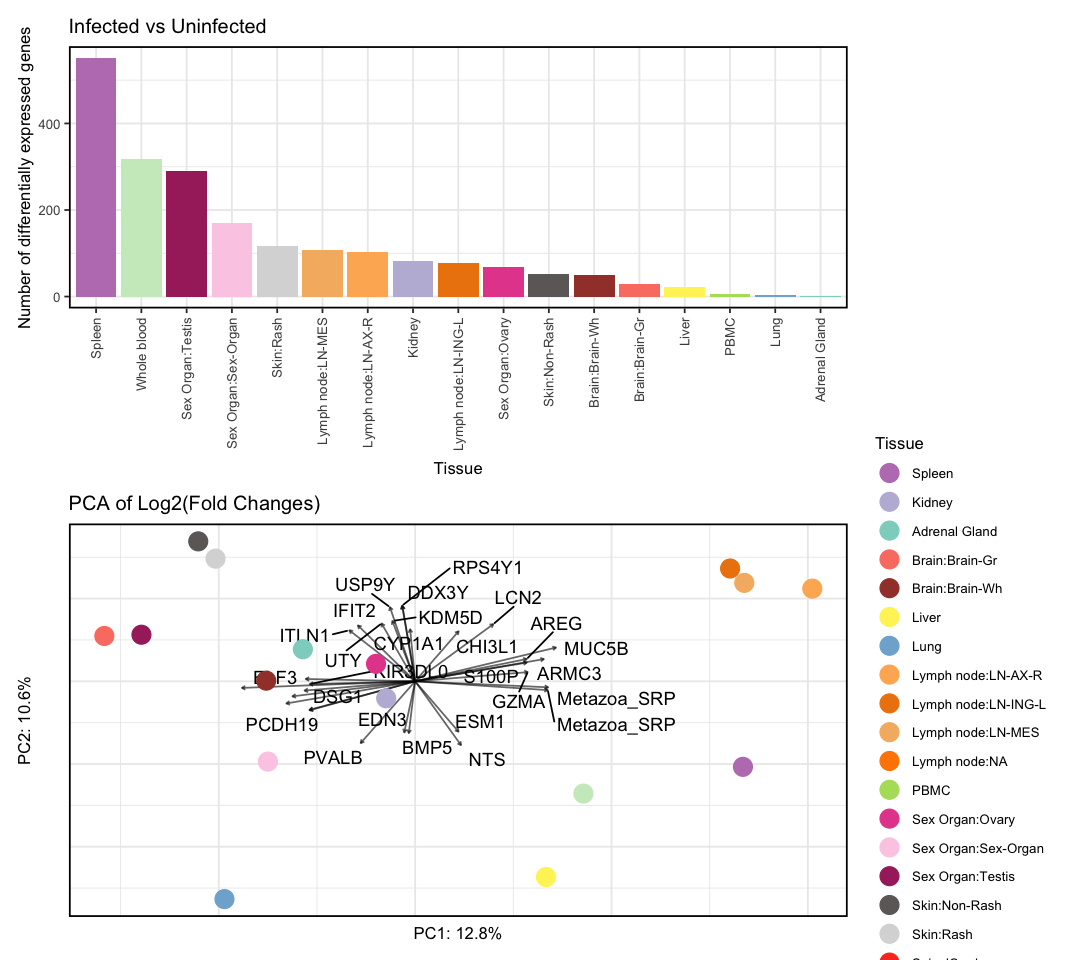

In [224]:
options(repr.plot.width = 9, repr.plot.height = 8)

barp/pca+ plot_layout(heights = c(2,3))
#ggsave("../Barplot_PCA.pdf",width=9,height=8)


In [225]:
tmp2 <- tmp2[tmp2$Gene != "",]

# Convert ens ids to gene names, if they can be converted. Keep as is otherwise
new.names <- sapply(tmp2$Gene, function(x) { 
    new.name <- gene_map[match(x, gene_map$Geneid),'external_gene_name']
    ifelse(new.name == "", x,new.name)
})
new.names
tmp2$Gene<-NULL
tmp2<-as.matrix(tmp2)
rownames(tmp2) <- make.names(new.names,unique = T)


new.names <- sapply(sign$Gene, function(x) { 
    new.name <- gene_map[match(x, gene_map$Geneid),'external_gene_name']
    ifelse(new.name == "", x,new.name)
})
sign$Gene<-NULL
sign<-as.matrix(sign)
rownames(sign) <- make.names(new.names,unique = T)
sign[is.na(sign)] <-1
sign<-ifelse(sign >0.05,0,1)
head(sign)

ENSMMUG00000000115.4   ENSMMUG00000000265.4   ENSMMUG00000000288.4 
               "LACRT"              "ADAMTS9"                 "CCL2" 
  ENSMMUG00000000912.4   ENSMMUG00000001119.3   ENSMMUG00000001442.4 
                "CD86"                "UTS2R"                 "H1-5" 
  ENSMMUG00000001649.4   ENSMMUG00000001655.4   ENSMMUG00000001880.4 
               "RUNX1"                  "IL7"                "DDX60" 
  ENSMMUG00000001929.4   ENSMMUG00000002037.4   ENSMMUG00000002191.4 
                "ELF3"                 "MMP1"                 "OLR1" 
  ENSMMUG00000002192.4   ENSMMUG00000002201.4   ENSMMUG00000002305.4 
              "CLEC7A"               "ABCC12"                 "KRT2" 
  ENSMMUG00000002467.4   ENSMMUG00000002678.4   ENSMMUG00000002750.4 
               "CCL23"                "ITGB6"                "VSIG4" 
  ENSMMUG00000003061.4   ENSMMUG00000003143.4   ENSMMUG00000003193.4 
              "CCDC80"                "THBS4"                  "VIM" 
  ENSMMUG00000003273.4   ENSMMUG00000003283.4   ENSMMUG00000003402.4 
                "BCAM"                "ELFN1"                "MATN4" 
  ENSMMUG00000003533.4   ENSMMUG00000003674.4   ENSMMUG00000003902.4 
               "FOXJ1"                "TREM1"                "THBS3" 
  ENSMMUG00000004074.4   ENSMMUG00000004180.4   ENSMMUG00000004224.4 
                "BMP7"                "GPR17"               "PARP12" 
  ENSMMUG00000004442.4   ENSMMUG00000004475.4   ENSMMUG00000004954.4 
               "WFDC1"                 "MMP2"                "AIFM1" 
  ENSMMUG00000005001.4   ENSMMUG00000005232.4   ENSMMUG00000005442.4 
               "IFIT3"              "RARRES2"                 "NT5E" 
  ENSMMUG00000005613.4   ENSMMUG00000005631.4   ENSMMUG00000005749.4 
               "STAT1"                 "CCN3"               "PARP16" 
  ENSMMUG00000006068.4   ENSMMUG00000006550.4   ENSMMUG00000006662.4 
             "TMEM100"              "ZC3HAV1"                  "MME" 
  ENSMMUG00000007080.4   ENSMMUG00000007669.4   ENSMMUG00000007777.4 
               "HTR3A"                "ISG20"                "CIITA" 
  ENSMMUG00000007798.4   ENSMMUG00000008040.4   ENSMMUG00000008197.4 
                "CLMP"             "TNFSF13B"                "NTNG1" 
  ENSMMUG00000008252.4   ENSMMUG00000008519.4   ENSMMUG00000008624.4 
               "IL21R"               "SPAG17"                "FOXP3" 
  ENSMMUG00000008711.4   ENSMMUG00000008778.4   ENSMMUG00000008941.4 
              "CHI3L1"                "PVALB"                "TOP2A" 
  ENSMMUG00000009659.4   ENSMMUG00000009782.4   ENSMMUG00000009785.4 
                "CILP"                 "CCL7"                "CCL13" 
  ENSMMUG00000009926.4   ENSMMUG00000010007.4   ENSMMUG00000010033.4 
            "SERPINE1"                 "CD14"                "GADL1" 
  ENSMMUG00000010316.4   ENSMMUG00000010440.4   ENSMMUG00000010682.4 
               "HERC5"                "ADCY8"                 "FBN2" 
  ENSMMUG00000010747.4   ENSMMUG00000010866.4   ENSMMUG00000010927.4 
               "MFAP5"                "IFNL1"              "TNFAIP6" 
  ENSMMUG00000010956.3   ENSMMUG00000011146.4   ENSMMUG00000011304.4 
               "SOCS1"              "TP53BP2"                "PSMB9" 
  ENSMMUG00000011426.4   ENSMMUG00000011444.4   ENSMMUG00000011454.4 
               "TIMP1"               "COL2A1"                 "IFI6" 
  ENSMMUG00000011514.4   ENSMMUG00000011858.4   ENSMMUG00000012000.4 
                "COCH"                 "BMP5"                "ANXA2" 
  ENSMMUG00000012033.4   ENSMMUG00000012141.4   ENSMMUG00000012307.4 
                "PAK2"              "CYP26B1"                "POSTN" 
  ENSMMUG00000012321.4   ENSMMUG00000012330.4   ENSMMUG00000012432.4 
                 "FN1"             "ADAMTS14"               "LRRC17" 
  ENSMMUG00000012667.4   ENSMMUG00000013014.4   ENSMMUG00000013665.4 
               "ANXA1"                "IL1RN"                "MMP14" 
  ENSMMUG00000013706.4   ENSMMUG00000014122.4   ENSMMUG00000014299.4 
            

Adrenal Gland Brain:Brain-Gr Brain:Brain-Wh Kidney Liver Lung
LACRT   0             0              0              0      0     0   
ADAMTS9 0             0              0              0      0     0   
CCL2    0             0              0              0      0     0   
CD86    0             0              1              1      0     0   
UTS2R   0             0              0              0      0     0   
H1.5    0             1              1              0      0     0   
        Lymph node:LN-AX-R Lymph node:LN-ING-L Lymph node:LN-MES
LACRT   1                  1                   0                
ADAMTS9 1                  1                   1                
CCL2    1                  0                   1                
CD86    1                  1                   0                
UTS2R   0                  0                   0                
H1.5    0                  0                   0                
        Sex Organ:Ovary Sex Organ:Sex-Organ Sex Organ:Testis Skin:Non-Rash
LACRT   0               0                   0                0            
ADAMTS9 0               0                   1                0            
CCL2    1               1                   1                0            
CD86    1               0                   0                0            
UTS2R   0               0                   0                1            
H1.5    0               0                   0                0            
        Skin:Rash Spleen Whole blood
LACRT   0         0      0          
ADAMTS9 1         1      1          
CCL2    0         1      0          
CD86    0         1      1          
UTS2R   1         0      0          
H1.5    1         0      1

In [196]:
sign[rownames(sign) =="CILP",]

Adrenal Gland      Brain:Brain-Gr      Brain:Brain-Wh              Kidney 
                  0                   0                   0                   0 
              Liver                Lung  Lymph node:LN-AX-R Lymph node:LN-ING-L 
                  0                   0                   1                   1 
  Lymph node:LN-MES     Sex Organ:Ovary Sex Organ:Sex-Organ    Sex Organ:Testis 
                  1                   1                   0                   0 
      Skin:Non-Rash           Skin:Rash              Spleen         Whole blood 
                  0                   1                   1                   0

In [175]:
types.genes[match("IFI16", types.genes$Gene),'type']


[1] "isg"

In [37]:
library(ComplexHeatmap)



Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




GeneClass    
LACRT   extracellular
ADAMTS9 extracellular
CCL2    isg          
CD86    isg          
UTS2R   Other        
H1.5    Other

ERROR: Error in ph1$tree_row: $ operator not defined for this S4 class


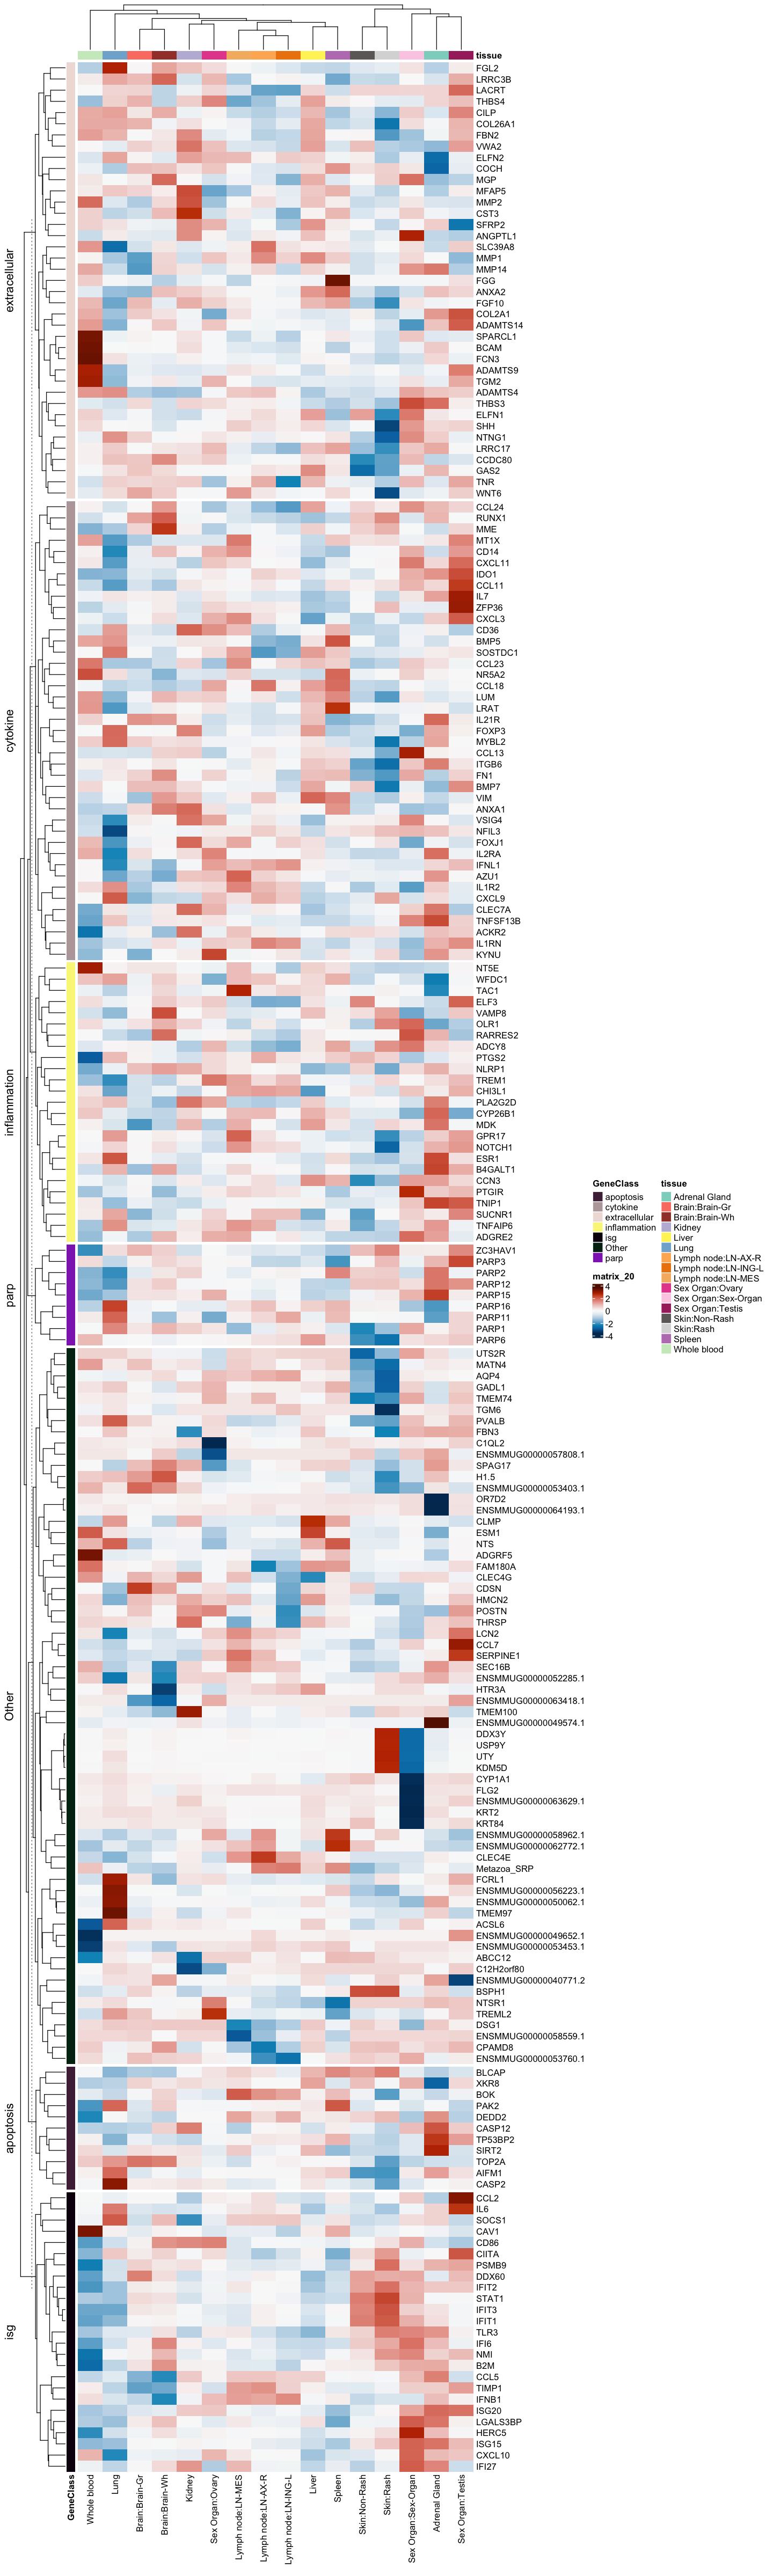

In [233]:
colanno<-data.frame(tissue=colnames(tmp2),row.names = colnames(tmp2))
color<-list(tissue=color_ft)
tmp3<-as.matrix(tmp2)
tmp3[is.na(tmp3)] <- 0

new.names <- sapply(rownames(tmp3), function(x) { 
    new.name <- types.genes[match(x, types.genes$Gene),'type']
    ifelse(is.na(new.name),"Other",new.name)
})
annotation_row = data.frame(
    GeneClass = new.names
)
rownames(annotation_row) = rownames(tmp3)
head(annotation_row)

#pheatmap(tmp3,show_rownames = TRUE, scale="row",  color = colorRampPalette(c("navy","white", "firebrick3"))(100), fontsize_row=6)
ph1<-pheatmap(tmp3,show_rownames = TRUE, scale="row",  
         color = hcl.colors(100, palette = "RdBu",rev = T), fontsize_row=10,cluster_cols=T,
                       annotation_colors=color,annotation_col=colanno,
                        row_split = annotation_row$GeneClass, annotation_row = annotation_row)
options(repr.plot.width=12,repr.plot.height=40)
ph1
pheatmap(sign,show_rownames = TRUE,  color = c("white", "black"),
         breaks = c(0, 1) , fontsize_row=10,cluster_rows = ph1$tree_row,cluster_cols=ph1$tree_col,
         legend = FALSE,annotation_colors=color,annotation_col=colanno)

m3 = make_comb_mat(t(sign[1:31,]))
t(m3)
UpSet((m3),lwd=0.3,pt_size = unit(5, "mm"),top_annotation = NULL)





Adrenal Gland      Brain:Brain-Gr      Brain:Brain-Wh              Kidney 
        -2.00325247          0.50238020          1.29993085          0.56208237 
              Liver                Lung  Lymph node:LN-AX-R Lymph node:LN-ING-L 
         1.16710489          3.85967308          0.06331495         -0.07063134 
  Lymph node:LN-MES     Sex Organ:Ovary Sex Organ:Sex-Organ    Sex Organ:Testis 
         0.72217959          0.00000000        -18.55193277          0.11455393 
      Skin:Non-Rash           Skin:Rash              Spleen         Whole blood 
         0.66918090         20.38236897          0.17261467          0.40165321

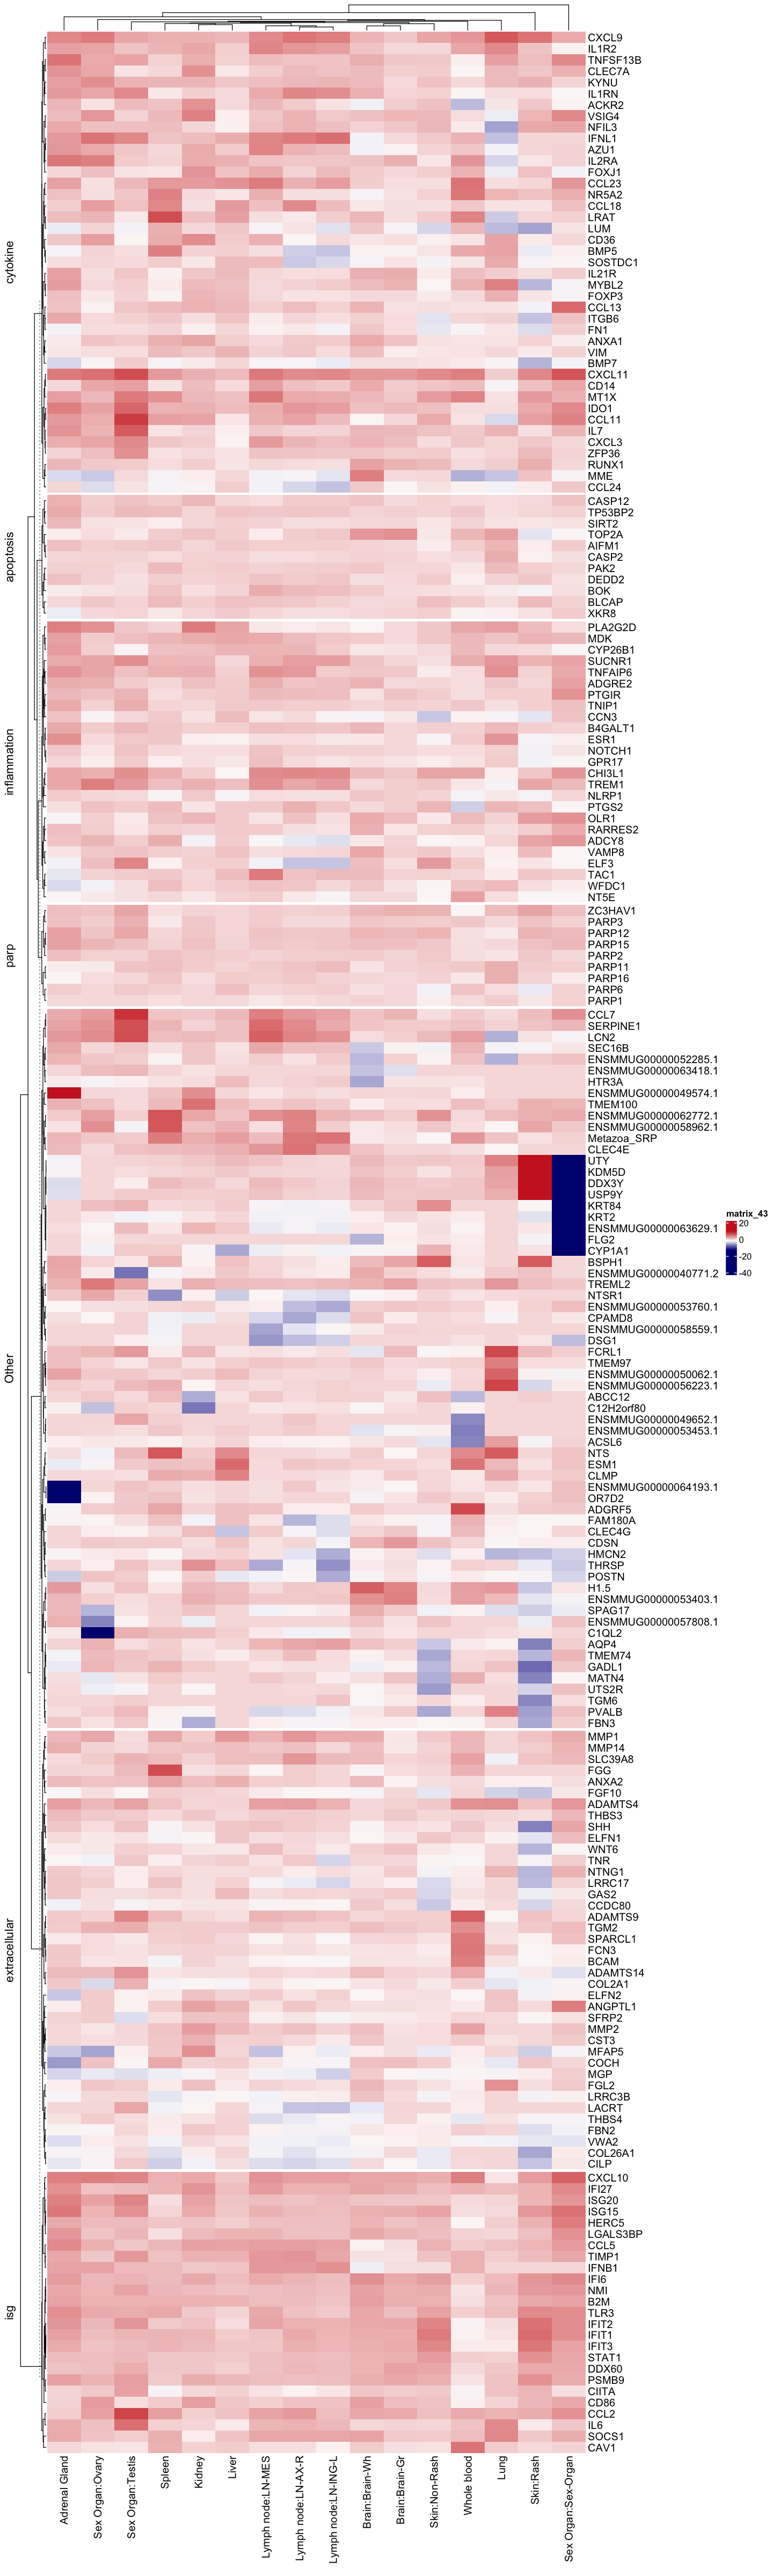

In [262]:
options(repr.plot.width=12,repr.plot.height=40)

tmp3[rownames(tmp3) =="UTY",]
Heatmap((((tmp3))),col=colorRampPalette(c("navy","navy","white", "firebrick3","firebrick3"))(50),
                        row_split = annotation_row$GeneClass, clustering_distance_rows = "pearson")

Warning message:
“You defined `cell_fun` for a heatmap with more than 100 rows or
columns, which might be very slow to draw. Consider to use the
vectorized version `layer_fun`.”


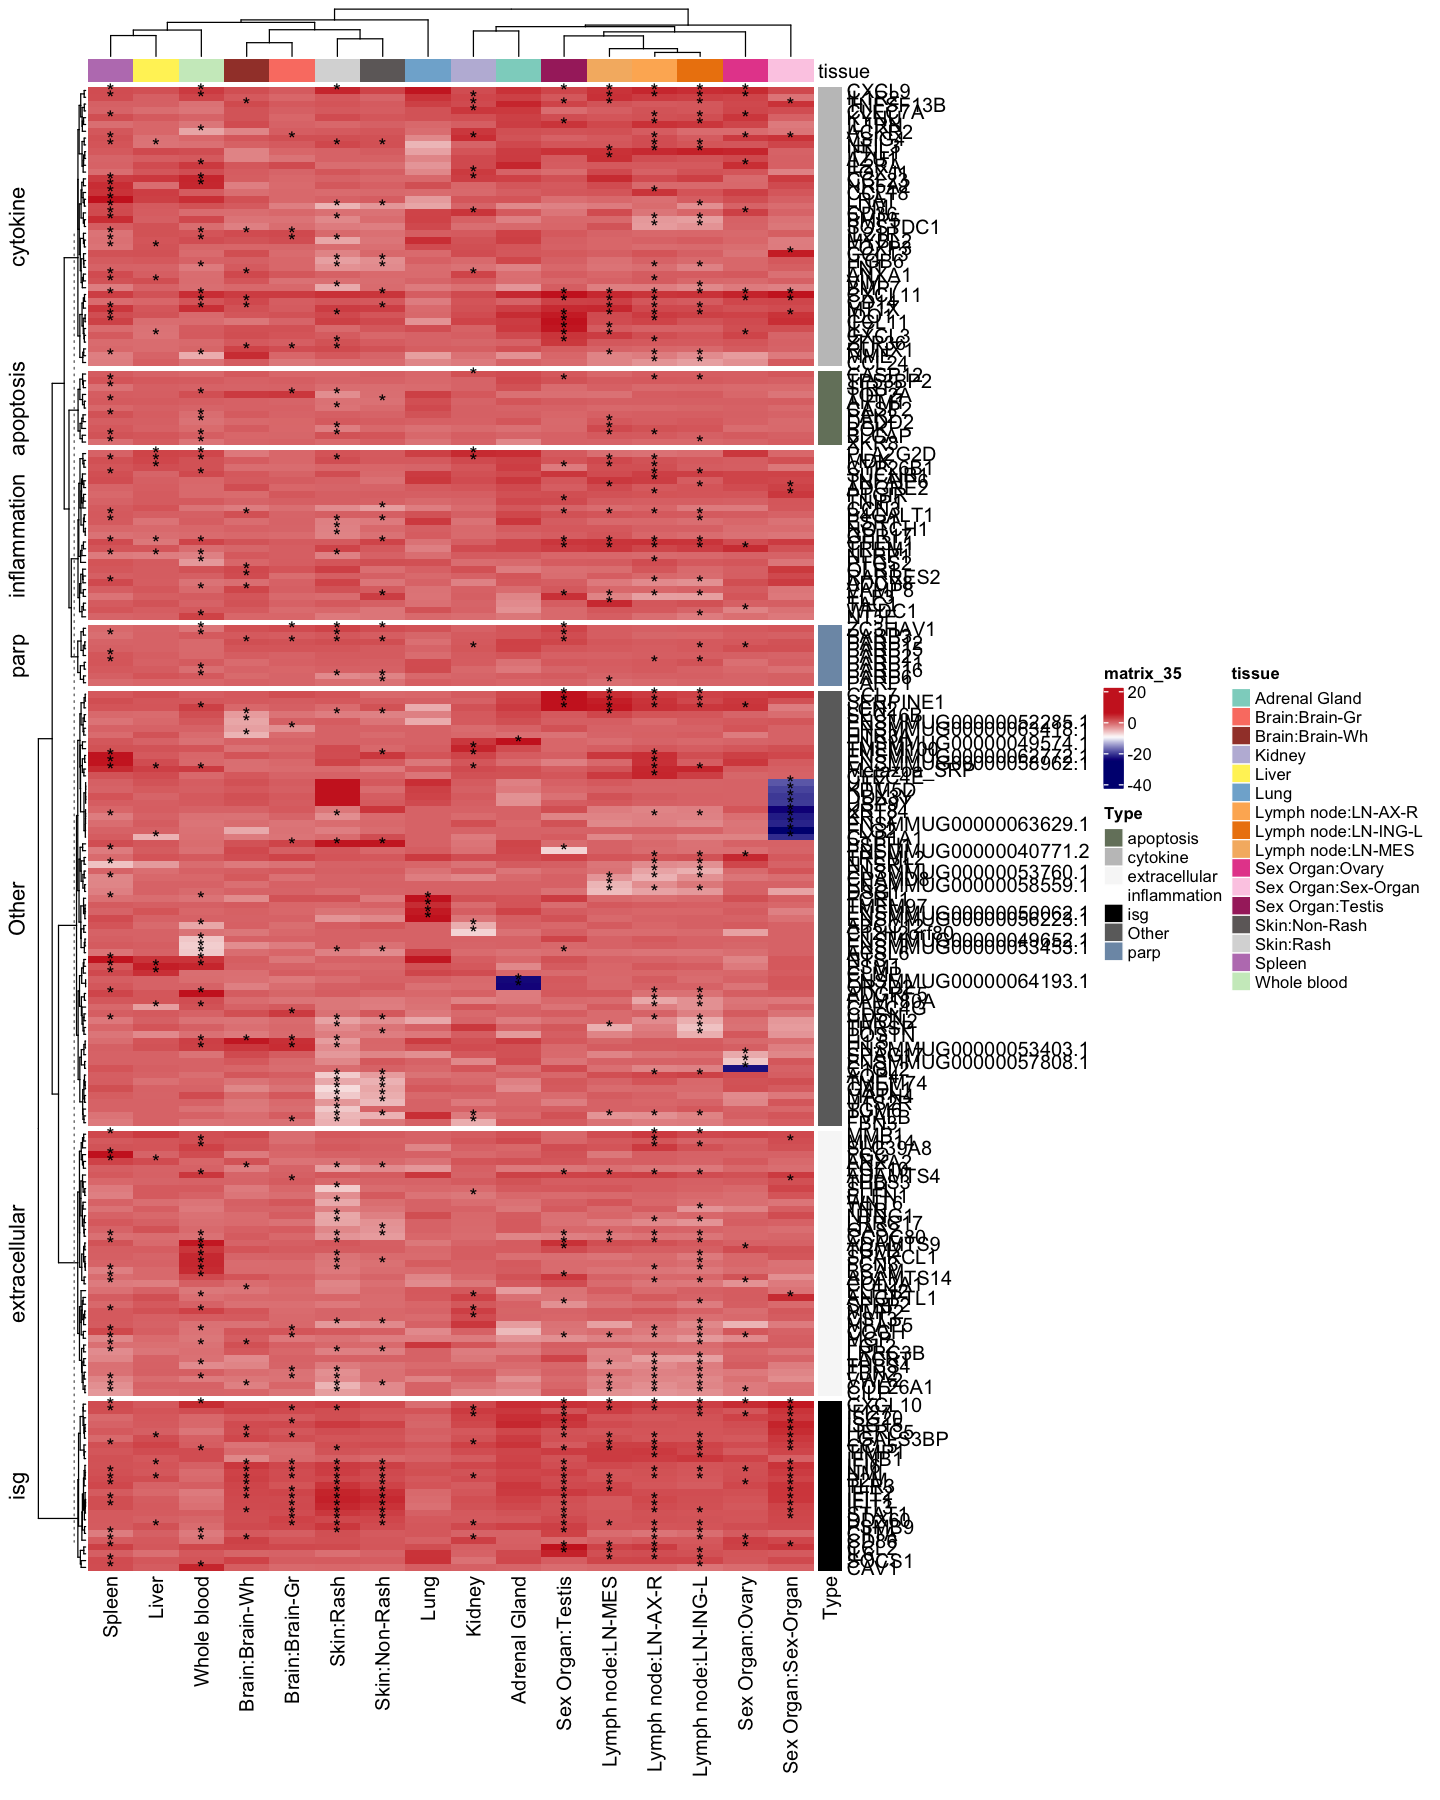

pdf 
  2

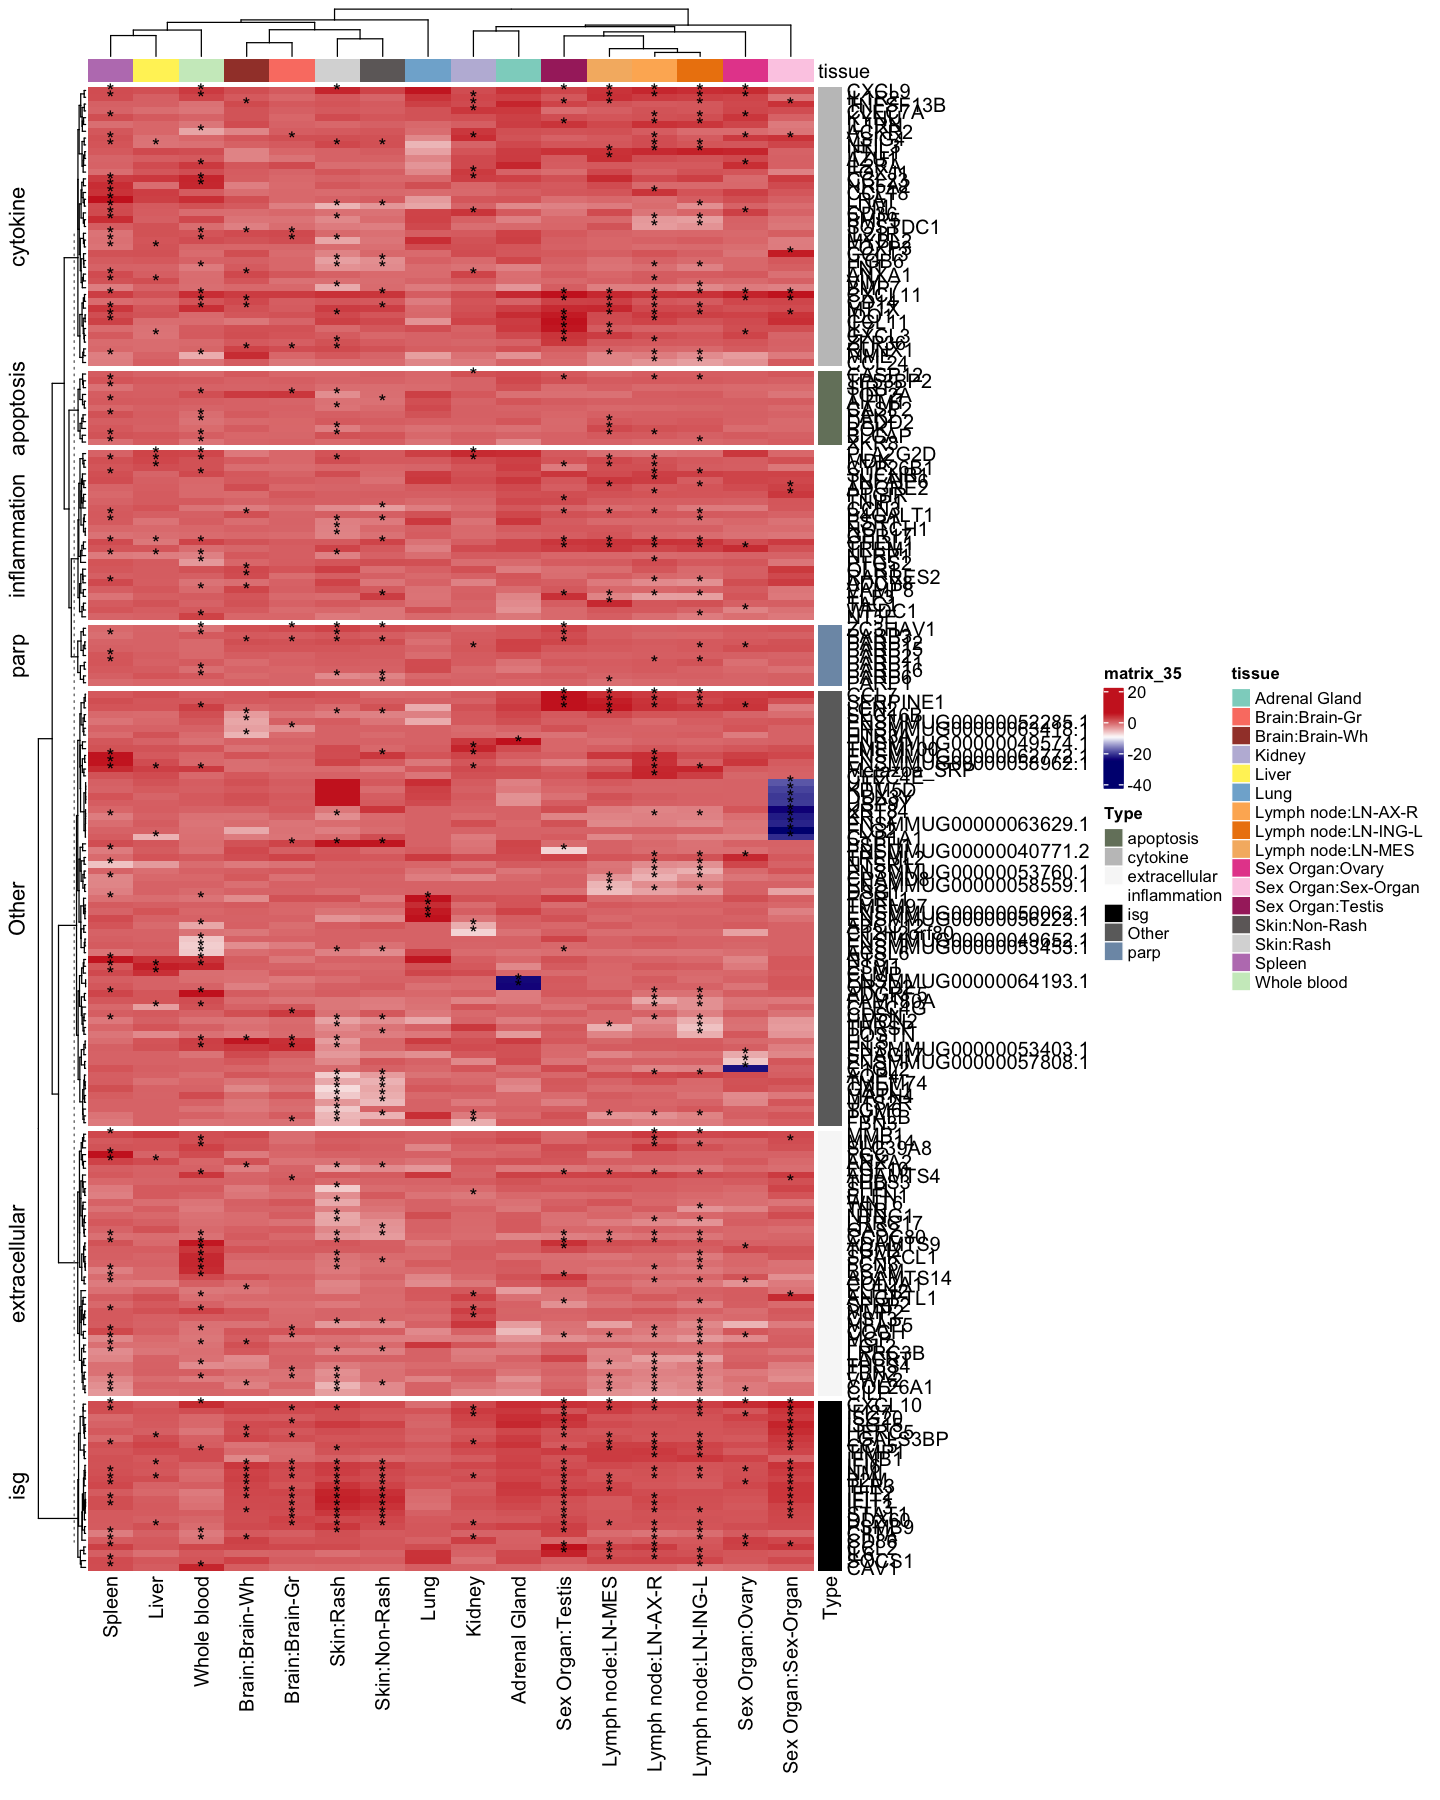

In [254]:
col_annot=c("#f7f7f7","black","#6c6c6c","#c3c3c3","white","#7e99b4","#75816b")
names(col_annot)=unique(annotation_row$GeneClass)

ha = HeatmapAnnotation( 
    df = colanno,col=color
)
options(repr.plot.width=12,repr.plot.height=15)

ht=Heatmap((((tmp3))),col=colorRampPalette(c("navy", "white", "firebrick3","firebrick3"))(50),
                        row_split = annotation_row$GeneClass, clustering_distance_rows = "pearson",
        clustering_distance_columns = "pearson",
              cell_fun = function(j, i, x, y, w, h, fill) {
    if(sign[i, j] == 1) {grid.text("*", x, y)} },top_annotation=ha,
        right_annotation = rowAnnotation(Type=annotation_row$GeneClass,
                                         col=list(Type=col_annot))
       )
ht
draw(ht)
library(GetoptLong)
library(ComplexHeatmap)

pdf(qq("../heatmap_FC_5VsLate.pdf"), width = 13, height = 18)
draw(ht)
dev.off()



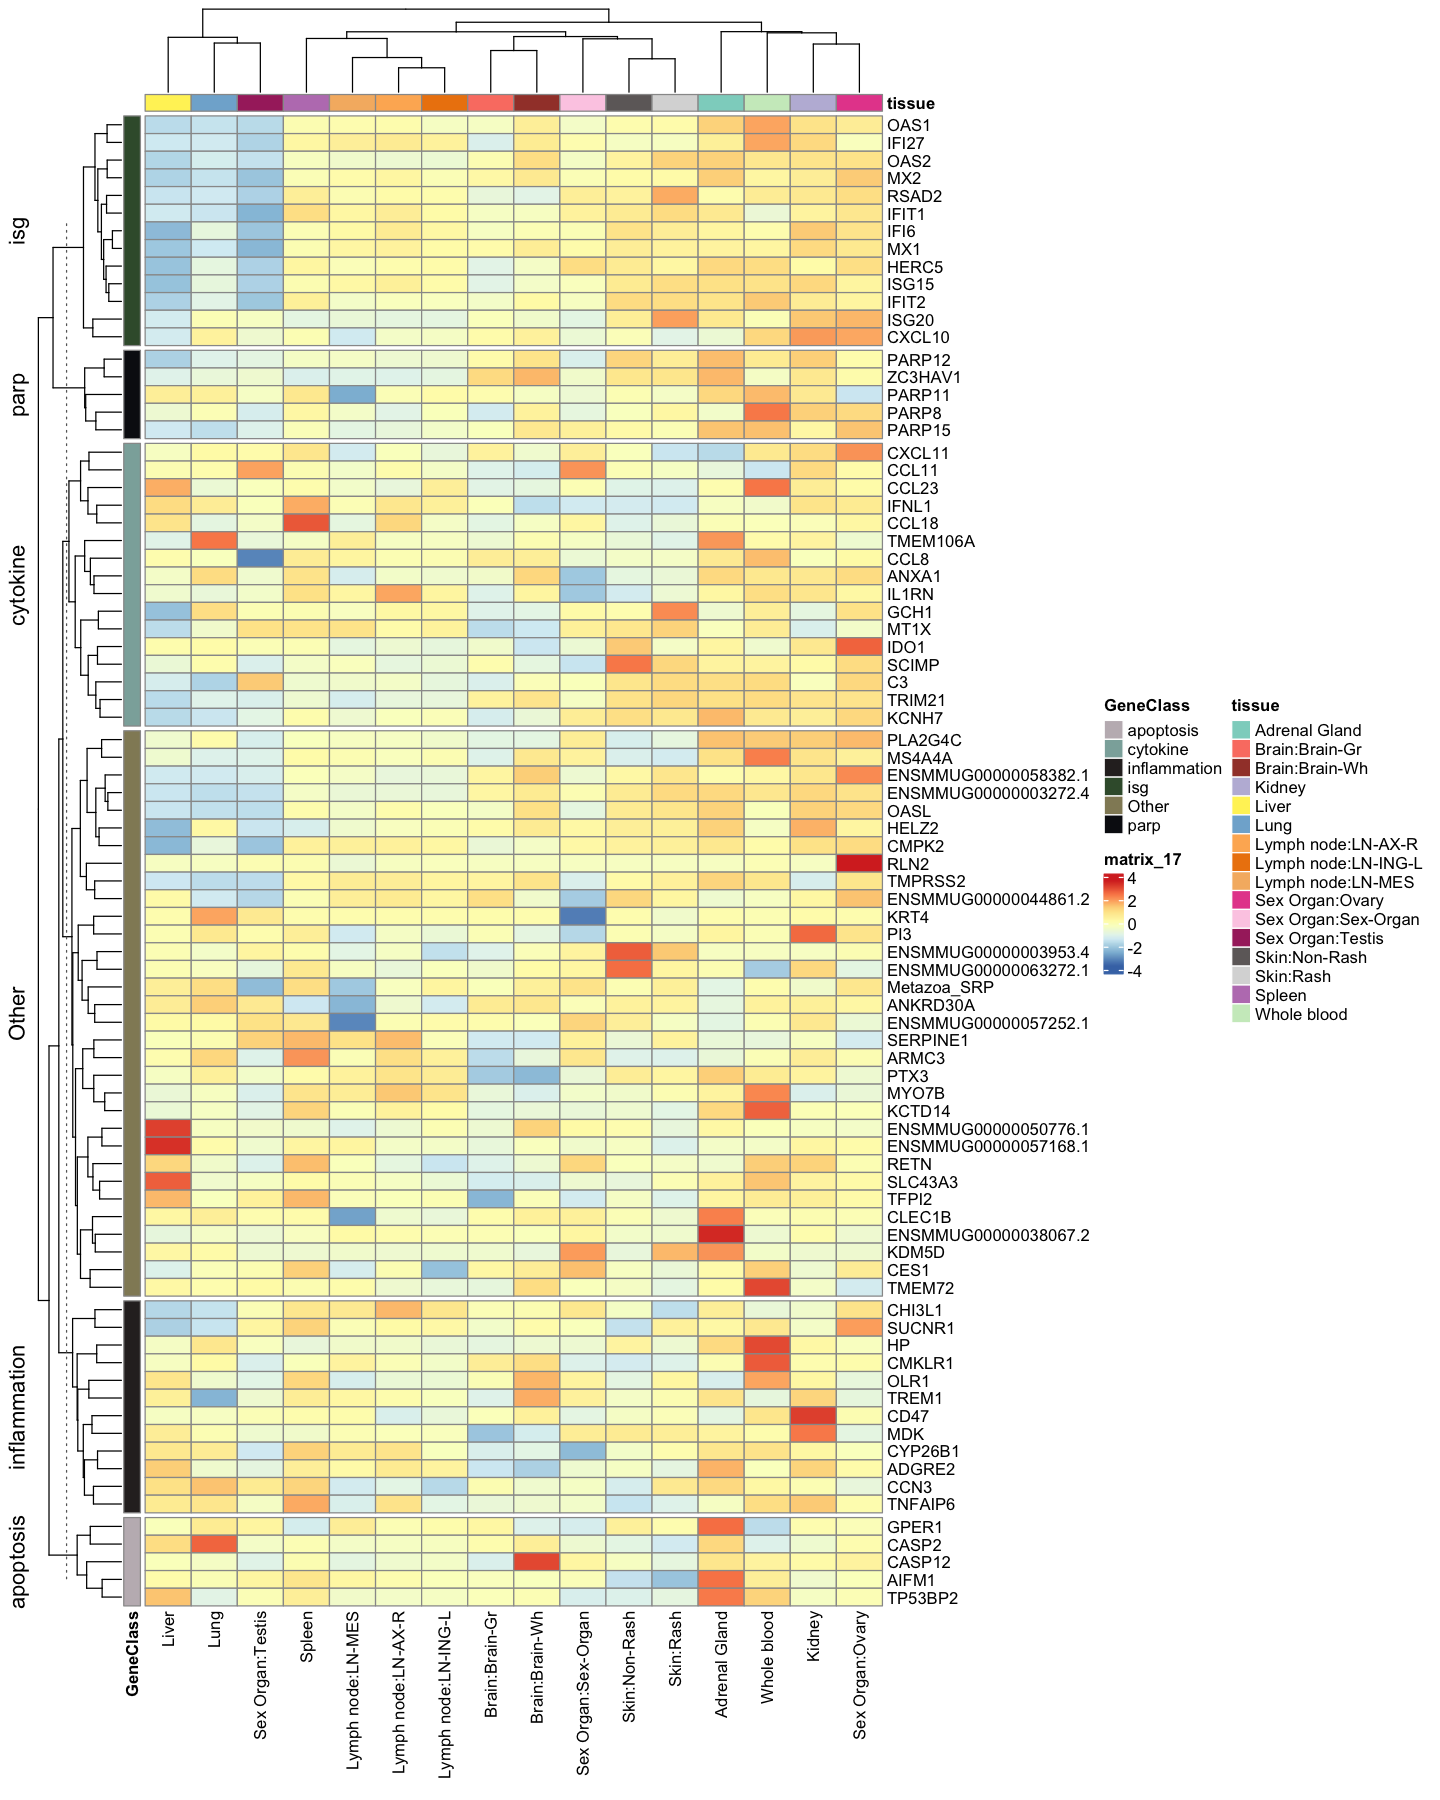

In [179]:
ShalekCS<-colorRampPalette(c("#A020F0", "#9C1FEB", "#991EE6", "#961EE1", "#931DDC", "#8F1CD7", "#8C1CD2", "#891BCE",
                   "#861AC9", "#821AC4", "#7F19BF", "#7C18BA", "#7918B5", "#7517B0", "#7216AC", "#6F16A7",
                   "#6C15A2", "#69159D", "#651498", "#621393", "#5F138F", "#5C128A", "#581185", "#551180",
                   "#52107B", "#4F0F76", "#4B0F71", "#480E6D", "#450D68", "#420D63", "#3F0C5E", "#3B0B59",
                   "#380B54", "#350A4F", "#320A4B", "#2E0946", "#2B0841", "#28083C", "#250737", "#210632",
                   "#1E062E", "#1B0529", "#180424", "#15041F", "#11031A", "#0E0215", "#0B0210", "#08010C",
                   "#040007", "#010002", "#020200", "#070700", "#0C0C00", "#121200", "#171700", "#1C1C00",
                   "#212100", "#262600", "#2B2B00", "#303000", "#363600", "#3B3B00", "#404000", "#454500",
                   "#4A4A00", "#4F4F00", "#555500", "#5A5A00", "#5F5F00","#646400", "#696900", "#6E6E00",
                   "#737300", "#797900", "#7E7E00", "#838300", "#888800", "#8D8D00", "#929200", "#979700",
                   "#9D9D00", "#A2A200", "#A7A700", "#ACAC00", "#B1B100", "#B6B600", "#BCBC00", "#C1C100",
                   "#C6C600", "#CBCB00", "#D0D000", "#D5D500", "#DADA00", "#E0E000", "#E5E500", "#EAEA00",
                   "#EFEF00", "#F4F400", "#F9F900", "#FFFF00"))(1)


material.heat = function(n){
    colorRampPalette(
        rev(c("#D73027", "#FC8D59", "#FEE090", "#FFFFBF", "#E0F3F8", "#91BFDB", "#4575B4")))(n)
}

pheatmap(tmp3,show_rownames = TRUE, scale="row",  
         color = material.heat(20), fontsize_row=10,cluster_cols=T,
                       annotation_colors=color,annotation_col=colanno,
                        row_split = annotation_row$GeneClass, annotation_row = annotation_row)



In [180]:
table(de.genes.Impulse$tissue)


      Adrenal Gland      Brain:Brain-Gr      Brain:Brain-Wh              Kidney 
              35395               35395               35395               35395 
              Liver                Lung  Lymph node:LN-AX-R Lymph node:LN-ING-L 
              35395               35395               35395               35395 
  Lymph node:LN-MES                PBMC     Sex Organ:Ovary Sex Organ:Sex-Organ 
              35395               35395               35395               35395 
   Sex Organ:Testis       Skin:Non-Rash           Skin:Rash              Spleen 
              35395               35395               35395               35395 
        Whole blood 
              35395 

[1] Spleen              Lymph node:LN-AX-R  Lymph node:LN-ING-L
[4] Lymph node:LN-MES  
19 Levels: Adrenal Gland Brain:Brain-Gr Brain:Brain-Wh Kidney Liver ... Whole blood

Spleen  Lymph node:LN-AX-R Lymph node:LN-ING-L   Lymph node:LN-MES 
          "#BC80BD"           "#FDB462"           "#ed830c"           "#f5b771"

6         4         7         3         8         5         0 
"#EFF3FF" "#C6DBEF" "#9ECAE1" "#6BAED6" "#4292C6" "#2171B5" "#084594"

[1] "6" "4" "7" "3" "8" "5" "0"

[1] "A0246_S135_L002" "A0260_S132_L002" "A0274_S129_L002" "A0247_S134_L002"
[5] "A0261_S131_L002" "A0275_S128_L002"

A0246_S135_L002 A0260_S132_L002 A0274_S129_L002 A0247_S134_L002
PARP14 2.598918        2.731281        2.636616        2.658200       
PARP9  1.928412        2.072579        1.842760        1.956250       
HERC6  2.311036        2.315389        2.087360        2.244944       
HERC5  1.696556        1.811086        1.405860        1.678889       
DDX60  1.982314        2.008332        1.638144        1.964309       
MX1    1.973407        2.095535        2.018184        2.107253       
       A0261_S131_L002 A0275_S128_L002 A0248_S133_L002 A0262_S130_L002
PARP14 2.489467        2.720694        2.203129        2.715314       
PARP9  1.694259        2.063077        2.028396        2.081271       
HERC6  2.078995        2.316677        1.559336        2.298464       
HERC5  1.414380        1.709033        1.559336        1.879659       
DDX60  1.737195        2.077799        2.152317        2.123463       
MX1    2.045861        2.322209        0.000000        2.420428       
       A0276_S127_L002 A0239_S23_L001 ⋯ A0043_S118_L002 A0141_S111_L002
PARP14 2.555750        2.471774       ⋯ 3.096693        3.113859       
PARP9  1.885201        1.797217       ⋯ 2.777409        2.579722       
HERC6  2.183393        2.154406       ⋯ 2.840331        2.978650       
HERC5  1.206810        1.402761       ⋯ 2.809457        2.915136       
DDX60  1.570993        1.750696       ⋯ 2.721721        2.821955       
MX1    1.819970        2.185940       ⋯ 3.532999        3.616527       
       A0078_S173_L002 A0204_S146_L002 A0079_S172_L002 A0205_S145_L002
PARP14 3.078255        3.273493        2.949785        3.226679       
PARP9  2.399786        2.374797        2.322266        2.434684       
HERC6  2.798122        2.749236        2.720581        2.863446       
HERC5  2.370117        2.438747        2.155687        2.749592       
DDX60  2.334121        2.571711        2.086772        2.741435       
MX1    3.368254        3.427572        3.306593        3.340837       
       A0080_S171_L002 A0206_S144_L002 A0071_S116_L002 A0197_S107_L002
PARP14 3.046967        3.116193        3.208326        3.113426       
PARP9  2.410033        2.373251        2.616201        2.701168       
HERC6  2.828279        2.541484        3.037839        2.707404       
HERC5  2.513667        2.416075        2.893381        2.786443       
DDX60  2.563162        2.699058        2.767544        2.897434       
MX1    3.261504        3.374139        3.465594        3.457101

[1] "6" "4" "7" "3" "8" "5" "0"

0         3         4         5         6         7         8 
"#EFF3FF" "#C6DBEF" "#9ECAE1" "#6BAED6" "#4292C6" "#2171B5" "#084594"

$full.tissue
             Spleen              Kidney       Adrenal Gland      Brain:Brain-Gr 
          "#BC80BD"           "#BEBADA"           "#8DD3C7"           "#FB8072" 
     Brain:Brain-Wh               Liver                Lung  Lymph node:LN-AX-R 
          "#a34136"           "#fff265"           "#80B1D3"           "#FDB462" 
Lymph node:LN-ING-L   Lymph node:LN-MES       Lymph node:NA                PBMC 
          "#ed830c"           "#f5b771"           "#ff8700"           "#B3DE69" 
    Sex Organ:Ovary Sex Organ:Sex-Organ    Sex Organ:Testis       Skin:Non-Rash 
          "#e64e9b"           "#FCCDE5"           "#a82d6c"           "#6e6969" 
          Skin:Rash          SpinalCord         Whole blood 
          "#D9D9D9"           "#f93d28"           "#CCEBC5" 

$dpi_time
        0         3         4         5         6         7         8 
"#EFF3FF" "#C6DBEF" "#9ECAE1" "#6BAED6" "#4292C6" "#2171B5" "#084594"

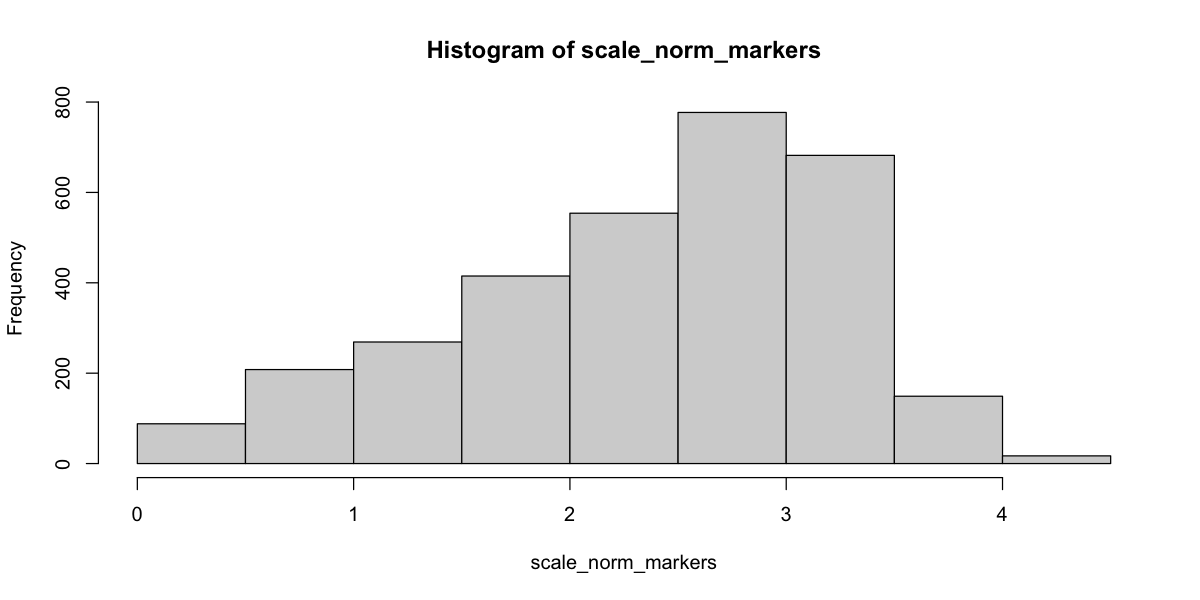

In [193]:
time.markers<-de.genes.Impulse %>% filter(tissue %in% c("Lymph node:LN-AX-R", "Lymph node:LN-ING-L","Lymph node:LN-MES","Spleen"))
time.markers <- time.markers %>% group_by(tissue) %>% top_n(12, -padj)
time.markers2<-unique(time.markers$Gene)
dds.qc.experimental<-dds.qc.experimental.alltp
dds.qc.experimental<-dds.qc.experimental[,dds.qc.experimental$full.tissue %in% c("Lymph node:LN-AX-R", "Lymph node:LN-ING-L","Lymph node:LN-MES","Spleen")] 

norm_counts <- counts(dds.qc.experimental, normalized=TRUE)
norm_counts <- log10(norm_counts[time.markers2,]+1)
scale_norm_markers <- norm_counts
#scale_norm_markers <- scale(norm_counts[time.markers2,],center = T,scale=T)

hist(scale_norm_markers)

#threshold <- 5
#scale_norm_markers[scale_norm_markers>threshold] <- threshold
#scale_norm_markers[scale_norm_markers< (-1*threshold)] <- -1*threshold
rownames(scale_norm_markers) <- rowData(dds.qc.experimental.alltp)[rownames(scale_norm_markers),]$external_gene_name
#scale_norm_markers <- scale_norm_markers[rownames(scale_norm_markers) != '',]
scale_norm_markers<-scale_norm_markers[rownames(scale_norm_markers)[!is.na(rownames(scale_norm_markers)) & rownames(scale_norm_markers) != "" ],]

unique(dds.qc.experimental$full.tissue)
color_ft[unique(time.markers$tissue)]
dpi_time=brewer.pal(n = length(unique(dds.qc.experimental$dpi_time_factor)), name = "Blues")
names(dpi_time)=as.character(unique(dds.qc.experimental$dpi_time_factor))
dpi_time
unique(as.data.frame(colData(dds.qc.experimental))[,c('full.tissue','dpi_time_factor'),drop=FALSE]$dpi_time_factor)
col.order<-rownames(as.data.frame(colData(dds.qc.experimental))[c('full.tissue','dpi_time_factor')] %>% 
                dplyr::arrange(dpi_time_factor,full.tissue))
head(col.order)
head(scale_norm_markers[,col.order])
as.character(unique(dds.qc.experimental$dpi_time))

dpi_time=brewer.pal(n = length(unique(dds.qc.experimental$dpi_time_factor)), name = "Blues")
names(dpi_time)=sort(as.character(unique(dds.qc.experimental$dpi_time)))
dpi_time
mat_colors <- list(full.tissue=color_ft,dpi_time=dpi_time)
mat_colors

options(repr.plot.width=10,repr.plot.height=5)

library(pheatmap)

pheatmap(scale_norm_markers[,col.order],
         clustering_distance_rows='euclidean',scale="row",
         color=colorRampPalette(c("navy", "white","firebrick3"))(100),
         border_color=NA,annotation_col=as.data.frame(colData(dds.qc.experimental[,dds.qc.experimental$dpi_time_factor != '<0']))[,c('full.tissue','dpi_time'),drop=FALSE],
         annotation_colors=mat_colors,
         show_colnames=FALSE,cluster_cols = FALSE,cluster_rows=TRUE,
         filename="../heatmapLN.pdf",width=8,height=6)

pheatmap(scale_norm_markers[,col.order],
         clustering_distance_rows='euclidean',scale="row",
         color=colorRampPalette(c("navy", "white","firebrick3"))(100),
         border_color=NA,annotation_col=as.data.frame(colData(dds.qc.experimental[,dds.qc.experimental$dpi_time_factor != '<0']))[,c('full.tissue','dpi_time'),drop=FALSE],
         annotation_colors=mat_colors,
         show_colnames=FALSE,cluster_cols = FALSE,cluster_rows=TRUE)


[1] Brain:Brain-Gr Brain:Brain-Wh
19 Levels: Adrenal Gland Brain:Brain-Gr Brain:Brain-Wh Kidney Liver ... Whole blood

Brain:Brain-Gr Brain:Brain-Wh 
     "#FB8072"      "#a34136"

6         4         7         3         8         5         0 
"#EFF3FF" "#C6DBEF" "#9ECAE1" "#6BAED6" "#4292C6" "#2171B5" "#084594"

[1] "6" "4" "7" "3" "8" "5" "0"

[1] "A0244_S73_L002"  "A0258_S72_L002"  "A0272_S71_L002"  "A0243_S106_L002"
[5] "A0062_S84_L002"  "A0090_S82_L002"

A0244_S73_L002 A0258_S72_L002 A0272_S71_L002 A0243_S106_L002
IFI6    1.4497965      1.7585483      1.8273969      2.1752598      
HERC6   1.3371692      1.4339844      1.5258153      1.3271354      
DDX60   0.7234638      0.6553304      0.9859888      0.7323774      
TMPRSS2 0.7234638      0.7804200      0.7696669      0.5610868      
MX1     1.9456262      2.0943661      2.0197296      1.9135821      
ZC3HAV1 1.4271710      1.3248112      1.6975713      1.4776805      
        A0062_S84_L002 A0090_S82_L002 A0104_S29_L001 A0103    A0020_S88_L002
IFI6    2.175496       2.1828283      2.263123       2.598061 2.637552      
HERC6   1.975876       2.0142259      1.950565       2.125811 2.420228      
DDX60   1.230434       1.5489615      1.454539       1.610744 1.636135      
TMPRSS2 1.305336       0.9822327      1.485966       1.852977 1.789869      
MX1     2.836688       2.5670776      2.921774       3.187304 3.248574      
ZC3HAV1 1.595481       1.6434107      1.922959       2.135519 1.990252      
        A0034_S87_L002 ⋯ A0188_S77_L002 A0230_S74_L002 A0286_S70_L002
IFI6    2.381370       ⋯ 2.953178       3.268156       3.147845      
HERC6   2.064045       ⋯ 2.631286       2.621161       2.657448      
DDX60   1.550426       ⋯ 2.535700       2.199330       2.116373      
TMPRSS2 1.730463       ⋯ 1.932086       2.329664       2.211763      
MX1     3.072054       ⋯ 3.648804       3.892957       3.769751      
ZC3HAV1 1.996181       ⋯ 2.300227       2.589616       2.424222      
        A0229_S107_L002 A0048_S86_L002 A0146_S80_L002 A0145    A0076_S83_L002
IFI6    3.770993        2.955975       3.204058       3.884215 3.022056      
HERC6   2.695434        2.563833       2.620373       2.657523 2.644462      
DDX60   2.315877        1.962672       2.199778       2.396910 2.292728      
TMPRSS2 2.404993        2.119069       2.008475       2.061053 1.969423      
MX1     4.100639        3.596759       3.757643       4.007375 3.453053      
ZC3HAV1 2.649245        2.280879       2.432717       2.499470 2.307940      
        A0202_S76_L002 A0201_S109_L002
IFI6    3.394680       4.111760       
HERC6   2.534613       2.709477       
DDX60   2.252319       2.325627       
TMPRSS2 2.130084       2.139929       
MX1     3.792103       3.942162       
ZC3HAV1 2.517392       2.591418

[1] "6" "4" "7" "3" "8" "5" "0"

0         3         4         5         6         7         8 
"#EFF3FF" "#C6DBEF" "#9ECAE1" "#6BAED6" "#4292C6" "#2171B5" "#084594"

$full.tissue
             Spleen              Kidney       Adrenal Gland      Brain:Brain-Gr 
          "#BC80BD"           "#BEBADA"           "#8DD3C7"           "#FB8072" 
     Brain:Brain-Wh               Liver                Lung  Lymph node:LN-AX-R 
          "#a34136"           "#fff265"           "#80B1D3"           "#FDB462" 
Lymph node:LN-ING-L   Lymph node:LN-MES       Lymph node:NA                PBMC 
          "#ed830c"           "#f5b771"           "#ff8700"           "#B3DE69" 
    Sex Organ:Ovary Sex Organ:Sex-Organ    Sex Organ:Testis       Skin:Non-Rash 
          "#e64e9b"           "#FCCDE5"           "#a82d6c"           "#6e6969" 
          Skin:Rash          SpinalCord         Whole blood 
          "#D9D9D9"           "#f93d28"           "#CCEBC5" 

$dpi_time
        0         3         4         5         6         7         8 
"#EFF3FF" "#C6DBEF" "#9ECAE1" "#6BAED6" "#4292C6" "#2171B5" "#084594"

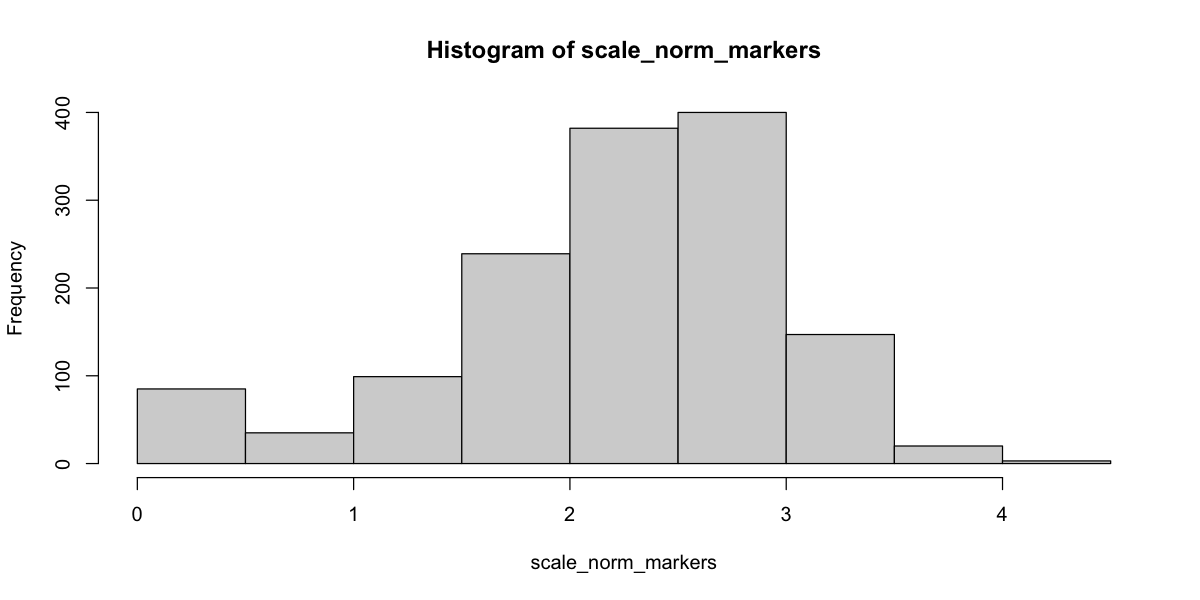

In [194]:
time.markers<-de.genes.Impulse %>% filter(tissue %in% c("Brain:Brain-Gr","Brain:Brain-Wh"))
time.markers <- time.markers %>% group_by(tissue) %>% top_n(27, -padj)
time.markers2<-unique(time.markers$Gene)
dds.qc.experimental<-dds.qc.experimental.alltp
dds.qc.experimental<-dds.qc.experimental[,dds.qc.experimental$full.tissue %in% c("Brain:Brain-Gr","Brain:Brain-Wh")] 

norm_counts <- counts(dds.qc.experimental, normalized=TRUE)
norm_counts <- log10(norm_counts[time.markers2,]+1)
scale_norm_markers <- norm_counts
#scale_norm_markers <- scale(norm_counts[time.markers2,],center = T,scale=T)

hist(scale_norm_markers)

#threshold <- 5
#scale_norm_markers[scale_norm_markers>threshold] <- threshold
#scale_norm_markers[scale_norm_markers< (-1*threshold)] <- -1*threshold
rownames(scale_norm_markers) <- rowData(dds.qc.experimental.alltp)[rownames(scale_norm_markers),]$external_gene_name
#scale_norm_markers <- scale_norm_markers[rownames(scale_norm_markers) != '',]
scale_norm_markers<-scale_norm_markers[rownames(scale_norm_markers)[!is.na(rownames(scale_norm_markers)) & rownames(scale_norm_markers) != "" ],]

unique(dds.qc.experimental$full.tissue)
color_ft[unique(time.markers$tissue)]
dpi_time=brewer.pal(n = length(unique(dds.qc.experimental$dpi_time_factor)), name = "Blues")
names(dpi_time)=as.character(unique(dds.qc.experimental$dpi_time_factor))
dpi_time
unique(as.data.frame(colData(dds.qc.experimental))[,c('full.tissue','dpi_time_factor'),drop=FALSE]$dpi_time_factor)
col.order<-rownames(as.data.frame(colData(dds.qc.experimental))[c('full.tissue','dpi_time_factor')] %>% 
                dplyr::arrange(dpi_time_factor,full.tissue))
head(col.order)
head(scale_norm_markers[,col.order])
as.character(unique(dds.qc.experimental$dpi_time))

dpi_time=brewer.pal(n = length(unique(dds.qc.experimental$dpi_time_factor)), name = "Blues")
names(dpi_time)=sort(as.character(unique(dds.qc.experimental$dpi_time)))
dpi_time
mat_colors <- list(full.tissue=color_ft,dpi_time=dpi_time)
mat_colors

options(repr.plot.width=10,repr.plot.height=5)

library(pheatmap)

pheatmap(scale_norm_markers[,col.order],
         clustering_distance_rows='euclidean',scale="row",
         color=colorRampPalette(c("navy", "white","firebrick3"))(100),
         border_color=NA,annotation_col=as.data.frame(colData(dds.qc.experimental[,dds.qc.experimental$dpi_time_factor != '<0']))[,c('full.tissue','dpi_time'),drop=FALSE],
         annotation_colors=mat_colors,
         show_colnames=FALSE,cluster_cols = FALSE,cluster_rows=TRUE,filename="../heatmapBrain.pdf",width=8,height=6)


In [192]:
genes<-c("CILP", 'LAMA3', 'COL17A1')


genes<-rowData(dd)$Geneid[rowData(dd)$external_gene_name %in% genes]
se.qc.experimental<-dds.qc.experimental.alltp
#ISGs<-se.qc.experimental[select,][rowData(se.qc.experimental[select,])$external_gene_name %in% isg.set.for.scoring.fromSC,]
ISGs<-se.qc.experimental[genes,]

rownames(ISGs)<-rowData(ISGs)$external_gene_name
#rownames(ISGs)[(length(topCor)-2):length(topCor)]<-topCor[(length(topCor)-2):length(topCor)]

norm_counts <- counts(ISGs, normalized=TRUE)
log_norm_counts <- log10(norm_counts+1)
#scale_norm_markers <- scale(norm_counts[viralGenes,],center = T,scale=T,)
dim(log_norm_counts)
logVirCounts<-as.data.frame(t(rbind(test,log_norm_counts)))
logVirCounts[colnames(logVirCounts[-3])] <- sapply(logVirCounts[colnames(logVirCounts[-3])],as.numeric)


logVirCounts$sample<-rownames(logVirCounts)
melt.logVirCounts<-reshape2::melt(logVirCounts,id.vars = c("sample","dpi_time_factor","full.tissue"))


melt.logVirCounts$full.tissue[melt.logVirCounts$full.tissue %in%
                              c("Sex Organ:Ovary","Sex Organ:Sex-Organ","Sex Organ:Testis")]="Sex Organ:Sex-Organ"

mean.log.virus<-melt.logVirCounts %>%
  group_by(full.tissue, dpi_time_factor,variable) %>%
  summarise(mean=(mean(value,na.rm = TRUE)))

dataCluster2<-mean.log.virus %>% filter(!full.tissue %in% c("Lung","PBMC"))%>%
filter(!dpi_time_factor %in% c(4,1,2))  %>%filter(!variable %in% c("viralReadCount","quant.kulesh","EBOV-MidReg","EBOV-3pTrailer"))
dataCluster2$Tissue_Gene<-paste0(dataCluster2$full.tissue,"_",dataCluster2$variable)
#dataCluster%>%filter(variable %in% c("quant.kulesh"))
data_wide2 <- dataCluster2 %>% dplyr::arrange(dpi_time_factor) %>% 
  tidyr::pivot_wider(id_cols = Tissue_Gene, names_from = dpi_time_factor, values_from = mean)
#data_wide
data_cld <- kml::cld(as.data.frame(data_wide2), timeInData = 2:6, maxNA = 4)
kml::kml(data_cld, nbClusters=2:4,nbRedrawing = 5,toPlot = 'none')
#plot(data_cld, 3, parTraj=parTRAJ(col="clusters"), toPlot = "traj")

clusters<-getClusters(data_cld,4,1)
names(clusters)<-data_wide2$Tissue_Gene
data_wide2["Cluster"]<-clusters
data.quant<-melt(data_wide2)
data.quant<-data.quant %>% separate(Tissue_Gene, c("full.tissue", "Gene"),remove = FALSE,sep = "_")
####PLOT MEAN                
ggplot(data.quant,aes(x = variable,y=value,col=full.tissue,linetype=Gene))+theme_cowplot()+
geom_point()+geom_line(aes(group=Tissue_Gene))+ 
facet_wrap(~ Cluster,scales = "free_y")+
scale_color_manual(name="Tissue",values =color_ft[unique(dataCluster$full.tissue)])+
ggtitle("Reads")


melt.logVirCounts$Tissue_Gene<-paste0(melt.logVirCounts$full.tissue,"_",melt.logVirCounts$variable)
melt.logVirCounts.quant<-melt.logVirCounts%>%filter(!variable %in% c("viralReadCount","quant.kulesh","EBOV-MidReg","EBOV-3pTrailer"))%>%
filter(full.tissue %in% unique(data.quant$full.tissue))
melt.logVirCounts.quant["cluster"]<-clusters[melt.logVirCounts.quant$Tissue_Gene]
##PLOT TREND
ggplot(melt.logVirCounts.quant %>% arrange(full.tissue),aes(x = dpi_time_factor,y=value,col=full.tissue,group=Tissue_Gene,
                                  linetype=variable))+theme_cowplot()+
geom_point()+geom_smooth(se = TRUE,scale="free_y",method = "loess",level=0.3,span=1,alpha=0.5)+
ggtitle("Reads")+
facet_wrap(~ cluster,scales = "free")+
        scale_color_manual(name="Tissue",values =color_ft[unique(dataCluster$full.tissue)] )

[1]   3 284

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'as.data.frame': error in evaluating the argument 'x' in selecting a method for function 't': object 'test' not found


In [ ]:
time.markers<-de.genes.Impulse %>% filter(tissue %in% c("Lymph node:LN-AX-R", "Lymph node:LN-ING-L","Lymph node:LN-MES","Spleen"))
time.markers <- time.markers %>% group_by(tissue) %>% top_n(12, -padj)
time.markers2<-unique(time.markers$Gene)
dds.qc.experimental<-dds.qc.experimental.alltp
dds.qc.experimental<-dds.qc.experimental[,dds.qc.experimental$full.tissue %in% c("Lymph node:LN-AX-R", "Lymph node:LN-ING-L","Lymph node:LN-MES","Spleen")] 

norm_counts <- counts(dds.qc.experimental, normalized=TRUE)
norm_counts <- log10(norm_counts[time.markers2,]+1)
scale_norm_markers <- scale(norm_counts[time.markers2,],center = T,scale=T)

hist(scale_norm_markers)

threshold <- 5
scale_norm_markers[scale_norm_markers>threshold] <- threshold
scale_norm_markers[scale_norm_markers< (-1*threshold)] <- -1*threshold
rownames(scale_norm_markers) <- rowData(dds.qc.experimental.alltp)[rownames(scale_norm_markers),]$external_gene_name
scale_norm_markers <- scale_norm_markers[rownames(scale_norm_markers) != '',]

unique(dds.qc.experimental$full.tissue)
color_ft[unique(time.markers$tissue)]
dpi_time=brewer.pal(n = length(unique(dds.qc.experimental$dpi_time_factor)), name = "Blues")
names(dpi_time)=as.character(unique(dds.qc.experimental$dpi_time_factor))
dpi_time
unique(as.data.frame(colData(dds.qc.experimental))[,c('full.tissue','dpi_time_factor'),drop=FALSE]$dpi_time_factor)
col.order<-rownames(as.data.frame(colData(dds.qc.experimental))[c('full.tissue','dpi_time_factor')] %>% 
                dplyr::arrange(dpi_time_factor,full.tissue))
head(col.order)
head(scale_norm_markers[,col.order])
as.character(unique(dds.qc.experimental$dpi_time))

dpi_time=brewer.pal(n = length(unique(dds.qc.experimental$dpi_time_factor)), name = "Blues")
names(dpi_time)=sort(as.character(unique(dds.qc.experimental$dpi_time)))
dpi_time
mat_colors <- list(full.tissue=color_ft,dpi_time=dpi_time)
mat_colors

options(repr.plot.width=10,repr.plot.height=5)

library(pheatmap
       )

pheatmap(scale_norm_markers[,col.order],
         clustering_distance_cols = 'correlation',
         clustering_distance_rows='correlation',
         color=colorRampPalette(c("navy", "white","firebrick3"))(100),
         border_color=NA,annotation_col=as.data.frame(colData(dds.qc.experimental[,dds.qc.experimental$dpi_time_factor != '<0']))[,c('full.tissue','dpi_time'),drop=FALSE],
         annotation_colors=mat_colors,
         show_colnames=FALSE,cluster_cols = FALSE,cluster_rows=TRUE)
